# 생물정보학 및 실습 1 - Term Project용 Mission 3 환경 셋업

```
생물정보학 및 실습 1
서울대학교 생물정보학전공/생명과학부 2025년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다. Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 저장공간이 충분하므로 이 부분은 생략하고 지나갑니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 실습용 Bioconda 환경 설치하기
Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 따로 실습용 [Bioconda](https://bioconda.github.io/) 환경을 구축해서 이 노트북을 그 환경 안에서 띄우시면 됩니다.

CoLab을 쓰시는 분들은 다음에 따라서 실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 318.16 KiB | 1.33 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.profile
./root/.tmux.conf
./root/.bashrc.biolab
./root/.vimrc
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip3
./root/.bin.priority/pip2
./root/.condarc
--2025-06-15 15:05:29--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155472915 (148M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 1

설정이 끝났으면, 이제 콘솔을 열어서 터미널로 접속할 수 있는 통로를 열어줍니다.

## 시퀀싱 데이터 다운로드
***첫 실습 시간에 데이터 복사를 마쳤으면 이 부분은 생략하고 지나갑니다.***

이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 학기 전체를 통해서 딱 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다.

### (Option 1) Google CoLab에서 접속한 경우
1. [Google Drive 공유폴더](https://drive.google.com/drive/folders/1QBJednh-C7A17PFOlpZHBKyDmBvd6klh?usp=sharing)에 접속합니다.
1. 중간 제목줄의 "binfo1-datapack1 ▾"에서 ▾을 누릅니다.
1. Add shortcut to Drive를 누릅니다.
1. My Drive를 선택해서 ADD SHORTCUT 버튼을 누릅니다.
1. 다음 cell을 실행해서 링크가 제대로 들어왔는지 확인합니다. (바로 확인되지 않으면 3–5분 정도 기다렸다가 하면 됩니다.)
1. 제대로 확인되면 다음으로 넘어갑니다.


In [ ]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

### (Option 2) CoLab외의 다른 환경에서 접속한 경우
본인 컴퓨터나 연구실 워크스테이션 등에서 작업하는 경우에는 다음 명령어로 다운로드 받으시면 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. `/content/drive/Mydrive` 부분은 원하는 저장 경로로 바꿔서 지정하시면 됩니다.

In [ ]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /content/drive/MyDrive -xf -

### 파일 체크섬 확인
***첫 실습 시간에 데이터 복사를 마쳤으면 이 부분은 생략하고 지나갑니다.***

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요.

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [ ]:
!md5sum drive/MyDrive/binfo1-datapack1/*

In [ ]:
!ls -al drive/MyDrive/binfo*

# 파일 복사하기
***첫 실습 시간에 데이터 복사를 마쳤으면 이 부분은 생략하고 지나갑니다.***

공유한 폴더를 나의 작업 폴더로 복사합니다.

In [ ]:
!mkdir -p /content/drive/MyDrive/binfo1-work
%cd /content/drive/MyDrive/binfo1-work
!cp ../binfo1-datapack1/* .

/content/drive/MyDrive/binfo1-work
^C


# 프로그램 설치
**첫 실습 시간에 데이터 복사를 마쳤으면 여기부터 시작합니다.**

데이터 준비가 끝났으면, 이제 이번 시간 실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [ ]:
!conda install -y bedtools bioawk samtools

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 25.3.1
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - bedtools
    - bioawk
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bedtools-2.31.1            |       h13024bc_3         1.5 MB  bioconda
    bioawk-1.0                 |      h577a1d6_13         198 KB  bioconda
    c-ares-1.34.5              |       hb9d3cd8_0         202 KB  conda-forge
    ca-certificates-2025.6.15  |       hbd8a1cb_0         148 KB  conda-forge
    certifi-2025.6.15          |     pyhd8ed1ab_0         152 KB  conda-forge
    conda-25.5.1               |  p

## Mission 3

이번 미션에서는 Figure S2A 아랫쪽에 표시되는 clustered error 분석 (CIMS; Crosslinking-induced mutation sites)을 합니다. 자외선에 의해서 단백질이 붙어있다가 단백질 분해효소로 단백질을 뜯어내고 남은 자리에서는 reverse-transcriptase가 오류를 자주 냅니다. 오류율을 분석해서 단백질이 앉아 있었던 자리를 분석해 봅시다.

데이터는 지난 번과 동일하기 때문에 이미 다운로드 받으셨다면 다시 다운로드 받을 필요는 없습니다.

In [ ]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


Genome 전체로 계산하는 방법은 자원도 꽤 쓰고 시간이 걸리기 때문에 여기서는 유전자 단위로 간략하게 하도록 합시다. 예시로 Mirlet7g를 해 보고, 추가로 Mirlet7f-1과 Mirlet7d도 봐서 비교해 봅시다.

논문은 예전 레퍼런스 유전체인 mm9을 쓰고 있기 때문에, 현재 사용되는 레퍼런스 mm39와는 좌표계에 차이가 있습니다. 새로 annotation에서 위치를 찾습니다.

In [ ]:
!grep -i mirlet7g ../binfo1-datapack1/gencode.gtf

chr9	ENSEMBL	gene	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; gene_type "miRNA"; gene_name "Mirlet7g"; level 3; mgi_id "MGI:2676800";
chr9	ENSEMBL	transcript	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
chr9	ENSEMBL	exon	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; exon_number 1; exon_id "ENSMUSE00000522665.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";


In [ ]:
!grep -i mirlet7f-1 ../binfo1-datapack1/gencode.gtf

chr13	ENSEMBL	gene	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; level 3; mgi_id "MGI:2676798";
chr13	ENSEMBL	transcript	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";
chr13	ENSEMBL	exon	48691305	48691393	.	-	.	gene_id "ENSMUSG00000105621.3"; transcript_id "ENSMUST00000198652.3"; gene_type "miRNA"; gene_name "Mirlet7f-1"; transcript_type "miRNA"; transcript_name "Mirlet7f-1-201"; exon_number 1; exon_id "ENSMUSE00001348852.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676798"; tag "basic";


In [ ]:
!grep -i mirlet7d ../binfo1-datapack1/gencode.gtf

chr13	ENSEMBL	gene	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; gene_type "miRNA"; gene_name "Mirlet7d"; level 3; mgi_id "MGI:2676796";
chr13	ENSEMBL	transcript	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";
chr13	ENSEMBL	exon	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; exon_number 1; exon_id "ENSMUSE00000522678.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";


위 결과에서 gtf 파일이 없다고 나오면 압축이 풀리지 않은 상태일 수 있으니, 미리 풀어서 작업해보세요.

Splicing 되지 않는 transcript이기 때문에 결과가 단조롭습니다. 해당 좌표 범위로 bam을 솎아냅니다.

In [ ]:
!samtools view -b -o CLIP-let7g.bam ../binfo1-datapack1/CLIP-35L33G.bam chr9:106056039-106056126
!samtools view CLIP-let7g.bam | wc -l

163


In [ ]:
!samtools view -b -o CLIP-let7f-1.bam ../binfo1-datapack1/CLIP-35L33G.bam chr13:48691305-48691393
!samtools view CLIP-let7g.bam | wc -l

163


In [ ]:
!samtools view -b -o CLIP-let7d.bam ../binfo1-datapack1/CLIP-35L33G.bam chr13:48689488-48689590
!samtools view CLIP-let7d.bam | wc -l

187


각 자리에 mapping된 read들의 분포를 요약하기 위해 samtools mpileup을 이용합니다. Shannon entropy를 구할 때는 reference를 따로 줄 필요는 없습니다. samtools를 쓰지 않고 직접 read를 분석하면 더욱 더 재미있습니다.

In [ ]:
!samtools mpileup CLIP-let7g.bam > CLIP-let7g.pileup
!wc -l CLIP-let7g.pileup

[mpileup] 1 samples in 1 input files
68548 CLIP-let7g.pileup


In [ ]:
!samtools mpileup CLIP-let7f-1.bam > CLIP-let7f-1.pileup
!wc -l CLIP-let7f-1.pileup

[mpileup] 1 samples in 1 input files
97 CLIP-let7f-1.pileup


In [ ]:
!samtools mpileup CLIP-let7d.bam > CLIP-let7d.pileup
!wc -l CLIP-let7d.pileup

[mpileup] 1 samples in 1 input files
87 CLIP-let7d.pileup


Mirlet7g는 100bp도 안 되는 짧은 gene인데 `mpileup` 결과는 엄청 길게 나옵니다. 왜 그럴까요? (잘 한 번 생각해 봅시다)

이제 Mirlet7g의 핵심부분을 살펴봐서 어떻게 하면 좋을지 견적을 내 봅니다.

In [ ]:
!head CLIP-let7g.pileup

chr9	106007092	N	9	^Ga^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia	<IFIGGHII
chr9	106007093	N	9	ggggggggg	AFGIEGDII
chr9	106007094	N	9	ccccccccc	EHHIGAFEH
chr9	106007095	N	9	aaaaaaaaa	?HDIFA>II
chr9	106007096	N	9	aaaaaaaaa	EHHIG@CHH
chr9	106007097	N	9	ttttttttt	=HGEGDFII
chr9	106007098	N	9	aaaaaaaaa	?HHIGDEII
chr9	106007099	N	9	g-2nng-2nng-2nng-2nng-2nng-2nng-2nng-2nng-2nn	?IEHGEDII
chr9	106007100	N	9	*********	8IBIBC@EI
chr9	106007101	N	9	*********	8IBIBC@EI


In [ ]:
!head CLIP-let7f-1.pileup

chr13	48691290	N	1	^Gg	A
chr13	48691291	N	26	c^Hc^Ic^Dc^Hc^Gc^Ic^Gc^Ic^Gc^Ic^Ic^Hc^Hc^Hc^Ec^Ic^Ic^Ic^Hc^Hc^Hc^Ic^Ic^Ic^Hc	DDI4G>I@H;GGGFH7IHIHHHFIIG
chr13	48691292	N	25	aaaaaaaaaaaaaaaaaaaaaaaaa	DGIG>IBI?IIGHH7HIEHFFGHIG
chr13	48691293	N	38	gggggggggggggggggggggggggg^Ig^Hg^Ig^Ig^Ig^Ig^Hg^Ig^Ig^Dg^Ig^Ig	DGI4>AIGIBIIGGE/IIIDGHIIIHEGIHIIBIIBII
chr13	48691294	N	49	cccccccccccccccccccccccccccccccccccccc^Ec^Hc^Ic^Hc^Hc^Gc^Ic^Ic^Gc^Ic^Hc	?>I1E5IDG<I>EHH7IIIFHHEIHGCEDIHIEHG?II3BIDD7IHGGH
chr13	48691295	N	58	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa^Ha^Ia^Ha^Ha^Ha^Ia^Ia^Ia^Ha	BDI?HBIGHGIHGHG7IIIGBGIIIGBEFIIIBIH=II=EIGA6IHGIHDIHGGIII0
chr13	48691296	N	81	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ia^Da^Ia^Ha^Ia^Ha^Ga^Ha^Ha^Ga^Ia^Ha^Ha^Ia^Ha^Ha^Ia^Ha^Ia^Ga^Ia^Ga	<GI7H?IGIEIIGHG;FIIGGHIIIGIBGDIHGII@II9FHDA9IIGGHGIEGGIIIBEIBIHIG;DG?IBHICGIHI6I;
chr13	48691297	N	80	gggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggg	8EI.HBIGIGIGGHG1IIIGGGIIIEIB

In [ ]:
!head CLIP-let7d.pileup

chr13	48689488	N	24	^Ga^Ia^Ha^Ia^Ha^Ia^Ia^Ia^Ga^Ia^Ia^Ia^Ia^Ia^Ha^Ia^Ga^Ga^Ga^Ia^Ea^Da^Ha^Ga	BIHGGIHIEIIIGIHIGEGH5BDD
chr13	48689489	N	53	aaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia^Ga^Ga^Ia^Ia^Ha^Ia^Ia^Ha^Ha^Da^Ia^Ha^Ia^Ia^Ia^Ia^Ia^Ha^Ga^Ga	GIHIGIIIEIIIIIHIG>EB4@5HDIHIBEGIID?IIGII@H>IGHIIIGHDC
chr13	48689490	N	69	ttttttttttttttttttttttttttttttttttttttttttttttttttttt^Gt^Gt^Ht^Gt^It^It^Ht^It^Gt^Gt^Ht^It^It^It^Ht^It	GIHIGHIFFIIIIIFHGEDG;2>FDIHIDGBIIDBIIDIIAH>IBGIIIGHBG=BG=IIGIDGHFIIHI
chr13	48689491	N	105	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ia^Ha^Ga^Ia^Ga^Ia^Ga^Ha^Ha^Ha^Ga^Ia^Ha^Ha^Ia^@a^Ia^Ia^Ia^Ga^Ha^Ha^Ga^Ha^Ga^Ia^Ha^Ga^Ia^Ga^Ha^Ga^Ia^Ia^Ga	EIGHEHHIEIIIIIHIGCBH:?>HGGHI>GBIIGBIIGIHBB;IHIIIIGHDC3=G:IGGIDEHIFIGHII=GIDHEGHHEIGGI7III9=HGBAIGBIGFG>I2
chr13	48689492	N	105	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa	GIGIEIEI7IIIGIGIG;?F:D@G7GHIAGAIIG3IIGIHDB2IHIIIIDDGC1<GCIIHIGCHIIIEIIIGCI

In [ ]:
!awk '$2 >= 106056039 && $2 <= 106056126 { print $0; }' CLIP-let7g.pileup > CLIP-let7g-gene.pileup
!tail CLIP-let7g-gene.pileup

chr9	106056117	N	138	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC	BHEIG?DIIHGHII:;HGIIDGGGIIBGEB?>H<GGIIIIDIIGFHIHH9IGG=GGHIDH?DGIBIIHHGGIEIGI8GIDHDG.GGHEDIIDIDGDHIDGIFGHG;DCDDHEE@I?CGG:IHGIBGIHIIDG@DHIGG
chr9	106056118	N	139	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC	BHEIG?DIIHGHII3AHIIIDGGGIIB3EHFBH>GIIIIIIIIIHIIHHAIIGBDGHIDH?GIIGIIHHDIIHIGIGGI=BGG9GIHHHIIGI=IAIIGGIEHGIEBG@DHDE;IBDGG4IGGIGGIIIIGGGDGIH1G
chr9	106056119	N	138	<<<<<<<<<TTTTTTTTTTTTTTTTTTTTTTTTTT$TTTT$TTTTTTTTTTTTTTT$TTTT$TTTTTTT$TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT	BHEIG?DIIGEFII:/GIIEDDHDIIF>BH3<HBEGIHIGFIIIBIIBE:HHGD>EGGDH7BIIGGIHHDHIHDEIGEIDHGG;GIHGHHIGD:IGHD:GGEHH?3G87HD</I=DGG=IHHIHBIFII@<HDHHH1G
chr9	106056120	N	133	<<<<<<<<<TTTTTTTTTTTTTTTTTTTTTTTTTTTT$TTTT$TTT$TTTTTTTTTT$TTTTTTTT$TTTTTTTT

In [ ]:
!awk '$2 >= 48691305 && $2 <= 48691393 { print $0; }' CLIP-let7f-1.pileup > CLIP-let7f-1-gene.pileup
!tail CLIP-let7f-1-gene.pileup

chr13	48691377	N	24	tttttttttttttttttttttttt	BIIGIGEDCGFIFGI@GHIDDIGI
chr13	48691378	N	24	aaaaaaaaaaaaaaaaaaaaaaaa	?HIFIGGGAFEFABI>GII;EIGI
chr13	48691379	N	24	cccccccccccccccccccccccc	EIIGIGGDEGGIEGI;GIIDDIGI
chr13	48691380	N	24	tttttttttttttttttttttttt	EIIGIBGGEGFIFGI@GIIBDIGI
chr13	48691381	N	24	aaaaaaaaaaaaaaaaaaaaaaaa	BEHFIGEG@FCEAGH4GII;AIDH
chr13	48691382	N	24	cccccccccccccccccccccccc	?IEGIHGG?GEGEBI=GIIDEIGG
chr13	48691383	N	24	cccccccccccccccccccccccc	EIGGIGGGAGFGFGI=GIIDGIGG
chr13	48691384	N	24	tttttttttttttttttttttttt	<IGGIHGG>GEGBGI8GII@GIGG
chr13	48691385	N	24	cccccccccccccccccccccccc	BIGGIBDD?GEGBEI=GIIBGIGG
chr13	48691386	N	24	a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$	EIGGIFDECGFGFGI2BIIDGIGG


In [ ]:
!awk '$2 >= 48689488 && $2 <= 48689590 { print $0; }' CLIP-let7d.pileup > CLIP-let7d-gene.pileup
!tail CLIP-let7d-gene.pileup

chr13	48689565	N	6	cccccc	>IGIIH
chr13	48689566	N	6	tttttt	:IGFIH
chr13	48689567	N	6	aaaaaa	8IFIFI
chr13	48689568	N	6	cccccc	?IGIII
chr13	48689569	N	6	tttttt	;IGIII
chr13	48689570	N	5	aaaaa	EDECD
chr13	48689571	N	6	cccccc	:GGIGG
chr13	48689572	N	6	cccccc	:GGIGG
chr13	48689573	N	6	tttttt	5GGIGG
chr13	48689574	N	6	c$c$c$c$c$c$	;GGIGG


이제 pandas에 불러와서 분석해 봅니다. R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.

In [ ]:
import pandas as pd

pileup_mirlet7g = pd.read_csv('CLIP-let7g-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup_mirlet7g.tail()

chrom        pos _ref  count  \
83  chr9  106056122    N     88   
84  chr9  106056123    N     31   
85  chr9  106056124    N     31   
86  chr9  106056125    N     31   
87  chr9  106056126    N     30   

                                            basereads  \
83  <<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...   
84                    <<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC   
85                    <<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA   
86                    <<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG   
87                     <<<<<<<<<GGGGGGGGGGGGGGGGGGGGG   

                                                quals  
83  BHEIG?DIIEEGIIC;GIHEGBIIIIB1=FII?FEIGGGHDBIG=H...  
84                    BHEIG?DIIIIII>GIGGIGGD>BIHHHIEH  
85                    BHEIG?DIIIIHIGGIGGGIG:9DDBIEGFH  
86                    BHEIG?DIIIIIIGGE@GFIGD;GIGIIFHD  
87                     BHEIG?DIIIIGHGHIGHI>G;GGGIGIHG

In [ ]:
import pandas as pd

pileup_mirlet7f_1 = pd.read_csv('CLIP-let7f-1-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup_mirlet7f_1.tail()

chrom       pos _ref  count  \
77  chr13  48691382    N     24   
78  chr13  48691383    N     24   
79  chr13  48691384    N     24   
80  chr13  48691385    N     24   
81  chr13  48691386    N     24   

                                           basereads                     quals  
77                          cccccccccccccccccccccccc  ?IEGIHGG?GEGEBI=GIIDEIGG  
78                          cccccccccccccccccccccccc  EIGGIGGGAGFGFGI=GIIDGIGG  
79                          tttttttttttttttttttttttt  <IGGIHGG>GEGBGI8GII@GIGG  
80                          cccccccccccccccccccccccc  BIGGIBDD?GEGBEI=GIIBGIGG  
81  a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$a$  EIGGIFDECGFGFGI2BIIDGIGG

In [ ]:
import pandas as pd

pileup_mirlet7d = pd.read_csv('CLIP-let7d-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup_mirlet7d.tail()

chrom       pos _ref  count     basereads   quals
82  chr13  48689570    N      5         aaaaa   EDECD
83  chr13  48689571    N      6        cccccc  :GGIGG
84  chr13  48689572    N      6        cccccc  :GGIGG
85  chr13  48689573    N      6        tttttt  5GGIGG
86  chr13  48689574    N      6  c$c$c$c$c$c$  ;GGIGG

여기서 pileup에서 계산에 사용할 것은 match와 substitution만입니다. 나머지에 해당하는 tag들은 제거합니다.

R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.

In [ ]:
import re
toremove_mirlet7g = re.compile('[<>$*#^]')
pileup_mirlet7g['matches'] = pileup_mirlet7g['basereads'].apply(lambda x: toremove_mirlet7g.sub('', x))

In [ ]:
import re
toremove_mirlet7f_1 = re.compile('[<>$*#^]')
pileup_mirlet7f_1['matches'] = pileup_mirlet7f_1['basereads'].apply(lambda x: toremove_mirlet7f_1.sub('', x))

In [ ]:
import re
toremove_mirlet7d = re.compile('[<>$*#^]')
pileup_mirlet7d['matches'] = pileup_mirlet7d['basereads'].apply(lambda x: toremove_mirlet7d.sub('', x))

In [ ]:
pileup_mirlet7g[['chrom', 'pos', 'matches']]

chrom        pos                                            matches
0   chr9  106056039                                                   
1   chr9  106056040                                                   
2   chr9  106056041                                                   
3   chr9  106056042                                                   
4   chr9  106056043                                                   
..   ...        ...                                                ...
83  chr9  106056122  CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
84  chr9  106056123                             CCCCCCCCCCCCCCCCCCCCCC
85  chr9  106056124                             AAAAAAAAAAAAAAAAAAAAAA
86  chr9  106056125                             GGGGGGGGGGGGGGGGGGGGGG
87  chr9  106056126                              GGGGGGGGGGGGGGGGGGGGG

[88 rows x 3 columns]

In [ ]:
pileup_mirlet7f_1[['chrom', 'pos', 'matches']]

chrom       pos                                            matches
0   chr13  48691305  cccccccccccccccccccccccccccccccccccccccccccccc...
1   chr13  48691306  tttttttttttttttttttttttttttttttttttttttttttttt...
2   chr13  48691307  cccccccccccccccccccccccccccccccccccccccccccccc...
3   chr13  48691308  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
4   chr13  48691309  gggggggggggggggggggggggggggggggggggggggggggggg...
..    ...       ...                                                ...
77  chr13  48691382                           cccccccccccccccccccccccc
78  chr13  48691383                           cccccccccccccccccccccccc
79  chr13  48691384                           tttttttttttttttttttttttt
80  chr13  48691385                           cccccccccccccccccccccccc
81  chr13  48691386                           aaaaaaaaaaaaaaaaaaaaaaaa

[82 rows x 3 columns]

In [ ]:
pileup_mirlet7d[['chrom', 'pos', 'matches']]

chrom       pos                                            matches
0   chr13  48689488   GaIaHaIaHaIaIaIaGaIaIaIaIaIaHaIaGaGaGaIaEaDaHaGa
1   chr13  48689489  aaaaaaaaaaaaaaaaaaaaaaaaaIaHaIaGaGaHaIaIaGaGaI...
2   chr13  48689490  tttttttttttttttttttttttttttttttttttttttttttttt...
3   chr13  48689491  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
4   chr13  48689492  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
..    ...       ...                                                ...
82  chr13  48689570                                              aaaaa
83  chr13  48689571                                             cccccc
84  chr13  48689572                                             cccccc
85  chr13  48689573                                             tttttt
86  chr13  48689574                                             cccccc

[87 rows x 3 columns]

In [ ]:
pileup_mirlet7g[pileup_mirlet7g['pos'] == 106056094].iloc[0]['matches']

'GGGGGGAAAAAAAAGGGGGAAAAAAGCCGCAGGATGAGGTGATAAGGGAGGGGTGAAGGGCGGTGAAGGGGAAAAGAGAAAGAAAAATAAAGGGGGAGTGGGAGGAAGAAGAGAATA'

처리하는 도중에 matches에서 뜻밖의 예외상황이 있을 수 있습니다.
예외상황 중 결과에 영향을 미치지 않는 패턴은 미리 제거하고 처리하면 편리합니다.

자 이제 데이터 준비가 대충 끝났습니다. 다음 순서로 진행해 보세요. (1-4번 단계는 R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.)

1. 각 position별로 base수를 셉니다.
1. 각 position별로 Shannon entropy를 계산합니다.
1. 계산한 Shannon entropy를 [bedgraph format](https://genome.ucsc.edu/goldenPath/help/bedgraph.html)으로 출력합니다. 말은 복잡해도 실제로는 간단합니다. 4칸짜리를 만드시면 됩니다.
1. 결과 파일을 본인의 Google Drive에서 가져옵니다.
1. [UCSC Genome Browser](http://genome.ucsc.edu/cgi-bin/hgTracks?db=mm39&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr9%3A106056039-106056126)에 접속해서 Genome은 mm39로 선택합니다.
1. 그래프 아랫쪽의 add custom tracks 버튼을 누릅니다.
1. Paste URLs or data 옆의 Choose File 버튼을 누르고 우리가 만든 bedgraph 파일을 업로드 합니다.
1. 그리고 이리 저리 감상해 보다가 View 메뉴의 PDF/PS 를 눌러서 인증샷을 한 번 찍습니다.
1. Mirlet7d와 Mirlet7f-1도 한 번 해 봅니다.

In [ ]:
# 분석에 사용한 코드와 결과로 얻은 그림 (인증샷) 모두 GitHub repository에 업로드 해 주세요.

In [ ]:
# Colab 셀에 입력
'pileup_mirlet7g' in globals()

True

In [ ]:
import numpy as np

# 1) 원본 pileup 미리보기
print("=== pileup_mirlet7g head ===")
display(pileup_mirlet7g.head())

# 2) Shannon entropy 함수 정의
def shannon_entropy(seq: str) -> float:
    if not isinstance(seq, str) or len(seq) == 0:
        return 0.0
    vals, counts = np.unique(list(seq), return_counts=True)
    freqs = counts / counts.sum()
    return -(freqs * np.log2(freqs)).sum()

# 3) entropy 계산 및 컬럼 추가
pileup_mirlet7g['entropy'] = pileup_mirlet7g['matches'].apply(shannon_entropy)

# 4) entropy 상위 10위 포지션 확인
print("=== Top 10 positions by entropy ===")
high_entropy = pileup_mirlet7g.nlargest(10, 'entropy')[['chrom', 'pos', 'entropy', 'matches']]
display(high_entropy)


=== pileup_mirlet7g head ===


NameError: name 'pileup_mirlet7g' is not defined

In [ ]:
print(pileup_mirlet7g.columns.tolist())

['chrom', 'pos', '_ref', 'count', 'basereads', 'quals', 'matches', 'entropy']


In [ ]:
import numpy as np

# 1) 원본 pileup 미리보기
print("=== pileup_mirlet7f_1 head ===")
display(pileup_mirlet7f_1.head())

# 2) Shannon entropy 함수 정의
def shannon_entropy(seq: str) -> float:
    if not isinstance(seq, str) or len(seq) == 0:
        return 0.0
    vals, counts = np.unique(list(seq), return_counts=True)
    freqs = counts / counts.sum()
    return -(freqs * np.log2(freqs)).sum()

# 3) entropy 계산 및 컬럼 추가
pileup_mirlet7f_1['entropy'] = pileup_mirlet7f_1['matches'].apply(shannon_entropy)

# 4) entropy 상위 10위 포지션 확인
print("=== Top 10 positions by entropy ===")
high_entropy = pileup_mirlet7f_1.nlargest(10, 'entropy')[['chrom', 'pos', 'entropy', 'matches']]
display(high_entropy)

=== pileup_mirlet7f_1 head ===


chrom       pos _ref  count  \
0  chr13  48691305    N    109   
1  chr13  48691306    N    109   
2  chr13  48691307    N    109   
3  chr13  48691308    N    109   
4  chr13  48691309    N    109   

                                           basereads  \
0  cccccccccccccccccccccccccccccccccccccccccccccc...   
1  tttttttttttttttttttttttttttttttttttttttttttttt...   
2  cccccccccccccccccccccccccccccccccccccccccccccc...   
3  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...   
4  gggggggggggggggggggggggggggggggggggggggggggggg...   

                                               quals  \
0  B?IBHBIGI>GGHHH:IIHFGGIIIGHHIHIIBIG?IGBFIE>@II...   
1  =GH0H=IBI>IHHGH?IIIGGHBII@HHIGHIDIIIGDHIFGEIHG...   
2  ;GIBH=IGIAEHH:H:IIIHEHIIIEIDHHIIGII:IIDBI<>GII...   
3  AGI?H6IGI?IHHHHBIIIHEHHIIGIHIIIIGII<IIDFIEE<II...   
4  >EI>F=IDGEIIHHGBIIIHHHIIIGIHHHIIDII:II5HIGG@II...   

                                             matches  
0  cccccccccccccccccccccccccccccccccccccccccccccc...  
1  tttttttttttttttttttttttttttttttttttttttttttttt...  
2  cccccccccccccccccccccccccccccccccccccccccccccc...  
3  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...  
4  gggggggggggggggggggggggggggggggggggggggggggggg...

=== Top 10 positions by entropy ===


chrom       pos   entropy  \
33  chr13  48691338  1.273183   
16  chr13  48691321  0.796347   
7   chr13  48691312  0.657262   
32  chr13  48691337  0.619382   
5   chr13  48691310  0.397510   
31  chr13  48691336  0.367862   
30  chr13  48691335  0.291818   
0   chr13  48691305 -0.000000   
1   chr13  48691306 -0.000000   
2   chr13  48691307 -0.000000   

                                              matches  
33  cccttcttctcccccctcctccccccttttttttttttcccccccc...  
16  gggggggggggggggggggggggggggggggggggggggggggggg...  
7   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...  
32  cccccccccccccccccccccccccccccccccccccccccccccc...  
5   gggggggggggggggggggggggggggggggggggggggggggggg...  
31  tttttttttttttttttttttttttttttttttttttttttttttt...  
30  cccccccccccccccccccccccccccccccccccccccccccccc...  
0   cccccccccccccccccccccccccccccccccccccccccccccc...  
1   tttttttttttttttttttttttttttttttttttttttttttttt...  
2   cccccccccccccccccccccccccccccccccccccccccccccc...

In [ ]:
print(pileup_mirlet7f_1.columns.tolist())

['chrom', 'pos', '_ref', 'count', 'basereads', 'quals', 'matches', 'entropy']


In [ ]:
import numpy as np

# 1) 원본 pileup 미리보기
print("=== pileup_mirlet7d head ===")
display(pileup_mirlet7d.head())

# 2) Shannon entropy 함수 정의
def shannon_entropy(seq: str) -> float:
    if not isinstance(seq, str) or len(seq) == 0:
        return 0.0
    vals, counts = np.unique(list(seq), return_counts=True)
    freqs = counts / counts.sum()
    return -(freqs * np.log2(freqs)).sum()

# 3) entropy 계산 및 컬럼 추가
pileup_mirlet7d['entropy'] = pileup_mirlet7d['matches'].apply(shannon_entropy)

# 4) entropy 상위 10위 포지션 확인
print("=== Top 10 positions by entropy ===")
high_entropy = pileup_mirlet7d.nlargest(10, 'entropy')[['chrom', 'pos', 'entropy', 'matches']]
display(high_entropy)

=== pileup_mirlet7d head ===


chrom       pos _ref  count  \
0  chr13  48689488    N     24   
1  chr13  48689489    N     53   
2  chr13  48689490    N     69   
3  chr13  48689491    N    105   
4  chr13  48689492    N    105   

                                           basereads  \
0  ^Ga^Ia^Ha^Ia^Ha^Ia^Ia^Ia^Ga^Ia^Ia^Ia^Ia^Ia^Ha^...   
1  aaaaaaaaaaaaaaaaaaaaaaaaa^Ia^Ha^Ia^Ga^Ga^Ha^Ia...   
2  tttttttttttttttttttttttttttttttttttttttttttttt...   
3  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...   
4  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...   

                                               quals  \
0                           BIHGGIHIEIIIGIHIGEGH5BDD   
1  GIHIGIIIEIIIIIHIG>EB4@5HDIHIBEGIID?IIGII@H>IGH...   
2  GIHIGHIFFIIIIIFHGEDG;2>FDIHIDGBIIDBIIDIIAH>IBG...   
3  EIGHEHHIEIIIIIHIGCBH:?>HGGHI>GBIIGBIIGIHBB;IHI...   
4  GIGIEIEI7IIIGIGIG;?F:D@G7GHIAGAIIG3IIGIHDB2IHI...   

                                             matches  
0   GaIaHaIaHaIaIaIaGaIaIaIaIaIaHaIaGaGaGaIaEaDaHaGa  
1  aaaaaaaaaaaaaaaaaaaaaaaaaIaHaIaGaGaHaIaIaGaGaI...  
2  tttttttttttttttttttttttttttttttttttttttttttttt...  
3  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...  
4  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...

=== Top 10 positions by entropy ===


chrom       pos   entropy  \
0   chr13  48689488  1.906454   
1   chr13  48689489  1.499800   
41  chr13  48689529  1.450881   
39  chr13  48689527  1.343948   
3   chr13  48689491  1.258637   
14  chr13  48689502  1.184668   
2   chr13  48689490  0.988811   
40  chr13  48689528  0.851251   
15  chr13  48689503  0.656280   
13  chr13  48689501  0.563000   

                                              matches  
0    GaIaHaIaHaIaIaIaGaIaIaIaIaIaHaIaGaGaGaIaEaDaHaGa  
1   aaaaaaaaaaaaaaaaaaaaaaaaaIaHaIaGaGaHaIaIaGaGaI...  
41  cccttcctccttttctcctctccctccctccccctccttttcctcc...  
39  t-1ntt-1nttt-1nttt-1ntttttttt-1nttt-1nttt-1ntt...  
3   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...  
14  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...  
2   tttttttttttttttttttttttttttttttttttttttttttttt...  
40  cccccccccccccccccccccccccccccccccccccccccccccc...  
15  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...  
13  gggggggggggggggggggggggggggggggggggggggggggggg...

In [ ]:
print(pileup_mirlet7d.columns.tolist())

['chrom', 'pos', '_ref', 'count', 'basereads', 'quals', 'matches', 'entropy']


In [ ]:
# BedGraph 파일에 track 헤더를 추가하여 저장하기

header = (
    'track type=bedGraph '
    'name="let7g_entropy" '
    'description="Shannon entropy per position" '
    'visibility=full '
    'autoScale=on '
    'color=0,0,180'
)

# 기존 bedgraph DataFrame은 pileup→entropy→bedgraph 로 만든 것으로 가정
bedgraph = pileup_mirlet7g[['chrom', 'pos', 'entropy']].copy()
bedgraph['start'] = bedgraph['pos'] - 1
bedgraph['end']   = bedgraph['pos']
bedgraph = bedgraph[['chrom', 'start', 'end', 'entropy']]

# 파일 쓰기: 먼저 헤더, 그다음 데이터
with open('let7g_entropy.bedgraph', 'w') as f:
    f.write(header + '\n')
    bedgraph.to_csv(f, sep='\t', header=False, index=False)

print("트랙 헤더가 포함된 BedGraph 파일이 저장되었습니다: let7g_entropy.bedgraph")

트랙 헤더가 포함된 BedGraph 파일이 저장되었습니다: let7g_entropy.bedgraph


In [ ]:
# BedGraph 파일에 track 헤더를 추가하여 저장하기

header = (
    'track type=bedGraph '
    'name="let7f_1_entropy" '
    'description="Shannon entropy per position" '
    'visibility=full '
    'autoScale=on '
    'color=0,0,180'
)

# 기존 bedgraph DataFrame은 pileup→entropy→bedgraph 로 만든 것으로 가정
bedgraph = pileup_mirlet7f_1[['chrom', 'pos', 'entropy']].copy()
bedgraph['start'] = bedgraph['pos'] - 1
bedgraph['end']   = bedgraph['pos']
bedgraph = bedgraph[['chrom', 'start', 'end', 'entropy']]

# 파일 쓰기: 먼저 헤더, 그다음 데이터
with open('let7f_1_entropy.bedgraph', 'w') as f:
    f.write(header + '\n')
    bedgraph.to_csv(f, sep='\t', header=False, index=False)

print("트랙 헤더가 포함된 BedGraph 파일이 저장되었습니다: let7f_1_entropy.bedgraph")

트랙 헤더가 포함된 BedGraph 파일이 저장되었습니다: let7f_1_entropy.bedgraph


In [ ]:
# BedGraph 파일에 track 헤더를 추가하여 저장하기

header = (
    'track type=bedGraph '
    'name="let7d_entropy" '
    'description="Shannon entropy per position" '
    'visibility=full '
    'autoScale=on '
    'color=0,0,180'
)

# 기존 bedgraph DataFrame은 pileup→entropy→bedgraph 로 만든 것으로 가정
bedgraph = pileup_mirlet7d[['chrom', 'pos', 'entropy']].copy()
bedgraph['start'] = bedgraph['pos'] - 1
bedgraph['end']   = bedgraph['pos']
bedgraph = bedgraph[['chrom', 'start', 'end', 'entropy']]

# 파일 쓰기: 먼저 헤더, 그다음 데이터
with open('let7d_entropy.bedgraph', 'w') as f:
    f.write(header + '\n')
    bedgraph.to_csv(f, sep='\t', header=False, index=False)

print("트랙 헤더가 포함된 BedGraph 파일이 저장되었습니다: let7d_entropy.bedgraph")

트랙 헤더가 포함된 BedGraph 파일이 저장되었습니다: let7d_entropy.bedgraph


In [ ]:
!ls /content

colab-biolab  drive  sample_data


In [ ]:
from google.colab import files
files.download('let7g_entropy.bedgraph')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('let7f_1_entropy.bedgraph')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('let7d_entropy.bedgraph')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

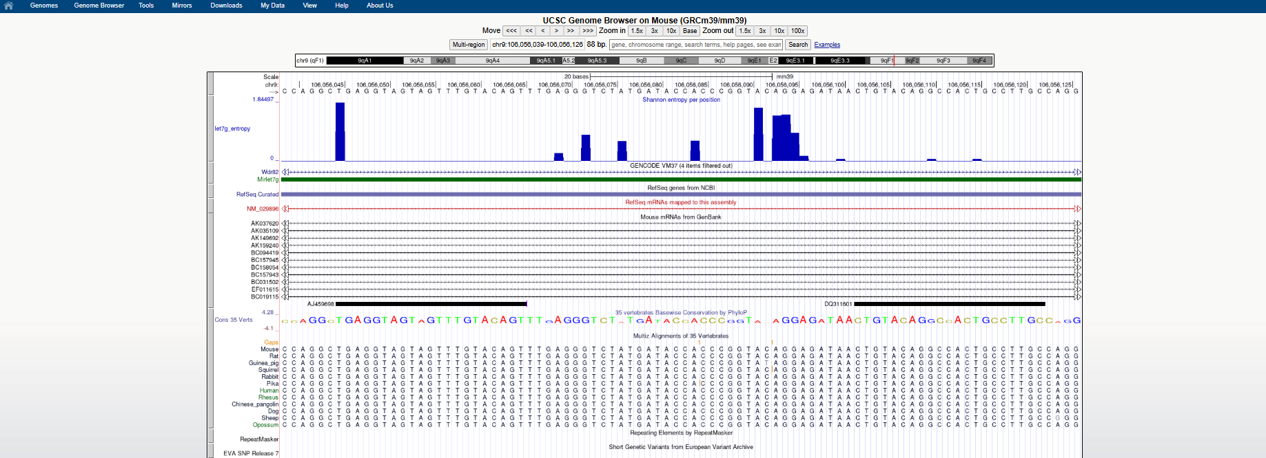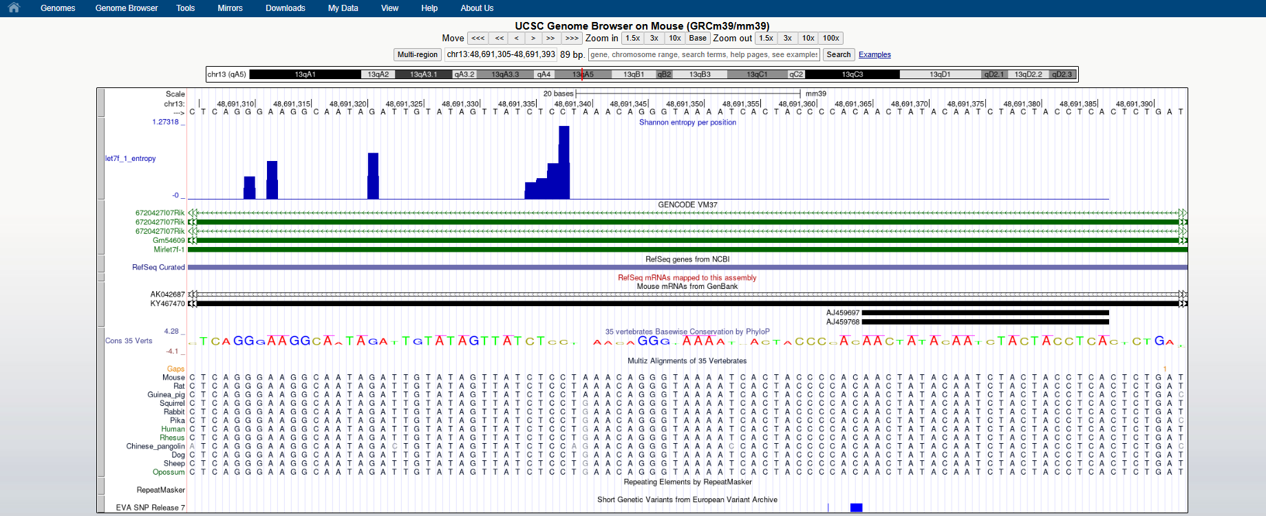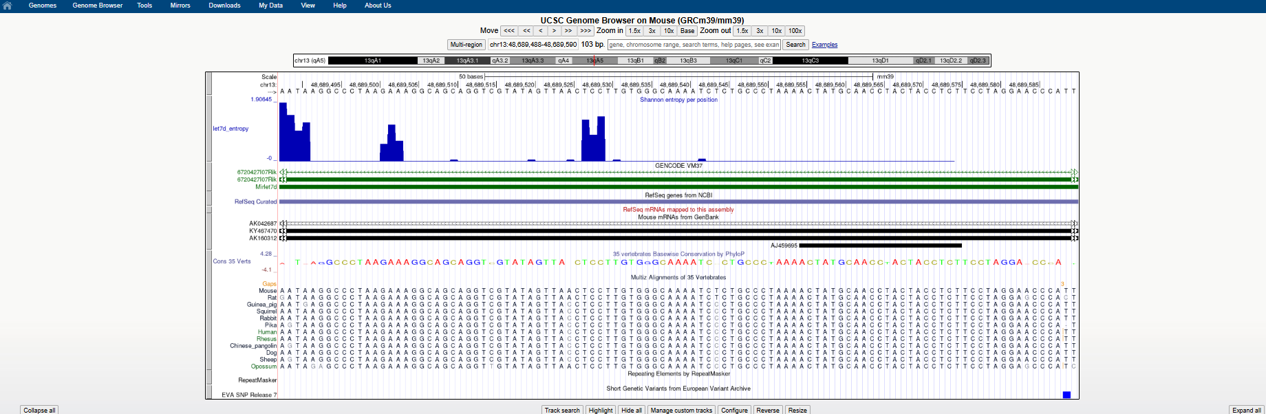

peak 추출

In [ ]:
# 1) 가장 높은 entropy 위치 하나 뽑기
peak_idx = pileup_mirlet7g['entropy'].idxmax()
peak_pos = pileup_mirlet7g.loc[peak_idx, 'pos']
print("let-7g peak position:", peak_pos)

# 2) 그 위치 matches 문자열도 함께 보여주기
print("matches at peak:")
print(pileup_mirlet7g.loc[peak_idx, 'matches'])

let-7g peak position: 106056045
matches at peak:
HTDTITGTHTHTITGTITHTHTITITHTHTGTHTGTHTHTHTITGT


In [ ]:
# 1) let-7g peak index와 matches 문자열
peak_idx = pileup_mirlet7g['entropy'].idxmax()
matches_seq = pileup_mirlet7g.loc[peak_idx, 'matches']
print("matches:", matches_seq)

# 2) 문자열 길이와 중앙 위치 계산
L = len(matches_seq)
center = L // 2  # 중앙 인덱스

# 3) 중앙 ±3 characters → 6-mer motif
motif6 = matches_seq[center-3 : center+3]
print("6-mer motif from matches:", motif6)

matches: HTDTITGTHTHTITGTITHTHTITITHTHTGTHTGTHTHTHTITGT
6-mer motif from matches: HTITIT


In [ ]:
# 0) pileup DataFrame들을 미리 준비해 두세요.
#    pileup_mirlet7g, pileup_mirlet7f1, pileup_mirlet7d

# 1) miRNA별 pileup 딕셔너리
pileups = {
    'let7g'  : pileup_mirlet7g,
    'let7f_1' : pileup_mirlet7f_1,
    'let7d'  : pileup_mirlet7d,
}

# 2) Shannon entropy 기준 peak + 중앙 6-mer motif 추출 루프
motifs = {}
for name, df in pileups.items():
    # (1) peak idx & position
    peak_idx  = df['entropy'].idxmax()
    peak_pos  = df.loc[peak_idx, 'pos']

    # (2) 그 위치의 matches 문자열
    matches_seq = df.loc[peak_idx, 'matches']

    # (3) 중앙 ±3nt → 6-mer motif
    L      = len(matches_seq)
    center = L // 2
    motif6 = matches_seq[center-3 : center+3]

    # (4) 결과 저장 & 출력
    motifs[name] = (peak_pos, motif6)
    print(f"{name} peak @ {peak_pos}: 6-mer = {motif6}")

# 5) 변수 motifs에는 {'let7g':(pos, motif), ...} 형태로 모두 저장됨
print("\nAll motifs extracted:", motifs)

let7g peak @ 106056045: 6-mer = HTITIT
let7f_1 peak @ 48691338: 6-mer = tgggtt
let7d peak @ 48689488: 6-mer = aIaIaI

All motifs extracted: {'let7g': (np.int64(106056045), 'HTITIT'), 'let7f_1': (np.int64(48691338), 'tgggtt'), 'let7d': (np.int64(48689488), 'aIaIaI')}


In [ ]:
from collections import Counter

# 예: let-7g에서 상위 20 peaks의 중앙 6-mer 집계
top_matches = pileup_mirlet7g.nlargest(20, 'entropy')['matches']
motifs = [ m[len(m)//2-3 : len(m)//2+3] for m in top_matches ]
cnt = Counter(motifs)
print("let-7g top motifs:", cnt.most_common(10))

let-7g top motifs: [('', 6), ('AAAAAA', 5), ('GGGGGG', 3), ('HTITIT', 1), ('AIAIAH', 1), ('AAGGGC', 1), ('AHAIAG', 1), ('CGGGGG', 1), ('TTTTTT', 1)]


In [ ]:
motifs = [m for m in motifs if len(m)==6]


In [ ]:
import re
pattern = re.compile(r'^AAG[AUCGuacg]NG$')  # U or T depending on RNA/DNA
ag_motifs = [m for m in motifs if pattern.match(m)]


In [ ]:
from collections import Counter

# 6-mer만 남기고 빈 문자열 제거
motifs = [m for m in motifs if len(m)==6]
cnt = Counter(motifs)

# AAGNNG 계열 필터링
ag_cnt = {m:c for m,c in cnt.items() if pattern.match(m)}
print("AAGNNG motifs:", Counter(ag_cnt).most_common())


AAGNNG motifs: []


In [ ]:
from collections import Counter
import re

# 1) let-7g 상위 N개 peak의 matches 추출
top_matches = pileup_mirlet7g.nlargest(20, 'entropy')['matches']

# 2) 각 matches 중앙 ±3nt로 6-mer motif 생성, 길이 6만 필터
raw_motifs = [m[len(m)//2-3 : len(m)//2+3] for m in top_matches]
motifs6   = [m for m in raw_motifs if len(m)==6]

# 3) AAGNNG 패밀리만 필터링 (N = A/C/G/T)
pattern   = re.compile(r'^AAG[A|C|G|T]NG$')
filtered  = [m for m in motifs6 if pattern.match(m)]

# 4) 집계 및 출력
cnt_all = Counter(motifs6)
cnt_ag  = Counter(filtered)
print("All 6-mers:", cnt_all.most_common(10))
print("AAGNNG motifs:", cnt_ag.most_common())


All 6-mers: [('AAAAAA', 5), ('GGGGGG', 3), ('HTITIT', 1), ('AIAIAH', 1), ('AAGGGC', 1), ('AHAIAG', 1), ('CGGGGG', 1), ('TTTTTT', 1)]
AAGNNG motifs: []


처음부터

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


아래는 이미 받았으면 할 필요 없다!!!! (2기가 넘음~)

In [ ]:
# 1) UCSC에서 mm39 FASTA를 받습니다 (약 2.5 GB)
!wget -q ftp://hgdownload.soe.ucsc.edu/goldenPath/mm39/bigZips/mm39.fa.gz

# 2) 압축 해제
!gunzip mm39.fa.gz

# 3) FASTA 인덱스 생성
!samtools faidx mm39.fa


여기부터

In [ ]:
%%bash
# STEP 1: gencode.gtf 에서 exon 행만 골라서 exons.bed 생성
awk '$3=="exon" {print $1 "\t" $4-1 "\t" $5}' \
    /content/drive/MyDrive/binfo1-datapack1/gencode.gtf \
  > exons.bed

# 제대로 만들어졌는지 확인
ls -lh exons.bed
head -n3 exons.bed


-rw------- 1 root root 20M Jun 12 00:30 exons.bed
chr1	3143475	3144545
chr1	3172238	3172348
chr1	3283831	3286567


In [ ]:
# mm39.fa가 /content 에 있는지, 용량이 제대로 나오는지 확인
ls -lh /content/mm39.fa /content/mm39.fa.fai


NameError: name 'ls' is not defined

In [ ]:
%%bash
# (필요시) samtools가 없는 경우 설치
if ! command -v samtools >/dev/null; then
  apt-get update -qq && apt-get install -y samtools
fi

# exon-only mpileup (약 30–60초 소요)
samtools mpileup \
  -f /content/drive/MyDrive/binfo1-work/mm39.fa \
  -Q 20 -q 20 \
  -l exons.bed \
  /content/drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam \
  > CLIP-exons.pileup

# 결과 파일 크기 및 첫 줄 확인
ls -lh CLIP-exons.pileup
head -n3 CLIP-exons.pileup


-rw------- 1 root root 3.2G Jun 12 00:43 CLIP-exons.pileup
chr1	3277438	C	3	^I.^I.^I.	FII
chr1	3277439	T	3	...	HII
chr1	3277440	T	3	...	III


[mpileup] 1 samples in 1 input files


In [ ]:
# exon-only pileup 존재 확인
!ls -lh /content/drive/MyDrive/binfo1-work/CLIP-exons.pileup
!head -n3 /content/drive/MyDrive/binfo1-work/CLIP-exons.pileup


-rw------- 1 root root 3.2G Jun 12 00:45 /content/drive/MyDrive/binfo1-work/CLIP-exons.pileup
chr1	3277438	C	3	^I.^I.^I.	FII
chr1	3277439	T	3	...	HII
chr1	3277440	T	3	...	III


In [ ]:
import re

# 입력/출력 경로
pileup = "/content/drive/MyDrive/binfo1-work/CLIP-exons.pileup"
outbed = "/content/drive/MyDrive/binfo1-work/crosslinks.bed"

# . , 제거용
drop = re.compile(r"[.,]")

n_sites = 0
with open(pileup) as fin, open(outbed, "w") as fout:
    for line in fin:
        chrom, pos, ref, depth, bases, *_ = line.rstrip().split("\t")
        d = int(depth)
        if d < 10:
            continue
        m = drop.sub("", bases)
        if len(m) / d >= 0.01:
            start = int(pos) - 1
            fout.write(f"{chrom}\t{start}\t{pos}\n")
            n_sites += 1

print(f"✅  Found {n_sites} CIMS sites. Saved to:\n   {outbed}")


✅  Found 17761971 CIMS sites. Saved to:
   /content/drive/MyDrive/binfo1-work/crosslinks.bed


In [ ]:
!ls -lh /content/drive/MyDrive/binfo1-work/crosslinks.bed
!head -n5 /content/drive/MyDrive/binfo1-work/crosslinks.bed


-rw------- 1 root root 406M Jun 12 03:17 /content/drive/MyDrive/binfo1-work/crosslinks.bed
chr1	4054466	4054467
chr1	4055723	4055724
chr1	4055741	4055742
chr1	4055742	4055743
chr1	4055744	4055745


6mer 추출 -> 빈도 계산 -> Enrichment table

In [ ]:
%%bash
apt-get update -qq
apt-get install -y bedtools


Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 563 kB of archives.
After this operation, 1,548 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 bedtools amd64 2.30.0+dfsg-2ubuntu0.1 [563 kB]
Fetched 563 kB in 1s (766 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../bedtools_2.30.0+dfsg-2ubuntu0.1_amd64.deb ...
Unpacking bedtools (2.30.0+dfsg-2ubuntu0.1) ...
Setting up bedtools (2.30.0+dfsg-2ubuntu0.1) ...


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
%%bash
# crosslinks.bed 위치
INBED=/content/drive/MyDrive/binfo1-work/crosslinks.bed
# mm39.fa.fai (로컬)에 이미 생성되어 있어야 합니다.
GENOME=/content/drive/MyDrive/binfo1-work/mm39.fa.fai

# 6mer window: 1bp → 2nt left, 3nt right → length=6
bedtools slop \
  -i $INBED \
  -g $GENOME \
  -l 2 -r 3 \
  > /content/drive/MyDrive/binfo1-work/crosslinks_6mer.bed

# 확인 (한 줄만)
head -n3 /content/drive/MyDrive/binfo1-work/crosslinks_6mer.bed


chr1	4054464	4054470
chr1	4055721	4055727
chr1	4055739	4055745


In [ ]:
!pip install pysam


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 31.9 MB/s eta 0:00:00


In [ ]:
import pysam
print(pysam.__version__)


0.23.3


crosslink 에서 6mer 추출하기

In [ ]:
from pysam import FastaFile
from collections import Counter

# 1) 로컬 FASTA 열기
fa = FastaFile("/content/drive/MyDrive/binfo1-work/mm39.fa")

# 2) 크로스링크 위치 파일
in_bed = "/content/drive/MyDrive/binfo1-work/crosslinks.bed"

# 3) hexamer 카운터
ctr = Counter()
with open(in_bed) as f:
    for line in f:
        chrom, start, end = line.split()
        pos = int(start) + 2  # crosslink 위치에서 +2 이동
        seq = fa.fetch(chrom, pos-2, pos+4)  # 6nt
        ctr[seq] += 1

fa.close()

# 4) 결과 확인
print("Unique hexamers:", len(ctr))
print("Top 5:", ctr.most_common(5))


Unique hexamers: 43175
Top 5: [('AAAAAA', 17502), ('TTTTTT', 17232), ('AGAAAA', 13299), ('AAGAAA', 13270), ('TTTTCT', 13024)]


background 에서 6mer.bed 만들기

In [ ]:
%%bash
# 경로 설정
EXONS=/content/drive/MyDrive/binfo1-work/exons.bed
CROSS=/content/drive/MyDrive/binfo1-work/crosslinks.bed
OUT=/content/drive/MyDrive/binfo1-work/control_6mer.bed
# crosslinks 개수만큼 exons에서 랜덤 추출 후 ±2/±3 슬롭
N=$(wc -l < $CROSS)
shuf $EXONS | head -n $N \
  | bedtools slop -g /content/drive/MyDrive/binfo1-work/mm39.fa.fai -l 2 -r 3 \
  > $OUT
# 확인
ls -lh $OUT
head -n3 $OUT


-rw------- 1 root root 20M Jun 12 04:06 /content/drive/MyDrive/binfo1-work/control_6mer.bed
chr16	38457256	38457406
chr5	122296416	122296681
chr17	27936140	27936292


6mer bed 로부터 control 6mer 만들기

In [ ]:
%%bash
EXONS=/content/drive/MyDrive/binfo1-work/exons.bed
CROSS=/content/drive/MyDrive/binfo1-work/crosslinks.bed
OUT=/content/drive/MyDrive/binfo1-work/control_6mer.bed
GENOME=/content/drive/MyDrive/binfo1-work/mm39.fa.fai

# 1) crosslink 개수
N=$(wc -l < "$CROSS")

# 2) exons.bed에서 중복 허용 샘플링 (replacement) 후 ±2/+3 슬롭
shuf -n $N -r "$EXONS" \
  | bedtools slop -g $GENOME -l 2 -r 3 \
  > "$OUT"

# 3) 확인
echo "control windows:" $(wc -l < "$OUT")
head -n3 "$OUT"


control windows: 17761971
chr9	44112254	44112507
chr2	121004036	121004170
chrX	7588598	7588620


what's ur eta?

In [ ]:
!pip install -q tqdm


control 과 crosslink 비교해서 enrichment 계산

In [ ]:
import time
from pysam import FastaFile
from collections import Counter
import pandas as pd
from tqdm import tqdm

# ─── 0) 타이머 시작 ───────────────────────────────────────────────
start_time = time.perf_counter()

# ─── 1) FASTA 열기 ────────────────────────────────────────────────
fa = FastaFile("/content/drive/MyDrive/binfo1-work/mm39.fa")

# ─── 2) CLIP 6mer 카운트 (이미 실행済) ─────────────────────────────
clip_bed = "/content/drive/MyDrive/binfo1-work/crosslinks.bed"
clip_ctr = Counter()
with open(clip_bed) as f:
    for line in tqdm(f, desc="Counting CLIP 6mers", unit="lines"):
        chrom, start, end = line.split()[:3]
        pos = int(start) + 2
        seq = fa.fetch(chrom, pos-2, pos+4)
        if "N" in seq:
            continue         # N 포함 시 건너뛰기
        clip_ctr[seq] += 1

# ─── 3) 배경 6mer 카운트 ──────────────────────────────────────────
bg_bed = "/content/drive/MyDrive/binfo1-work/control_6mer.bed"
bg_ctr = Counter()
with open(bg_bed) as f:
    for line in tqdm(f, desc="Counting BG 6mers", unit="lines"):
        chrom, start, end = line.split()[:3]
        pos = int(start) + 2
        seq = fa.fetch(chrom, pos-2, pos+4)
        if "N" in seq:
            continue
        bg_ctr[seq] += 1

fa.close()

# ─── 4) Enrichment 계산 ────────────────────────────────────────────
total_clip = sum(clip_ctr.values())
total_bg   = sum(bg_ctr.values())

rows = []
for hexamer, c in tqdm(clip_ctr.items(), desc="Calculating enrich", unit="hexamer"):
    b = bg_ctr.get(hexamer, 0) + 1         # zero-count 방지를 위한 pseudocount=1
    enrich = (c/total_clip) / (b/total_bg)
    rows.append((hexamer, enrich, c, b))

df = pd.DataFrame(rows, columns=["hexamer","enrichment","clip_count","bg_count"])
df = df.sort_values("enrichment", ascending=False).reset_index(drop=True)
df.index += 1                             # 1-based rank

# ─── 5) 결과 출력 & 저장 ──────────────────────────────────────────
print(df.head(10))
out = "/content/drive/MyDrive/binfo1-work/hexamer_enrichment.tsv"
df.to_csv(out, sep="\t", index=True, index_label="rank")
print(f"▶ Saved to {out}")

# ─── 6) 총걸린 시간 ───────────────────────────────────────────────
elapsed = time.perf_counter() - start_time
print(f"✔ Elapsed time: {elapsed/60:.2f} min")


Counting CLIP 6mers: 17761971lines [01:17, 228191.56lines/s]
Counting BG 6mers: 17761971lines [05:30, 53760.14lines/s]
Calculating enrich: 100%|██████████| 43175/43175 [00:00<00:00, 296656.27hexamer/s]


   hexamer   enrichment  clip_count  bg_count
1   cctgga  1811.997756        1812         1
2   aaaccc  1403.998261        1404         1
3   ctttgt  1167.998553        1168         1
4   aaactc  1077.998665        1078         1
5   tgtaat  1056.998691        1057         1
6   caaact  1023.998732        1024         1
7   ggtcta   970.998797         971         1
8   tttgct   933.998843         934         1
9   ggcctg   931.998846         932         1
10  ggaatt   925.998853         926         1
▶ Saved to /content/drive/MyDrive/binfo1-work/hexamer_enrichment.tsv
✔ Elapsed time: 6.82 min


enrichment table

In [ ]:
import time
from pysam import FastaFile
from collections import Counter
import pandas as pd
from tqdm.auto import tqdm

# —————————— 0) 설정 ——————————
FASTA_PATH   = "/content/drive/MyDrive/binfo1-work/mm39.fa"
CLIP_BED     = "/content/drive/MyDrive/binfo1-work/crosslinks.bed"
CTRL_BED     = "/content/drive/MyDrive/binfo1-work/control_6mer.bed"
OUT_TABLE    = "/content/drive/MyDrive/binfo1-work/hexamer_enrichment.tsv"

# —————————— 1) 타이머 시작 ——————————
t0 = time.perf_counter()

# —————————— 2) FASTA 열기 ——————————
fa = FastaFile(FASTA_PATH)

# —————————— 3) CLIP 6mer 세기 ——————————
clip_ctr = Counter()
with open(CLIP_BED, 'r') as f:
    for line in tqdm(f, desc="Counting CLIP 6mers", unit=" lines"):
        chrom, start, end = line.split()[:3]
        pos   = int(start) + 2        # 중앙 기준 +2
        seq   = fa.fetch(chrom, pos-2, pos+4)  # 6nt window
        if 'N' in seq:
            continue
        clip_ctr[seq] += 1

# —————————— 4) Control 6mer 세기 ——————————
bg_ctr = Counter()
with open(CTRL_BED, 'r') as f:
    for line in tqdm(f, desc="Counting BG 6mers", unit=" lines"):
        chrom, start, end = line.split()[:3]
        pos   = int(start) + 2
        seq   = fa.fetch(chrom, pos-2, pos+4)
        if 'N' in seq:
            continue
        bg_ctr[seq] += 1

fa.close()

# —————————— 5) Enrichment 계산 ——————————
total_clip = sum(clip_ctr.values())
total_bg   = sum(bg_ctr.values())

rows = []
for hexamer, c in tqdm(clip_ctr.items(),
                       desc="Calculating enrichment",
                       unit=" hexamer"):
    b = bg_ctr.get(hexamer, 0) + 1    # zero-count 방지
    enrich = (c/total_clip) / (b/total_bg)
    rows.append((hexamer, enrich, c, b))

df = pd.DataFrame(rows,
                  columns=["hexamer","enrichment","clip_count","bg_count"])
df = df.sort_values("enrichment", ascending=False).reset_index(drop=True)
df.index += 1  # 1-based rank

# —————————— 6) 결과 저장 & 출력 ——————————
print("\nTop 10 enriched hexamers:\n", df.head(10), "\n")
df.to_csv(OUT_TABLE, sep="\t", index=True, index_label="rank")
print(f"✔ Saved enrichment table to {OUT_TABLE}")

# —————————— 7) 총 걸린 시간 ——————————
elapsed = time.perf_counter() - t0
print(f"⏱ Total elapsed time: {elapsed/60:.2f} min")


Counting CLIP 6mers: 0 lines [00:00, ? lines/s]

Counting BG 6mers: 0 lines [00:00, ? lines/s]

Calculating enrichment:   0%|          | 0/43175 [00:00<?, ? hexamer/s]


Top 10 enriched hexamers:
    hexamer   enrichment  clip_count  bg_count
1   cctgga  1811.997756        1812         1
2   aaaccc  1403.998261        1404         1
3   ctttgt  1167.998553        1168         1
4   aaactc  1077.998665        1078         1
5   tgtaat  1056.998691        1057         1
6   caaact  1023.998732        1024         1
7   ggtcta   970.998797         971         1
8   tttgct   933.998843         934         1
9   ggcctg   931.998846         932         1
10  ggaatt   925.998853         926         1 

✔ Saved enrichment table to /content/drive/MyDrive/binfo1-work/hexamer_enrichment.tsv
⏱ Total elapsed time: 6.39 min


clustering

In [ ]:
!pip install python-igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 28.3 MB/s eta 0:00:00


In [ ]:
import time, json
import igraph as ig
from pysam import FastaFile

# ─── 0) 파일 경로 설정 ─────────────────────────────────────────
FASTA = "/content/drive/MyDrive/binfo1-work/mm39.fa"
CLIP_BED = "/content/drive/MyDrive/binfo1-work/crosslinks.bed"
CTRL_BED = "/content/drive/MyDrive/binfo1-work/control_6mer.bed"
OUT_JSON = "/content/drive/MyDrive/binfo1-work/cluster_reps.json"

# ─── 1) Enrichment 테이블 읽어들여 dict화 ────────────────────────
# (이전 단계에서 만든 hexamer_enrichment.tsv)
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/binfo1-work/hexamer_enrichment.tsv", sep="\t", index_col="hexamer")
enrich_map = df["enrichment"].to_dict()

# ─── 2) 이웃 기반 엣지 빌드 (O(N·k·σ)) ──────────────────────────
hexamers = list(enrich_map)
t0 = time.perf_counter()

G = ig.Graph()
G.add_vertices(hexamers)
edges = []
for h in hexamers:
    for i in range(6):
        orig = h[i]
        for nt in ("A","C","G","U"):
            if nt == orig: continue
            nei = h[:i] + nt + h[i+1:]
            if nei in enrich_map:
                edges.append((h, nei))
G.add_edges(edges)

print(f"✔ Graph built: {G.vcount()} nodes, {G.ecount()} edges in {time.perf_counter()-t0:.2f}s")

# ─── 3) Louvain 커뮤니티 탐색 ────────────────────────────────────
c0 = time.perf_counter()
communities = G.community_multilevel()
print(f"✔ Found {len(communities)} communities in {time.perf_counter()-c0:.2f}s")

# ─── 4) 클러스터별 대표 헥사머 추출 & JSON 저장 ────────────────
cluster_reps = {}
for idx, comm in enumerate(communities, start=1):
    # enrichment 값이 최대인 노드를 대표로
    best = max(comm, key=lambda v: enrich_map[G.vs[v]["name"]])
    cluster_reps[f"cluster{idx}"] = G.vs[best]["name"]

with open(OUT_JSON, "w") as fo:
    json.dump(cluster_reps, fo, indent=2)
print("✔ Saved clusters to", OUT_JSON)
print(f"🕑 Total elapsed: {(time.perf_counter()-t0)/60:.2f} min")

✔ Graph built: 43175 nodes, 367587 edges in 4.93s
✔ Found 242 communities in 5.23s
✔ Saved clusters to /content/drive/MyDrive/binfo1-work/cluster_reps.json
🕑 Total elapsed: 0.17 min


In [ ]:
import json

with open("/content/drive/MyDrive/binfo1-work/cluster_reps.json") as f:
    reps = json.load(f)
print(reps)

{'cluster1': 'cctgga', 'cluster2': 'aaaccc', 'cluster3': 'ctttgt', 'cluster4': 'aaactc', 'cluster5': 'tgtaat', 'cluster6': 'caaact', 'cluster7': 'ggtcta', 'cluster8': 'tttgct', 'cluster9': 'ggcctg', 'cluster10': 'ggaatt', 'cluster11': 'GATCGG', 'cluster12': 'tttaag', 'cluster13': 'attcct', 'cluster14': 'aacact', 'cluster15': 'CGAGTA', 'cluster16': 'cccaaa', 'cluster17': 'tggcac', 'cluster18': 'GGTTCG', 'cluster19': 'gatgat', 'cluster20': 'gacctc', 'cluster21': 'cttggc', 'cluster22': 'tacact', 'cluster23': 'gcttca', 'cluster24': 'gctaga', 'cluster25': 'ggccat', 'cluster26': 'tacaag', 'cluster27': 'catagg', 'cluster28': 'taagca', 'cluster29': 'gtcact', 'cluster30': 'cttaat', 'cluster31': 'gcacct', 'cluster32': 'cgtgcg', 'cluster33': 'atccgc', 'cluster34': 'cacggc', 'cluster35': 'ccgtaa', 'cluster36': 'tcgcca', 'cluster37': 'actcga', 'cluster38': 'tgccga', 'cluster39': 'tgacgc', 'cluster40': 'atccga', 'cluster41': 'aatcga', 'cluster42': 'aacgta', 'cluster43': 'caacgt', 'cluster44': 'agtcc

In [ ]:
import time, json
import pandas as pd
import igraph as ig

# ─────────── 0) 파일 경로 설정 ───────────
ENRICH_TSV = "/content/drive/MyDrive/binfo1-work/hexamer_enrichment.tsv"
CLUSTERS_JSON = "/content/drive/MyDrive/binfo1-work/cluster_reps.json"

# ─────────── 1) enrichment 테이블 읽기 ───────────
df_enrich = pd.read_csv(ENRICH_TSV, sep="\t", index_col="hexamer")
enrich_map = df_enrich["enrichment"].to_dict()

# ─────────── 2) 대표 헥사머(클러스터) 읽기 ───────────
with open(CLUSTERS_JSON) as f:
    cluster_reps = json.load(f)
# ex: {"cluster1": "AAGGAG", "cluster2":"AAGGUG", ...}

# ─────────── 3) 전체 네트워크에서 클러스터 membership 계산 ───────────
#   (이미 G가 메모리에 없다면 위에서 만든 G를 재생성하셔야 합니다)
#   여기서는 간단히 G를 다시 만드는 예시를 보여 드립니다.
G = ig.Graph()
G.add_vertices(list(enrich_map))
edges = []
for h in enrich_map:
    for i in range(6):
        orig = h[i]
        for nt in "ACGU":
            if nt == orig: continue
            nei = h[:i] + nt + h[i+1:]
            if nei in enrich_map:
                edges.append((h, nei))
G.add_edges(edges)

communities = G.community_multilevel()
membership  = communities.membership

# ─────────── 4) 노드별 cluster id DataFrame 생성 ───────────
df_nodes = pd.DataFrame({
    "hexamer": G.vs["name"],
    "cluster": membership
})

# ─────────── 5) 클러스터별 크기 집계 ───────────
cluster_sizes = df_nodes["cluster"].value_counts().sort_index()

# ─────────── 6) 클러스터 summary 테이블 생성 ───────────
rows = []
for key, rep in cluster_reps.items():
    # key 예: "cluster1" → 숫자만 뽑기
    cid = int(key.replace("cluster", ""))
    size = int(cluster_sizes.get(cid-1, 0))
    enrich = enrich_map.get(rep, 0.0)
    rows.append((cid, rep, enrich, size))

df_clusters = pd.DataFrame(
    rows, columns=["cluster_id","rep_hexamer","rep_enrichment","cluster_size"]
)

# ─────────── 7) 예쁘게 정렬 & 출력 ───────────
df_clusters = df_clusters.sort_values(
    by="rep_enrichment", ascending=False
).reset_index(drop=True)

print("▶ 상위 10개 클러스터 요약")
print(df_clusters.head(10).to_string(index=False))

# 원하는 개수만큼 자르기
TOP_N = 5
top_clusters = df_clusters.head(TOP_N)
print(f"\n▶ Top {TOP_N} cluster IDs:", list(top_clusters["cluster_id"]))

# 필요하면 파일로 저장
OUT_SUMMARY = "/content/drive/MyDrive/binfo1-work/cluster_summary.tsv"
df_clusters.to_csv(OUT_SUMMARY, sep="\t", index=False)
print(f"\n✅ Saved full summary to {OUT_SUMMARY}")


▶ 상위 10개 클러스터 요약
 cluster_id rep_hexamer  rep_enrichment  cluster_size
          1      cctgga     1811.997756          2941
          2      aaaccc     1403.998261           983
          3      ctttgt     1167.998553          1077
          4      aaactc     1077.998665           276
          5      tgtaat     1056.998691          3600
          6      caaact     1023.998732           232
          7      ggtcta      970.998797           948
          8      tttgct      933.998843          1053
          9      ggcctg      931.998846          3004
         10      ggaatt      925.998853           204

▶ Top 5 cluster IDs: [1, 2, 3, 4, 5]

✅ Saved full summary to /content/drive/MyDrive/binfo1-work/cluster_summary.tsv


In [ ]:
import time
from collections import Counter
import pandas as pd
from tqdm.auto import tqdm

# ─── 설정 ─────────────────────────────────────────────────────────
SUMMARY = "/content/drive/MyDrive/binfo1-work/cluster_summary.tsv"

# ─── 1) 파일 로드 ───────────────────────────────────────────────────
t0 = time.perf_counter()
df = pd.read_csv(SUMMARY, sep="\t")   # columns: cluster_id, rep_hexamer, rep_enrichment, cluster_size, hexamer
print(f"✔ Loaded summary: {len(df)} rows  (elapsed: {(time.perf_counter()-t0)/60:.2f} min)")


✔ Loaded summary: 242 rows  (elapsed: 0.00 min)


In [ ]:
import json, time
import pandas as pd
import igraph as ig

# 0) 미리 만든 파일 경로
ENRICH_TSV   = "/content/drive/MyDrive/binfo1-work/hexamer_enrichment.tsv"
CLUSTERS_JSON = "/content/drive/MyDrive/binfo1-work/cluster_reps.json"
OUT_MEMBERSHIP = "/content/drive/MyDrive/binfo1-work/cluster_membership.tsv"

# 1) enrichment 테이블 읽기 (node list)
df = pd.read_csv(ENRICH_TSV, sep="\t", index_col="hexamer")
hexamers = df.index.tolist()

# 2) 대표 헥사머(클러스터→rep) 정보 읽기
with open(CLUSTERS_JSON) as f:
    reps = json.load(f)            # e.g. {"cluster1":"CCTGGA",...}

# 3) 네트워크(egenrichment graph) 재생성 – 이미 G 만드신 코드 복붙
G = ig.Graph()
G.add_vertices(hexamers)
edges = []
for h in hexamers:
    for i in range(6):
        orig = h[i]
        for nt in "ACGT":
            if nt == orig:
                continue
            nei = h[:i] + nt + h[i+1:]
            if nei in df.index:    # 존재하는 헥사머만
                edges.append((h, nei))
G.add_edges(edges)

# 4) Louvain(community_multilevel) 탐색
t0 = time.perf_counter()
communities = G.community_multilevel()
t1 = time.perf_counter()
print(f"✔ Found {len(communities)} communities in {t1-t0:.2f}s")

# 5) 노드별 멤버십 DataFrame 생성 & 저장
membership = communities.membership
df_nodes = pd.DataFrame({
    "hexamer"   : G.vs["name"],
    "cluster_id": [f"cluster{c+1}" for c in membership]
})
df_nodes.to_csv(OUT_MEMBERSHIP, sep="\t", index=False)
print(f"✔ Saved membership to {OUT_MEMBERSHIP}")

✔ Found 147 communities in 2.78s
✔ Saved membership to /content/drive/MyDrive/binfo1-work/cluster_membership.tsv


In [ ]:
import time, re
import pandas as pd
from itertools import combinations
from tqdm.auto import tqdm

# ───── 설정 ─────────────────────────────
ENRICH_TSV   = "/content/drive/MyDrive/binfo1-work/hexamer_enrichment.tsv"
OUT_DEG      = "/content/drive/MyDrive/binfo1-work/degenerate_rep.tsv"
TOP_N        = 3  # rep_enrichment 기준 상위 N개

# ───── 1) Enrichment 맵 로드 ──────────────────────
t0 = time.perf_counter()
df = pd.read_csv(ENRICH_TSV, sep="\t", index_col="hexamer")
enrich_map = df["enrichment"].to_dict()
print(f"✔ Loaded enrichment for {len(enrich_map)} hexamers in {time.perf_counter()-t0:.2f}s")

# ───── 2) rep_hexamer 리스트 (상위 TOP_N) ──────────
t1 = time.perf_counter()
top_reps = df.sort_values("enrichment", ascending=False).head(TOP_N)
print(f"✔ Top {TOP_N} reps selected in {time.perf_counter()-t1:.2f}s:\n", top_reps["enrichment"].round(2))

# ───── 3) 2개 N 패턴 중 best 선택 ─────────────────
def best_deg_for(seq, enrich_map):
    """seq (예: 'AAGGAG') 에서 2개 위치를 N으로 대체하는 15개 패턴을 모두,
    enrich_map에 매칭되는 hexamer enrichment 합계를 계산해 최댓값 패턴 리턴"""
    best = (None, -1.0)
    for i,j in combinations(range(6), 2):
        # 패턴 생성: N을 정규식 '.' 로 매핑
        pat = list(seq)
        pat[i] = "."
        pat[j] = "."
        regex = re.compile("^" + "".join(pat) + "$")
        # 매칭되는 실제 hexamer들의 enrichment 총합
        s = sum(v for k,v in enrich_map.items() if regex.match(k))
        if s > best[1]:
            best = ("".join("N" if idx in (i,j) else seq[idx] for idx in range(6)), s)
    return best  # (deg_motif, sum_enrichment)

t2 = time.perf_counter()
results = []
for rep, row in tqdm(top_reps.iterrows(), desc="Finding best degenerate"):
    motif, total = best_deg_for(rep, enrich_map)
    results.append({
        "rep_hexamer": rep,
        "rep_enrichment": row["enrichment"],
        "deg_motif": motif,
        "deg_sum_enrich": total
    })
print(f"✔ Degenerate motifs computed in {time.perf_counter()-t2:.2f}s")

# ───── 4) 결과 저장 & 출력 ───────────────────────
df_out = pd.DataFrame(results)
df_out.to_csv(OUT_DEG, sep="\t", index=False)
print(f"✅ Saved to {OUT_DEG}\n")
print("▶ Top degenerate rep motifs:\n", df_out.to_string(index=False))


✔ Loaded enrichment for 43175 hexamers in 0.07s
✔ Top 3 reps selected in 0.01s:
 hexamer
cctgga    1812.0
aaaccc    1404.0
ctttgt    1168.0
Name: enrichment, dtype: float64


Finding best degenerate: 0it [00:00, ?it/s]

✔ Degenerate motifs computed in 0.53s
✅ Saved to /content/drive/MyDrive/binfo1-work/degenerate_rep.tsv

▶ Top degenerate rep motifs:
 rep_hexamer  rep_enrichment deg_motif  deg_sum_enrich
     cctgga     1811.997756    cNtggN     2905.506200
     aaaccc     1403.998261    aaacNN     4614.746366
     ctttgt     1167.998553    NtttgN     2966.339517


ㅁㅁㅁㅁ

✔ Loaded top 50 hexamers in 0.09s


Building edges:   0%|          | 0/50 [00:00<?, ?hex/s]

✔ Graph built: 50 nodes, 26 edges in 0.02s


<ipython-input-18-1738215934>:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("Blues")
<ipython-input-18-1738215934>:92: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-1738215934>:92: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-1738215934>:92: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-1738215934>:92: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaV

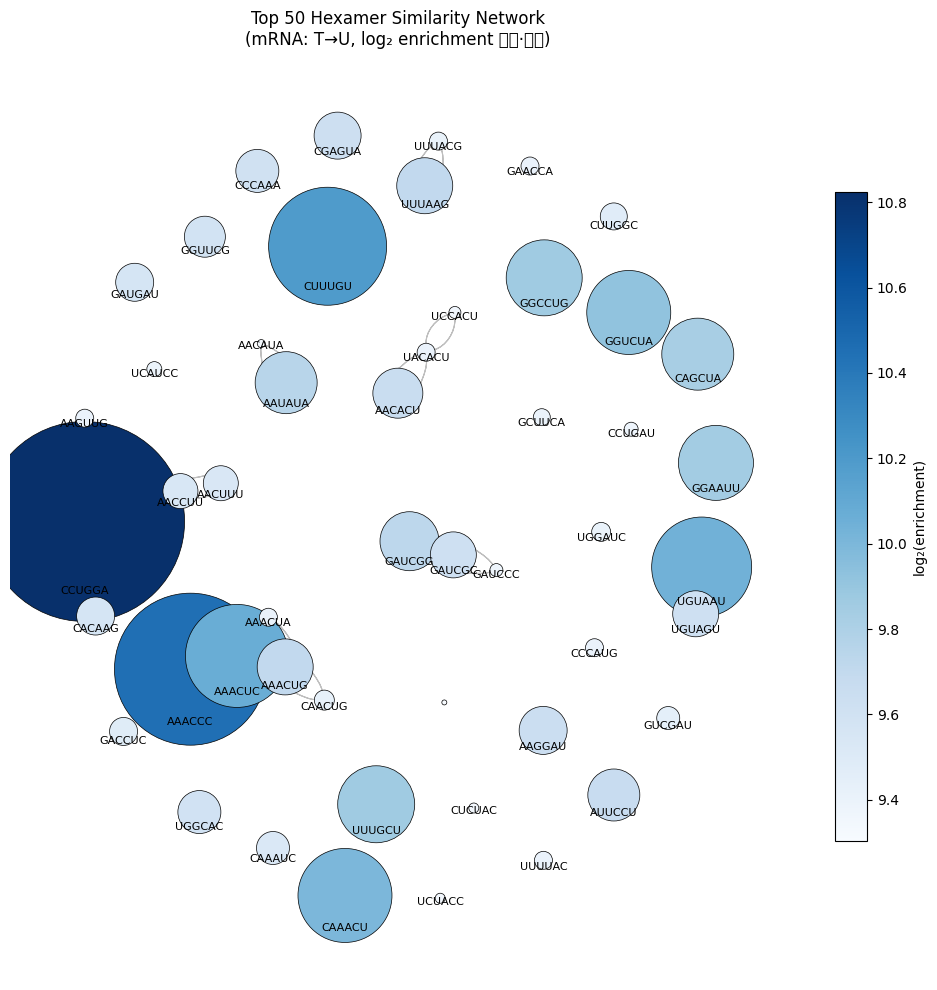


✔ Total elapsed time: 0.02 min


In [ ]:
import time
import math
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import igraph as ig
import matplotlib.pyplot as plt
import matplotlib as mpl

# ───────── 0) 설정 ─────────
ENRICH_TSV = "/content/drive/MyDrive/binfo1-work/hexamer_enrichment.tsv"
TOP_N      = 50   # 상위 몇 개 노드를 그릴지
FIGSIZE    = (10,10)

# ───────── 1) 타이머 시작 ─────────
t0 = time.perf_counter()

# ───────── 2) enrichment 읽기 & T→U, 대문자 ─────────
df = pd.read_csv(ENRICH_TSV, sep="\t")
df["hexamer"] = (
    df["hexamer"]
      .str.upper()
      .str.replace("T","U", regex=False)
)
df = df.set_index("hexamer")

# ───────── 3) 상위 TOP_N 선택 ─────────
df_top = df.sort_values("enrichment", ascending=False).head(TOP_N)
enrich = df_top["enrichment"].to_dict()
nodes   = list(enrich.keys())
print(f"✔ Loaded top {TOP_N} hexamers in {time.perf_counter()-t0:.2f}s")

# ───────── 4) 그래프 생성 & 엣지 만드는 중 ─────────
t1 = time.perf_counter()
G = ig.Graph()
G.add_vertices(nodes)

edges = []
for h in tqdm(nodes, desc="Building edges", unit="hex"):
    for i in range(6):
        orig = h[i]
        for nt in ("A","C","G","U"):
            if nt==orig: continue
            nei = h[:i] + nt + h[i+1:]
            if nei in enrich:
                edges.append((h,nei))
G.add_edges(edges)

print(f"✔ Graph built: {G.vcount()} nodes, {G.ecount()} edges in {time.perf_counter()-t1:.2f}s")

# ───────── 5) 레이아웃 계산 ─────────
layout = G.layout_fruchterman_reingold()

# ───────── 6) 노드 크기 & 색상 계산 ─────────
log2_enr = np.log2(list(enrich.values()))
#  ▶ 노드 크기: [min_size..max_size] 선형 스케일
min_s, max_s = 5, 200
vmin, vmax   = log2_enr.min(), log2_enr.max()
sizes = [ min_s + ( (math.log2(enrich[h])-vmin)/(vmax-vmin) )*(max_s-min_s)
          for h in G.vs["name"] ]

#  ▶ 색상: ‘Blues’ cmap, log2 → [0..1]
cmap = mpl.cm.get_cmap("Blues")
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
colors = [ cmap(norm(math.log2(enrich[h]))) for h in G.vs["name"] ]

# ───────── 7) 그리기 ─────────
fig, ax = plt.subplots(figsize=FIGSIZE)
ig.plot(
    G,
    target=ax,
    layout=layout,
    vertex_size=sizes,
    vertex_color=colors,
    vertex_frame_width=0.5,
    vertex_frame_color="black",
    vertex_label=[h if s>=min_s*1.2 else "" for h,s in zip(G.vs["name"], sizes)],
    vertex_label_dist=0.5,
    vertex_label_size=8,
    edge_width=0.8,
    edge_color="gray",
)

# ▶ 컬러바
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label("log₂(enrichment)")

ax.set_title(f"Top {TOP_N} Hexamer Similarity Network\n(mRNA: T→U, log₂ enrichment 크기·색상)")
ax.axis("off")
plt.tight_layout()
plt.show()

print(f"\n✔ Total elapsed time: {(time.perf_counter()-t0)/60:.2f} min")


다시

In [ ]:
pip install scipy

✔ Loaded 43175 hexamers (0.12s)


Building edges:   0%|          | 0/43175 [00:00<?, ?it/s]

✔ Full graph: 43175 nodes, 494561 edges (339.67s)
✔ Found 145 communities (342.41s)
✔ Extracted subgraph with 11638 nodes, 159063 edges


KeyboardInterrupt: 

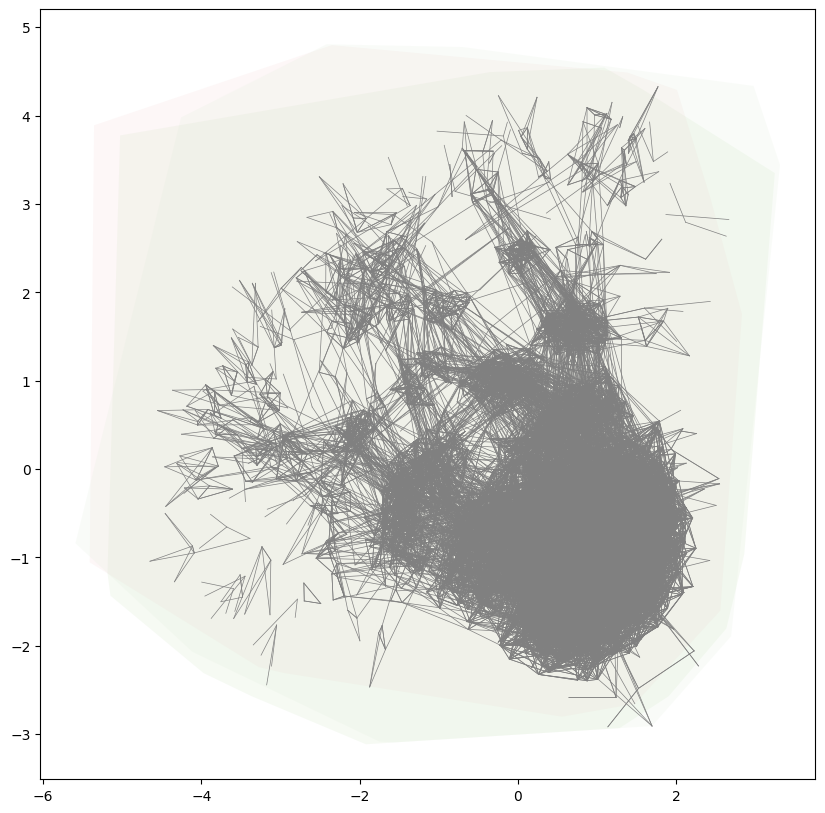

In [ ]:
import time, math
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import igraph as ig
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon

# ──────────── 설정 ────────────
ENRICH_TSV   = "/content/drive/MyDrive/binfo1-work/hexamer_enrichment.tsv"
TOP_COMM     = 3          # 뽑을 모듈(community) 개수
FIGSIZE      = (10,10)    # inch
NODE_SCALE   = 300        # 원 크기 기본 스케일
HULL_ALPHA   = 0.15       # convex hull 투명도
HULL_COLORS  = ["#c5e0b4", "#f4cccc", "#d9ead3"]  # 논문 색상 느낌
# ─────────────────────────────

t_start = time.perf_counter()

# 1) enrichment 읽고 log₂ 계산
df = pd.read_csv(ENRICH_TSV, sep="\t", index_col="hexamer")
df["log2enr"] = np.log2(df["enrichment"])
enrich_map = df["log2enr"].to_dict()
hexamers = list(enrich_map.keys())

print(f"✔ Loaded {len(hexamers)} hexamers ({time.perf_counter()-t_start:.2f}s)")

# 2) 전체 네트워크 구축 (Hamming distance = 1)
G = ig.Graph()
# 노드 레이블: T→U, 대문자
labels = [h.upper().replace("T","U") for h in hexamers]
G.add_vertices(labels)

# 빠른 이웃 생성: for each seq, mutate 한 글자씩 해서 map에 있으면 엣지 추가
edges = []
bases = ["A","C","G","T"]
for idx, h in enumerate(tqdm(hexamers, desc="Building edges")):
    for i in range(6):
        orig = h[i]
        for b in bases:
            if b==orig: continue
            nei = h[:i] + b + h[i+1:]
            if nei in enrich_map:
                edges.append((idx, hexamers.index(nei)))
G.add_edges(edges)
print(f"✔ Full graph: {G.vcount()} nodes, {G.ecount()} edges ({time.perf_counter()-t_start:.2f}s)")

# 3) Louvain community 탐색
comms = G.community_multilevel(weights=None)
print(f"✔ Found {len(comms)} communities ({time.perf_counter()-t_start:.2f}s)")

# 4) 상위 TOP_COMM개 추출 (노드 수 기준)
largest = sorted(comms, key=lambda c: len(c), reverse=True)[:TOP_COMM]
keep = set().union(*largest)
H = G.subgraph(keep)
print(f"✔ Extracted subgraph with {H.vcount()} nodes, {H.ecount()} edges")

# 5) 레이아웃 계산
layout = H.layout_fruchterman_reingold()

# 6) 노드 크기 & 색상
vals = np.array([ enrich_map[hexamers[i]] for i in keep ])  # log2
vmin, vmax = vals.min(), vals.max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.Blues

sizes  = [ NODE_SCALE * ( (enrich_map[hexamers[v]] - vmin)/(vmax-vmin) + 0.1 ) for v in H.vs.indices ]
colors = [ cmap(norm(enrich_map[hexamers[v]])) for v in H.vs.indices ]

# 7) 그리기
fig, ax = plt.subplots(figsize=FIGSIZE)
# 7a) convex hull 배경
coords = np.array(layout.coords)
for ci, comm in enumerate(largest[:TOP_COMM]):
    pts = coords[[H.vs.indices.index(v) for v in comm if v in H.vs.indices]]
    if len(pts)>=3:
        hull = ConvexHull(pts)
        poly = Polygon(pts[hull.vertices],
                       facecolor=HULL_COLORS[ci%len(HULL_COLORS)],
                       alpha=HULL_ALPHA,
                       edgecolor="none")
        ax.add_patch(poly)

# 7b) edges
for e in H.es:
    x0,y0 = layout[e.tuple[0]]
    x1,y1 = layout[e.tuple[1]]
    ax.plot([x0,x1],[y0,y1], color="gray", linewidth=0.5, zorder=1)

# 7c) nodes
xs, ys = coords[:,0], coords[:,1]
ax.scatter(xs, ys, s=sizes, c=colors, edgecolors="black", linewidths=0.7, zorder=2)

# 7d) labels
for v, lab in enumerate(H.vs["name"]):
    x,y = layout[v]
    ax.text(x, y, lab, fontsize=8, ha="center", va="center", zorder=3,
            color="black", weight="bold" if v in largest[0] else "normal")

# 7e) colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.04, pad=0.02)
cbar.set_label("log₂(enrichment)", fontsize=12)

ax.set_title(f"Similarity network of LIN28A‐bound enriched hexamers\n(Top {TOP_COMM} communities)", fontsize=14, pad=20)
ax.axis("off")
plt.tight_layout()
plt.show()

print(f"✅ Done in {(time.perf_counter()-t_start)/60:.2f} min")


In [ ]:
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pysam import Fastafile
from collections import Counter
from tqdm.auto import tqdm
import igraph as ig

# ─── 0) 설정 ─────────────────────────────────────────────────────────
FASTA      = "/content/drive/MyDrive/binfo1-work/mm39.fa"
CLIP_BED   = "/content/drive/MyDrive/binfo1-work/crosslinks.bed"
CTRL_BED   = "/content/drive/MyDrive/binfo1-work/control_6mer.bed"
ENRICH_TSV = "/content/drive/MyDrive/binfo1-work/hexamer_enrichment.tsv"

# 시각화 파라미터
FIGSIZE    = (12,12)
NODE_SCALE = 200      # 크기 스케일링 계수

# ─── 1) enrichment 테이블 읽기 & log2(enrichment) 계산 ────────────────
t0 = time.perf_counter()
df = pd.read_csv(ENRICH_TSV, sep="\t", index_col="hexamer")
df["log2enr"] = np.log2(df["enrichment"])
print(f"✔ Loaded enrichment table: {len(df)} hexamers  ({time.perf_counter()-t0:.2f}s)")

# ─── 2) Top 50 헥사머 추출 (T→U, 대문자) ─────────────────────────
t1 = time.perf_counter()
top50 = df.sort_values("log2enr", ascending=False).head(50)
top_nodes = { h.upper().replace("T","U") for h in top50.index }
print(f"✔ Picked Top 50 hexamers: {list(top50.index)}  ({time.perf_counter()-t1:.2f}s)")

# ─── 3') Top 50만으로 바로 그래프 구성 ────────────────────────────────
t2 = time.perf_counter()

# 3-1) 새 그래프 객체
H = ig.Graph()
H.add_vertices(list(top_nodes))        # Top50 헥사머 이름(T→U)

# 3-2) Hamming-1 엣지만 추가
edges50 = []
for h in tqdm(H.vs["name"], desc="Building subgraph edges", unit="hex"):
    for i in range(6):
        orig = h[i]
        for nt in ["A","C","G","U"]:
            if nt == orig:
                continue
            nei = h[:i] + nt + h[i+1:]
            if nei in top_nodes:
                edges50.append((h, nei))
H.add_edges(edges50)

print(f"✔ Subgraph built: {H.vcount()} nodes, {H.ecount()} edges  ({time.perf_counter()-t2:.2f}s)")

# ─── 5) Layout 계산 ───────────────────────────────────────────────────
t4 = time.perf_counter()
layout50 = H50.layout_fruchterman_reingold()
print(f"✔ Layout computed  ({time.perf_counter()-t4:.2f}s)")

# ─── 6) 노드 크기·색상 매핑 ───────────────────────────────────────────
# enrichment 값을 다시 가져올 dict (원래는 df["log2enr"])
enr_map = top50["log2enr"].to_dict()

# 각 노드별 log2enr 배열
vals50 = np.array([ enr_map[v.replace("U","T").lower()] for v in H50.vs["name"] ])
vmin, vmax = vals50.min(), vals50.max()
norm  = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap  = mpl.cm.Blues

# 크기: 최소 0.1 → 최대 1.0 스케일 → NODE_SCALE 곱
sizes50 = NODE_SCALE * ((vals50 - vmin)/(vmax-vmin)*0.9 + 0.1)
# 색상: log2enr → cmap
colors50 = [ cmap(norm(v)) for v in vals50 ]

# ─── 7) 시각화 & colorbar ────────────────────────────────────────────
fig, ax = plt.subplots(figsize=FIGSIZE)
ig.plot(
    H50,
    target=ax,
    layout=layout50,
    vertex_size=sizes50,
    vertex_color=colors50,
    vertex_label=[n if sizes50[i]>=NODE_SCALE*0.2 else ""
                  for i,n in enumerate(H50.vs["name"])],
    vertex_label_dist=1.2,
    vertex_label_size=10,
    edge_width=0.5,
    edge_color="gray"
)

# colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, shrink=0.6)
cbar.set_label("log₂(enrichment)")

ax.set_title("Top 50 Hexamer Similarity Network\n(mRNA: T→U, log₂ enrichment)", pad=20)
ax.set_axis_off()

print(f"✔ Total plotting done ({time.perf_counter()-t0:.2f}s)")  # 전체 경과 시간
plt.tight_layout()
plt.show()


✔ Loaded enrichment table: 43175 hexamers  (0.08s)
✔ Picked Top 50 hexamers: ['cctgga', 'aaaccc', 'ctttgt', 'aaactc', 'tgtaat', 'caaact', 'ggtcta', 'tttgct', 'ggcctg', 'ggaatt', 'cagcta', 'aatata', 'GATCGG', 'aaactg', 'tttaag', 'attcct', 'aacact', 'aaggat', 'CGAGTA', 'tgtagt', 'GATCGC', 'cccaaa', 'tggcac', 'GGTTCG', 'gatgat', 'cacaag', 'aacctt', 'aacttt', 'caaatc', 'gacctc', 'cttggc', 'GTCGAT', 'caactg', 'tggatc', 'TTTACG', 'cccatg', 'aagttg', 'tacact', 'aaacta', 'ttttac', 'gaacca', 'gcttca', 'tcatcc', 'cctgat', 'gatccc', 'tccact', 'ctctac', 'tctacc', 'aacata', 'gacagt']  (0.01s)


Building subgraph edges:   0%|          | 0/50 [00:00<?, ?hex/s]

✔ Subgraph built: 50 nodes, 26 edges  (0.04s)


NameError: name 'H50' is not defined

✔ Loaded enrichment, top 50: ['CCUGGA', 'AAACCC', 'CUUUGU', 'AAACUC', 'UGUAAU', 'CAAACU', 'GGUCUA', 'UUUGCU', 'GGCCUG', 'GGAAUU', 'CAGCUA', 'AAUAUA', 'GAUCGG', 'AAACUG', 'UUUAAG', 'AUUCCU', 'AACACU', 'AAGGAU', 'CGAGUA', 'UGUAGU', 'GAUCGC', 'CCCAAA', 'UGGCAC', 'GGUUCG', 'GAUGAU', 'CACAAG', 'AACCUU', 'AACUUU', 'CAAAUC', 'GACCUC', 'CUUGGC', 'GUCGAU', 'CAACUG', 'UGGAUC', 'UUUACG', 'CCCAUG', 'AAGUUG', 'UACACU', 'AAACUA', 'UUUUAC', 'GAACCA', 'GCUUCA', 'UCAUCC', 'CCUGAU', 'GAUCCC', 'UCCACU', 'CUCUAC', 'UCUACC', 'AACAUA', 'GACAGU']  (elapsed: 0.27s)


Building subgraph edges:   0%|          | 0/50 [00:00<?, ?hex/s]

✔ Subgraph built: 50 nodes, 26 edges  (0.07s)
✔ Layout computed  (0.03s)


<ipython-input-13-962955038>:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("Blues")


NameError: name 'twenty' is not defined

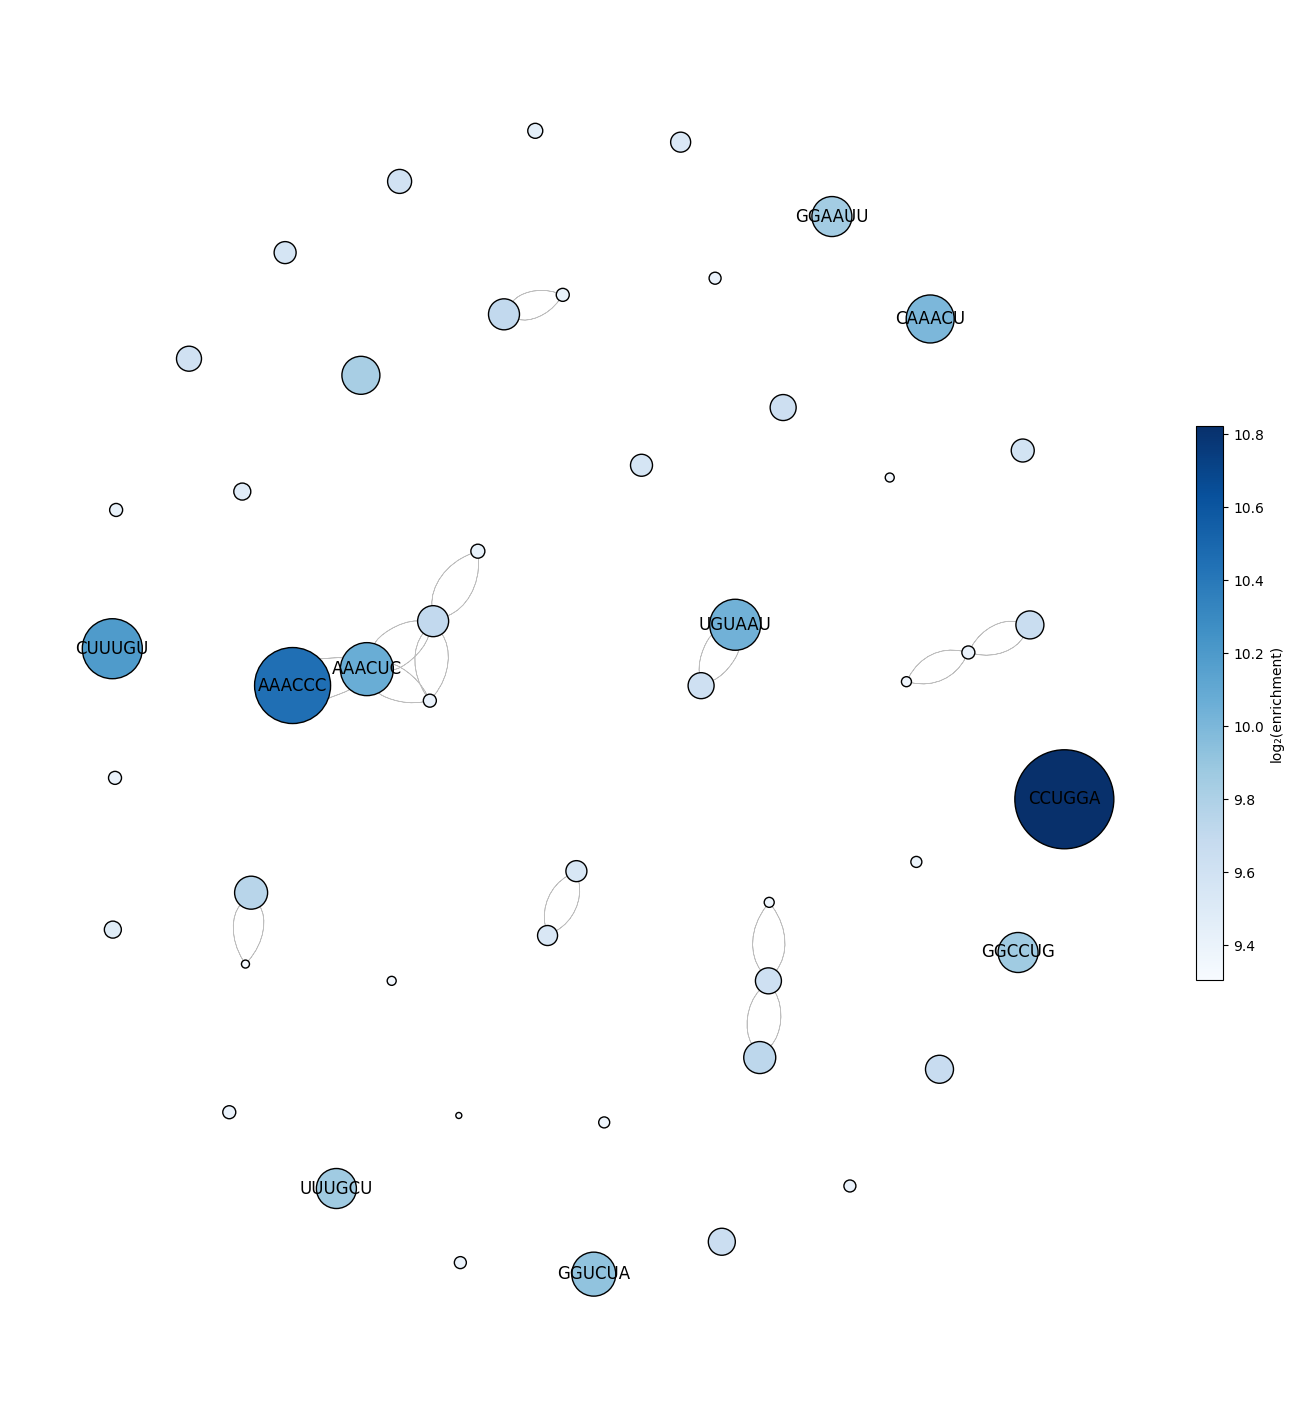

In [ ]:
import time
import numpy as np
import pandas as pd
import igraph as ig
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

# ─── 설정 ─────────────────────────────────────────────────────────────────────
ENRICH_TSV = "/content/drive/MyDrive/binfo1-work/hexamer_enrichment.tsv"
TOP_N     = 50

# ─── 1) enrichment 테이블 읽기 & Top50 선택 ────────────────────────────────────
t0 = time.perf_counter()
df = pd.read_csv(ENRICH_TSV, sep="\t", index_col="hexamer")
# T→U 변환 + 대문자화
df.index = [h.upper().replace("T","U") for h in df.index]
df["log2_enr"] = np.log2(df["enrichment"])
top50 = df["log2_enr"].sort_values(ascending=False).head(TOP_N)
print("✔ Loaded enrichment, top {}: {}  (elapsed: {:.2f}s)".format(
    TOP_N, list(top50.index), time.perf_counter() - t0
))

# ─── 2) 서브그래프: Top50 노드만 & Hamming 1 엣지 ─────────────────────────────
t1 = time.perf_counter()
H = ig.Graph()
H.add_vertices(list(top50.index))

edges50 = []
for h in tqdm(H.vs["name"], desc="Building subgraph edges", unit="hex"):
    for i in range(6):
        orig = h[i]
        for nt in ["A","C","G","U"]:
            if nt == orig:
                continue
            nei = h[:i] + nt + h[i+1:]
            if nei in top50.index:
                edges50.append((h, nei))
H.add_edges(edges50)
print("✔ Subgraph built: {} nodes, {} edges  ({:.2f}s)".format(
    H.vcount(), H.ecount(), time.perf_counter() - t1
))

# ─── 3) 레이아웃 계산 ─────────────────────────────────────────────────────────
t2 = time.perf_counter()
layout50 = H.layout_fruchterman_reingold()
print("✔ Layout computed  ({:.2f}s)".format(time.perf_counter() - t2))

# ─── 4) 노드 크기 & 색상 스케일링 ────────────────────────────────────────────
log2_vals = top50.to_numpy()
minv, maxv = log2_vals.min(), log2_vals.max()
norm = (log2_vals - minv) / (maxv - minv)
# 크기: [20,300] → 전체 ⅓ 축소
sizes = (20 + norm * (300 - 20)) * 0.33
# 색상: Blues cmap
cmap = mpl.cm.get_cmap("Blues")
colors = [cmap(v) for v in norm]

# ─── 5) 그리기 ────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(18,18))
ig.plot(
    H,
    target       = ax,
    layout       = layout50,
    vertex_size  = sizes.tolist(),
    vertex_color = colors,
    vertex_label = [
        name if sz >= 40 else ""
        for name, sz in zip(H.vs["name"], sizes)
    ],
    edge_width=0.5,
    edge_color="gray",
    margin=50
)

# 컬러바
sm = mpl.cm.ScalarMappable(
    cmap=cmap,
    norm=mpl.colors.Normalize(vmin=minv, vmax=maxv)
)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, shrink=0.4, pad=0.02)
cbar.set_label("log₂(enrichment)")

# 제목
ax.set_title(
    f"Top {TOP_N} Hexamer Similarity Network\n"
    "(mRNA: T→U, log₂ enrichment 스케일)",
    fontsize= twenty, pad=20
)

plt.tight_layout()
plt.show()


In [ ]:
import time, math
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import igraph as ig
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon

# ──────────── 설정 ────────────
ENRICH_TSV   = "/content/drive/MyDrive/binfo1-work/hexamer_enrichment.tsv"
TOP_COMM     = 3          # 뽑을 모듈(community) 개수
FIGSIZE      = (10,10)    # inch
NODE_SCALE   = 300        # 원 크기 기본 스케일
HULL_ALPHA   = 0.15       # convex hull 투명도
HULL_COLORS  = ["#c5e0b4", "#f4cccc", "#d9ead3"]  # 논문 색상 느낌
# ─────────────────────────────

t_start = time.perf_counter()

# 1) enrichment 읽고 log₂ 계산
df = pd.read_csv(ENRICH_TSV, sep="\t", index_col="hexamer")
df["log2enr"] = np.log2(df["enrichment"])
enrich_map = df["log2enr"].to_dict()
hexamers = list(enrich_map.keys())

print(f"✔ Loaded {len(hexamers)} hexamers ({time.perf_counter()-t_start:.2f}s)")

# 2) 전체 네트워크 구축 (Hamming distance = 1)
G = ig.Graph()
# 노드 레이블: T→U, 대문자
labels = [h.upper().replace("T","U") for h in hexamers]
G.add_vertices(labels)

# 빠른 이웃 생성: for each seq, mutate 한 글자씩 해서 map에 있으면 엣지 추가
edges = []
bases = ["A","C","G","T"]
for idx, h in enumerate(tqdm(hexamers, desc="Building edges")):
    for i in range(6):
        orig = h[i]
        for b in bases:
            if b==orig: continue
            nei = h[:i] + b + h[i+1:]
            if nei in enrich_map:
                edges.append((idx, hexamers.index(nei)))
G.add_edges(edges)
print(f"✔ Full graph: {G.vcount()} nodes, {G.ecount()} edges ({time.perf_counter()-t_start:.2f}s)")

# 3) Louvain community 탐색
comms = G.community_multilevel(weights=None)
print(f"✔ Found {len(comms)} communities ({time.perf_counter()-t_start:.2f}s)")




✔ Loaded 43175 hexamers (1.43s)


Building edges:   0%|          | 0/43175 [00:00<?, ?it/s]

✔ Full graph: 43175 nodes, 494561 edges (297.82s)
✔ Found 146 communities (301.56s)


In [ ]:
# ──────────── 4) 상위 TOP_COMM개 추출 ────────────
largest = sorted(comms, key=lambda c: len(c), reverse=True)[:TOP_COMM]
keep = set().union(*largest)
H = G.subgraph(keep)
print(f"✔ Extracted subgraph with {H.vcount()} nodes, {H.ecount()} edges")

# ──────────── 5) 레이아웃 계산 (풀 서브그래프) ────────────
layout_full = H.layout_fruchterman_reingold()
coords_full = np.array(layout_full.coords)

# ──────────── 5.1) M개 이하로 잘라내기 ────────────
MAX_NODES = 200
if H.vcount() > MAX_NODES:
    # 중심점
    cx, cy = coords_full[:,0].mean(), coords_full[:,1].mean()
    # 각 노드 거리
    dists = np.sqrt((coords_full[:,0]-cx)**2 + (coords_full[:,1]-cy)**2)
    # 가까운 순 MAX_NODES개 인덱스
    nearest = np.argsort(dists)[:MAX_NODES]
    # subgraph 재생성
    H = H.subgraph(nearest.tolist())
    print(f"✔ Trimmed to {H.vcount()} nodes (closest {MAX_NODES})")

# ──────────── 6) 잘라낸 H에 대해 레이아웃 재계산 ────────────
layout = H.layout_fruchterman_reingold()
coords = np.array(layout.coords)


✔ Extracted subgraph with 11806 nodes, 162741 edges
✔ Trimmed to 200 nodes (closest 200)


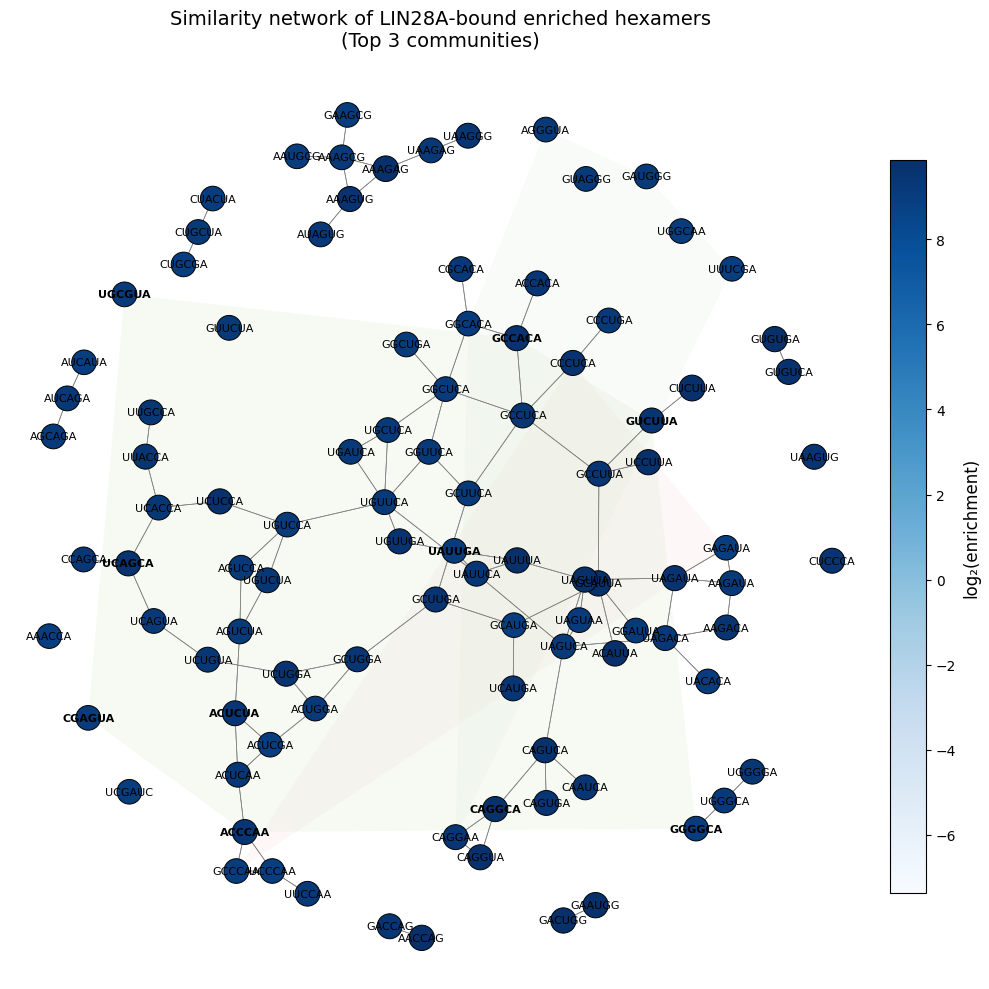

✅ Done in 12.55 min


In [ ]:


# 6) 노드 크기 & 색상
vals = np.array([ enrich_map[hexamers[i]] for i in keep ])  # log2
vmin, vmax = vals.min(), vals.max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.Blues

sizes  = [ NODE_SCALE * ( (enrich_map[hexamers[v]] - vmin)/(vmax-vmin) + 0.1 ) for v in H.vs.indices ]
colors = [ cmap(norm(enrich_map[hexamers[v]])) for v in H.vs.indices ]

# 7) 그리기
fig, ax = plt.subplots(figsize=FIGSIZE)
# 7a) convex hull 배경
coords = np.array(layout.coords)
for ci, comm in enumerate(largest[:TOP_COMM]):
    pts = coords[[H.vs.indices.index(v) for v in comm if v in H.vs.indices]]
    if len(pts)>=3:
        hull = ConvexHull(pts)
        poly = Polygon(pts[hull.vertices],
                       facecolor=HULL_COLORS[ci%len(HULL_COLORS)],
                       alpha=HULL_ALPHA,
                       edgecolor="none")
        ax.add_patch(poly)

# 7b) edges
for e in H.es:
    x0,y0 = layout[e.tuple[0]]
    x1,y1 = layout[e.tuple[1]]
    ax.plot([x0,x1],[y0,y1], color="gray", linewidth=0.5, zorder=1)

# 7c) nodes
xs, ys = coords[:,0], coords[:,1]
ax.scatter(xs, ys, s=sizes, c=colors, edgecolors="black", linewidths=0.7, zorder=2)

# 7d) labels
for v, lab in enumerate(H.vs["name"]):
    x,y = layout[v]
    ax.text(x, y, lab, fontsize=8, ha="center", va="center", zorder=3,
            color="black", weight="bold" if v in largest[0] else "normal")

# 7e) colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.04, pad=0.02)
cbar.set_label("log₂(enrichment)", fontsize=12)

ax.set_title(f"Similarity network of LIN28A‐bound enriched hexamers\n(Top {TOP_COMM} communities)", fontsize=14, pad=20)
ax.axis("off")
plt.tight_layout()
plt.show()

print(f"✅ Done in {(time.perf_counter()-t_start)/60:.2f} min")

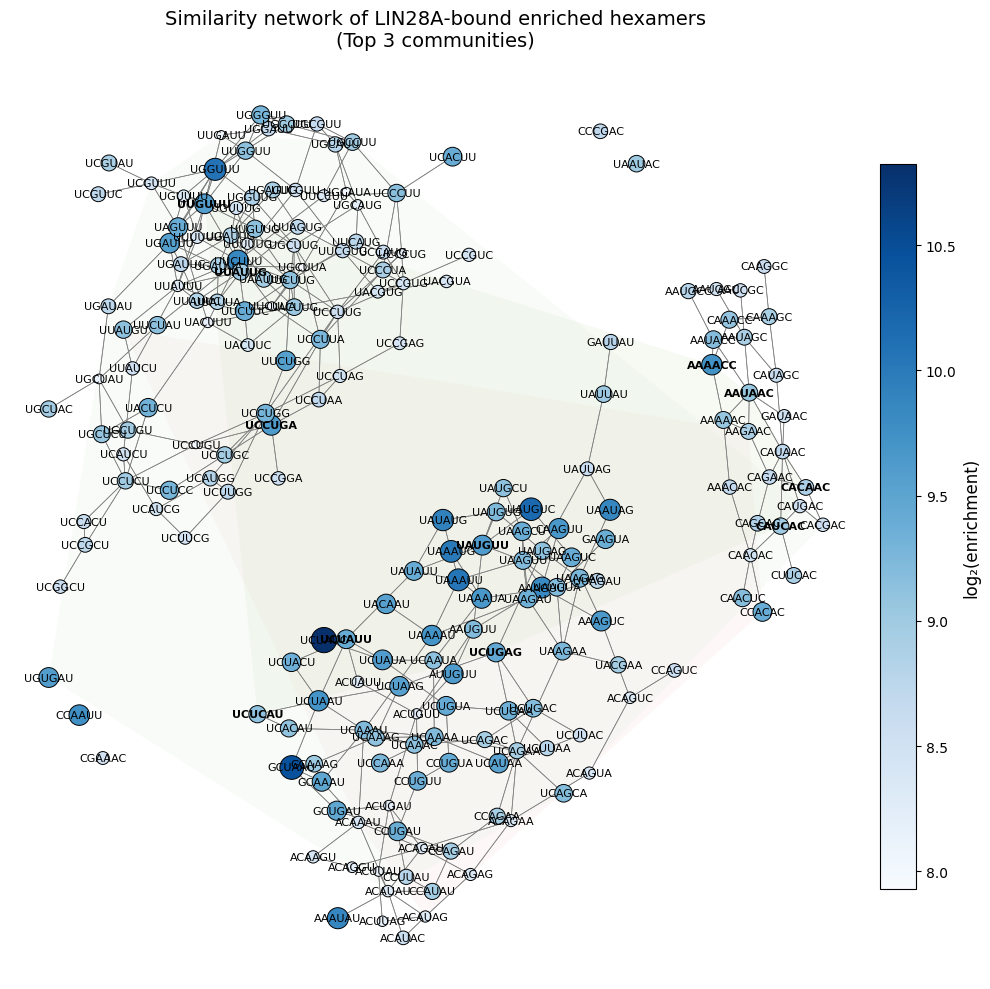

✅ Done in 11.14 min


In [ ]:
# 6) 노드 크기 & 색상
log2_vals = np.array([ enrich_map[hexamers[v]] for v in H.vs.indices ])  # H 노드 순서에 맞춰
vmin, vmax = log2_vals.min(), log2_vals.max()

# 0~1 사이로 정규화
norm  = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap  = mpl.cm.Blues  # 흰색→파랑 그라데이션

# 크기: (정규화값 + 0.1) × 기본스케일
sizes  = [ NODE_SCALE * (norm(val) + 0.1) for val in log2_vals ]
# 색상: 정규화값 → cmap(RGBA)
colors = [ cmap(norm(val))          for val in log2_vals ]

# 7) 그리기
fig, ax = plt.subplots(figsize=FIGSIZE)
# 7a) convex hull 배경
coords = np.array(layout.coords)
for ci, comm in enumerate(largest[:TOP_COMM]):
    pts = coords[[H.vs.indices.index(v) for v in comm if v in H.vs.indices]]
    if len(pts)>=3:
        hull = ConvexHull(pts)
        poly = Polygon(pts[hull.vertices],
                       facecolor=HULL_COLORS[ci%len(HULL_COLORS)],
                       alpha=HULL_ALPHA,
                       edgecolor="none")
        ax.add_patch(poly)

# 7b) edges
for e in H.es:
    x0,y0 = layout[e.tuple[0]]
    x1,y1 = layout[e.tuple[1]]
    ax.plot([x0,x1],[y0,y1], color="gray", linewidth=0.5, zorder=1)

# 7c) nodes
xs, ys = coords[:,0], coords[:,1]
ax.scatter(
    xs, ys,
    s = sizes,
    facecolor = colors,
    edgecolors = "black",
    linewidths = 0.7,
    zorder = 2,
)

# 7d) labels
for v, lab in enumerate(H.vs["name"]):
    x,y = layout[v]
    ax.text(x, y, lab, fontsize=8, ha="center", va="center", zorder=3,
            color="black", weight="bold" if v in largest[0] else "normal")

# 7e) colorbar
# ScalarMappable을 이용해서 Normalize→컬러맵 연동
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # 반드시 차트에 array 연결
cbar = fig.colorbar(sm, ax=ax, fraction=0.04, pad=0.02)
cbar.set_label("log₂(enrichment)", fontsize=12)

ax.set_title(f"Similarity network of LIN28A‐bound enriched hexamers\n(Top {TOP_COMM} communities)", fontsize=14, pad=20)
ax.axis("off")
plt.tight_layout()
plt.show()

print(f"✅ Done in {(time.perf_counter()-t_start)/60:.2f} min")

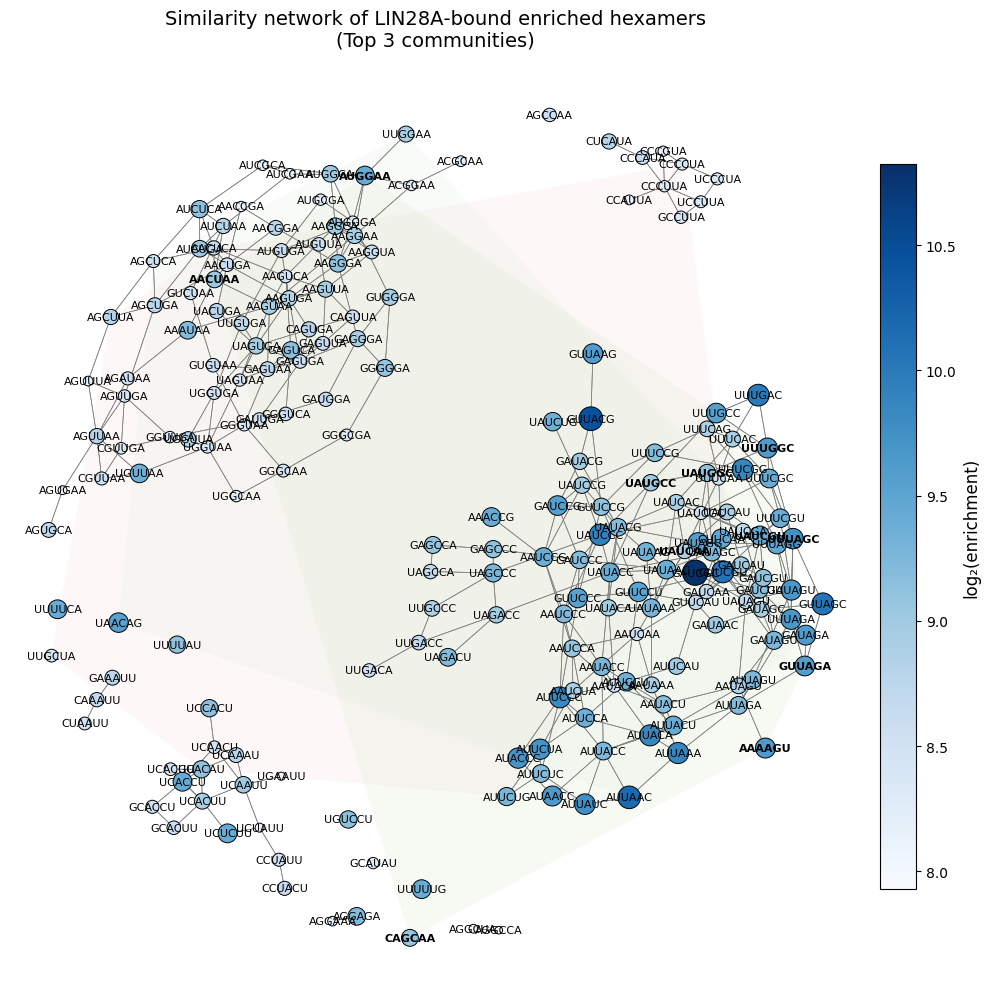

✅ Done in 5.24 min


In [ ]:
# 6) 노드 크기 & 색상
log2_vals = np.array([ enrich_map[hexamers[v]] for v in H.vs.indices ])  # H 노드 순서에 맞춰
vmin, vmax = log2_vals.min(), log2_vals.max()

# 0~1 사이로 정규화
norm  = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap  = mpl.cm.Blues  # 흰색→파랑 그라데이션

# 크기: (정규화값 + 0.1) × 기본스케일
sizes  = [ NODE_SCALE * (norm(val) + 0.1) for val in log2_vals ]
# 색상: 정규화값 → cmap(RGBA)
colors = [ cmap(norm(val))          for val in log2_vals ]

# 7) 그리기
fig, ax = plt.subplots(figsize=FIGSIZE)
# 7a) convex hull 배경
coords = np.array(layout.coords)
for ci, comm in enumerate(largest[:TOP_COMM]):
    pts = coords[[H.vs.indices.index(v) for v in comm if v in H.vs.indices]]
    if len(pts)>=3:
        hull = ConvexHull(pts)
        poly = Polygon(pts[hull.vertices],
                       facecolor=HULL_COLORS[ci%len(HULL_COLORS)],
                       alpha=HULL_ALPHA,
                       edgecolor="none")
        ax.add_patch(poly)

# 7b) edges
for e in H.es:
    x0,y0 = layout[e.tuple[0]]
    x1,y1 = layout[e.tuple[1]]
    ax.plot([x0,x1],[y0,y1], color="gray", linewidth=0.5, zorder=1)

# 7c) nodes
xs, ys = coords[:,0], coords[:,1]
ax.scatter(
    xs, ys,
    s = sizes,
    facecolor = colors,
    edgecolors = "black",
    linewidths = 0.7,
    zorder = 2,
)

# 7d) labels
for v, lab in enumerate(H.vs["name"]):
    x,y = layout[v]
    ax.text(x, y, lab, fontsize=8, ha="center", va="center", zorder=3,
            color="black", weight="bold" if v in largest[0] else "normal")

# 7e) colorbar
# ScalarMappable을 이용해서 Normalize→컬러맵 연동
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # 반드시 차트에 array 연결
cbar = fig.colorbar(sm, ax=ax, fraction=0.04, pad=0.02)
cbar.set_label("log₂(enrichment)", fontsize=12)

ax.set_title(f"Similarity network of LIN28A‐bound enriched hexamers\n(Top {TOP_COMM} communities)", fontsize=14, pad=20)
ax.axis("off")
plt.tight_layout()
plt.show()

print(f"✅ Done in {(time.perf_counter()-t_start)/60:.2f} min")

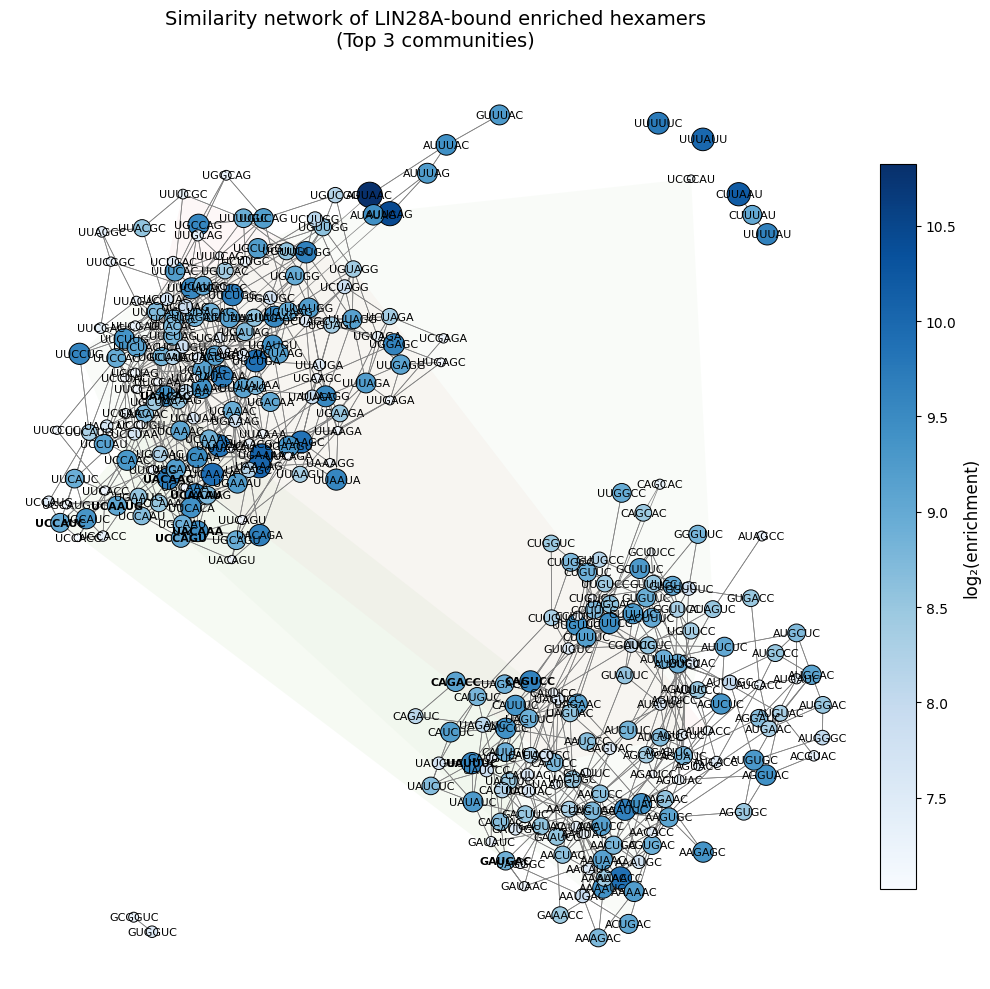

✅ Done in 8.75 min


In [ ]:

# 6) 노드 크기 & 색상
log2_vals = np.array([ enrich_map[hexamers[v]] for v in H.vs.indices ])  # H 노드 순서에 맞춰
vmin, vmax = log2_vals.min(), log2_vals.max()

# 0~1 사이로 정규화
norm  = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap  = mpl.cm.Blues  # 흰색→파랑 그라데이션

# 크기: (정규화값 + 0.1) × 기본스케일
sizes  = [ NODE_SCALE * (norm(val) + 0.1) for val in log2_vals ]
# 색상: 정규화값 → cmap(RGBA)
colors = [ cmap(norm(val))          for val in log2_vals ]

# 7) 그리기
fig, ax = plt.subplots(figsize=FIGSIZE)
# 7a) convex hull 배경
coords = np.array(layout.coords)
for ci, comm in enumerate(largest[:TOP_COMM]):
    pts = coords[[H.vs.indices.index(v) for v in comm if v in H.vs.indices]]
    if len(pts)>=3:
        hull = ConvexHull(pts)
        poly = Polygon(pts[hull.vertices],
                       facecolor=HULL_COLORS[ci%len(HULL_COLORS)],
                       alpha=HULL_ALPHA,
                       edgecolor="none")
        ax.add_patch(poly)

# 7b) edges
for e in H.es:
    x0,y0 = layout[e.tuple[0]]
    x1,y1 = layout[e.tuple[1]]
    ax.plot([x0,x1],[y0,y1], color="gray", linewidth=0.5, zorder=1)

# 7c) nodes
xs, ys = coords[:,0], coords[:,1]
ax.scatter(
    xs, ys,
    s = sizes,
    facecolor = colors,
    edgecolors = "black",
    linewidths = 0.7,
    zorder = 2,
)

# 7d) labels
for v, lab in enumerate(H.vs["name"]):
    x,y = layout[v]
    ax.text(x, y, lab, fontsize=8, ha="center", va="center", zorder=3,
            color="black", weight="bold" if v in largest[0] else "normal")

# 7e) colorbar
# ScalarMappable을 이용해서 Normalize→컬러맵 연동
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # 반드시 차트에 array 연결
cbar = fig.colorbar(sm, ax=ax, fraction=0.04, pad=0.02)
cbar.set_label("log₂(enrichment)", fontsize=12)

ax.set_title(f"Similarity network of LIN28A‐bound enriched hexamers\n(Top {TOP_COMM} communities)", fontsize=14, pad=20)
ax.axis("off")
plt.tight_layout()
plt.show()

print(f"✅ Done in {(time.perf_counter()-t_start)/60:.2f} min")

그냥 논문대로 하자

In [ ]:
# ──────────── 4) 선택할 3개 클러스터 지정 ────────────
# 대표 헥사머 이름 (대문자, T→U 치환)
TARGET_REPS = ["AAGGAG","AAGAAG","UUGUGA"]

# comms 는 원래 G.community_multilevel() 결과
# 각 community(c)는 노드 인덱스 리스트 -> G.vs["name"] 으로 매핑 가능
# reps 가 속한 커뮤니티만 골라냄
chosen_comms = []
for c in comms:
    names = [ G.vs[v]["name"] for v in c ]
    if any(rep in names for rep in TARGET_REPS):
        chosen_comms.append(c)

# 세 개가 정확히 잡혔는지 확인
print(f"✔ Picked {len(chosen_comms)} target communities")

# 이 세 커뮤니티의 노드만 subgraph 로
keep = set().union(*chosen_comms)
H = G.subgraph(keep)
print(f"✔ Subgraph(nodes={H.vcount()}, edges={H.ecount()}) for target clusters")

# ──────────── 5) 레이아웃 계산 & 중심 기준으로 100개 잘라내기 ────────────
layout_full = H.layout_fruchterman_reingold()
coords_full = np.array(layout_full.coords)

# 최대 100개까지: 중심점에서 가까운 순으로
MAX_NODES = 100
if H.vcount() > MAX_NODES:
    cx, cy = coords_full[:,0].mean(), coords_full[:,1].mean()
    dists = np.hypot(coords_full[:,0]-cx, coords_full[:,1]-cy)
    nearest_idx = np.argsort(dists)[:MAX_NODES]
    H = H.subgraph(list(nearest_idx))
    print(f"✔ Trimmed to nearest {H.vcount()} nodes by euclidean distance")

# ──────────── 6) 최종 레이아웃 재계산 ────────────
layout = H.layout_fruchterman_reingold()
coords = np.array(layout.coords)


✔ Picked 7 target communities
✔ Subgraph(nodes=18574, edges=239146) for target clusters
✔ Trimmed to nearest 100 nodes by euclidean distance


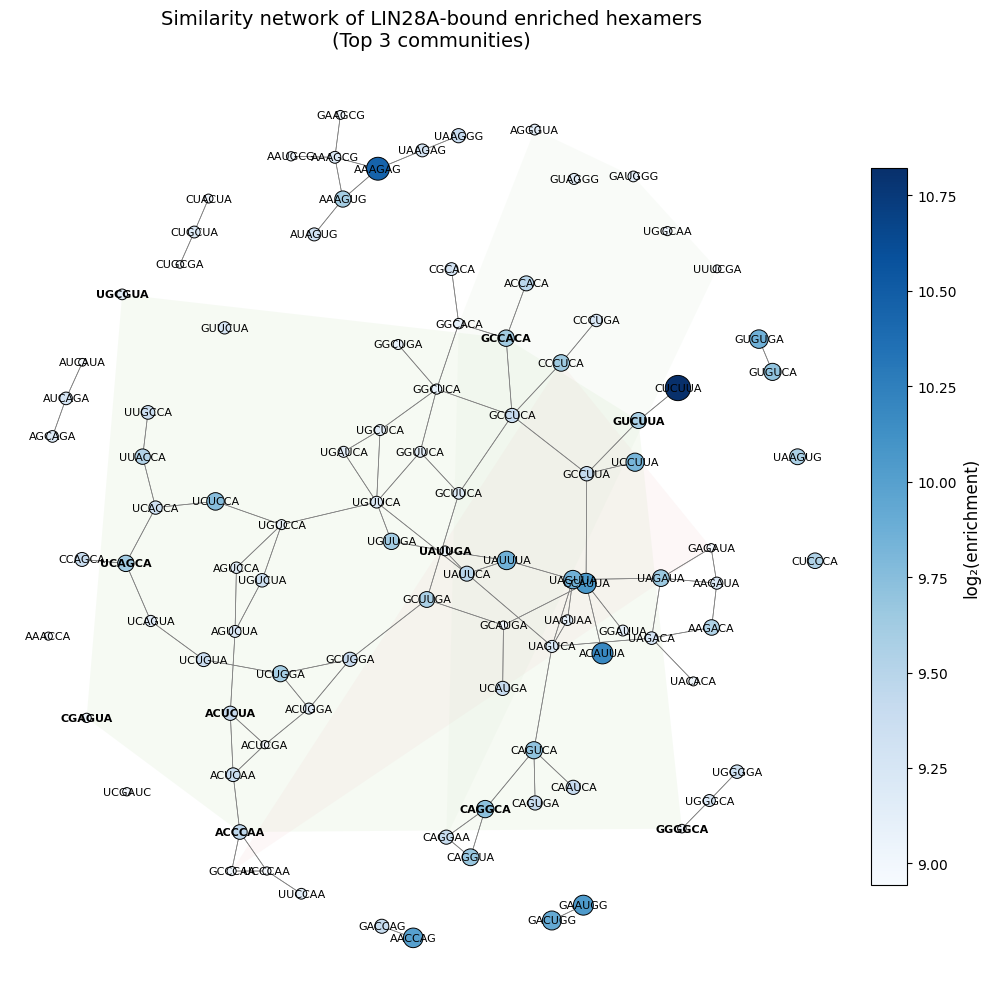

✅ Done in 11.11 min


In [ ]:

# 6) 노드 크기 & 색상
log2_vals = np.array([ enrich_map[hexamers[v]] for v in H.vs.indices ])  # H 노드 순서에 맞춰
vmin, vmax = log2_vals.min(), log2_vals.max()

# 0~1 사이로 정규화
norm  = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap  = mpl.cm.Blues  # 흰색→파랑 그라데이션

# 크기: (정규화값 + 0.1) × 기본스케일
sizes  = [ NODE_SCALE * (norm(val) + 0.1) for val in log2_vals ]
# 색상: 정규화값 → cmap(RGBA)
colors = [ cmap(norm(val))          for val in log2_vals ]

# 7) 그리기
fig, ax = plt.subplots(figsize=FIGSIZE)
# 7a) convex hull 배경
coords = np.array(layout.coords)
for ci, comm in enumerate(largest[:TOP_COMM]):
    pts = coords[[H.vs.indices.index(v) for v in comm if v in H.vs.indices]]
    if len(pts)>=3:
        hull = ConvexHull(pts)
        poly = Polygon(pts[hull.vertices],
                       facecolor=HULL_COLORS[ci%len(HULL_COLORS)],
                       alpha=HULL_ALPHA,
                       edgecolor="none")
        ax.add_patch(poly)

# 7b) edges
for e in H.es:
    x0,y0 = layout[e.tuple[0]]
    x1,y1 = layout[e.tuple[1]]
    ax.plot([x0,x1],[y0,y1], color="gray", linewidth=0.5, zorder=1)

# 7c) nodes
xs, ys = coords[:,0], coords[:,1]
ax.scatter(
    xs, ys,
    s = sizes,
    facecolor = colors,
    edgecolors = "black",
    linewidths = 0.7,
    zorder = 2,
)

# 7d) labels
for v, lab in enumerate(H.vs["name"]):
    x,y = layout[v]
    ax.text(x, y, lab, fontsize=8, ha="center", va="center", zorder=3,
            color="black", weight="bold" if v in largest[0] else "normal")

# 7e) colorbar
# ScalarMappable을 이용해서 Normalize→컬러맵 연동
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # 반드시 차트에 array 연결
cbar = fig.colorbar(sm, ax=ax, fraction=0.04, pad=0.02)
cbar.set_label("log₂(enrichment)", fontsize=12)

ax.set_title(f"Similarity network of LIN28A‐bound enriched hexamers\n(Top {TOP_COMM} communities)", fontsize=14, pad=20)
ax.axis("off")
plt.tight_layout()
plt.show()

print(f"✅ Done in {(time.perf_counter()-t_start)/60:.2f} min")

2e 시작

In [ ]:
import time
import pandas as pd
from pysam import Fastafile
from tqdm.auto import tqdm

# ——— 파일 경로 ——————————————————————————————————————————————
FASTA       = "/content/drive/MyDrive/binfo1-work/mm39.fa"
CLUSTER_MEM = "/content/drive/MyDrive/binfo1-work/cluster_membership.tsv"
OUT_HEATMAP = "/content/drive/MyDrive/binfo1-work/cluster2_WCpair_heatmap.csv"

# ——— genome FASTA 열기 ——————————————————————————————————————
fa = Fastafile(FASTA)

# ——— cluster membership 읽기 ———————————————————————————————————
# cluster_membership.tsv: hexamer \t cluster_id
df_mem = pd.read_csv(CLUSTER_MEM, sep="\t")
# 예: "cctgga" → 1, "aaaccc" → 2, …


In [ ]:
# 예시: 6-mer가 genome 상 [start, end) 에 있다면
# center_pos = start + 3  # 0-based에서 6mer 가운데
# 왼쪽 염기 위치: center_pos - 1
# 오른쪽 염기 위치: center_pos    (즉 겹치지 않게 바로 옆)


In [ ]:
import pandas as pd
from pysam import Fastafile
from collections import Counter
from tqdm.auto import tqdm

# ——— 파일 경로 설정 —————————————————————————————————————
FASTA     = "/content/drive/MyDrive/binfo1-work/mm39.fa"
CLIP_BED  = "/content/drive/MyDrive/binfo1-work/CLIP-exons.pileup"
CTRL_BED  = "/content/drive/MyDrive/binfo1-work/control_6mer.bed"
MEM_FILE  = "/content/drive/MyDrive/binfo1-work/cluster_membership.tsv"

# ——— 리소스 로드 ———————————————————————————————————————
fa = Fastafile(FASTA)
df_mem = pd.read_csv(MEM_FILE, sep="\t")  # hexamer, cluster_id
hex2cluster = dict(zip(df_mem['hexamer'], df_mem['cluster_id']))
cluster_ids   = sorted(set(hex2cluster.values()))

# ——— WC pairing map —————————————————————————————————————
wc_pairs = {"A":"T","T":"A","C":"G","G":"C"}

# ——— 라인 수 세기 함수 ——————————————————————————————————
def count_lines(path):
    with open(path, 'rb') as f:
        return sum(buf.count(b'\n') for buf in iter(lambda: f.read(1024*1024), b''))

# ——— 카운터 초기화 —————————————————————————————————————
counts    = {cid: Counter() for cid in cluster_ids}
counts_bg = {cid: Counter() for cid in cluster_ids}

# ——— 1) CLIP sites 에서 WC pair + cluster 카운팅 ——————————
total_sites = count_lines(CLIP_BED)
with open(CLIP_BED) as fin:
    for line in tqdm(fin, total=total_sites,
                     desc="CLIP WC pairs", unit="sites"):
        chrom, start, _ = line.split()[:3]
        start = int(start)
        center = start + 3

        # flanking bases
        l = fa.fetch(chrom, center-1, center)
        r = fa.fetch(chrom, center,   center+1)
        if wc_pairs.get(l) != r:
            continue
        pair = l + r

        # 6-mer sequence & cluster lookup
        seq6 = fa.fetch(chrom, start, start+6)
        cid  = hex2cluster.get(seq6)
        if cid is None:
            continue

        counts[cid][pair] += 1

# ——— 2) background 윈도우에서도 동일 처리 ————————————————
total_bg = count_lines(CTRL_BED)
with open(CTRL_BED) as fin:
    for line in tqdm(fin, total=total_bg,
                     desc="BG WC pairs", unit="sites"):
        chrom, start, _ = line.split()[:3]
        start = int(start)
        center = start + 3

        l = fa.fetch(chrom, center-1, center)
        r = fa.fetch(chrom, center,   center+1)
        if wc_pairs.get(l) != r:
            continue
        pair = l + r

        seq6 = fa.fetch(chrom, start, start+6)
        cid  = hex2cluster.get(seq6)
        if cid is None:
            continue

        counts_bg[cid][pair] += 1

print("✔ Done counting CLIP & BG WC pairs per cluster.")


CLIP WC pairs:   0%|          | 0/61733500 [00:00<?, ?sites/s]

BG WC pairs:   0%|          | 0/17761971 [00:00<?, ?sites/s]

✔ Done counting CLIP & BG WC pairs per cluster.


Normalizing:   0%|          | 0/147 [00:00<?, ?cluster/s]

✔ Saved normalized matrix to /content/drive/MyDrive/binfo1-work/cluster_pair_fold.csv
pair              AT        CG        GC        TA
cluster                                           
cluster1    0.751446  2.426326  0.621573  2.823391
cluster10   1.565218  2.790074  0.303080  4.823834
cluster100       NaN       NaN       NaN       NaN
cluster101       NaN       NaN       NaN       NaN
cluster102       NaN       NaN       NaN       NaN


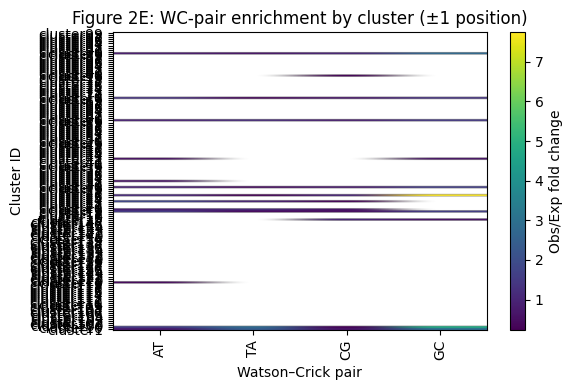

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# ——— 0) 이미 계산된 counts 불러오기 ——————————————————————
# (위에서 counts, counts_bg, cluster_ids, wc_pairs 를 이미 정의했다고 가정)

# ——— 1) 사용할 WC pair 리스트 정의 —————————————————————
# paper 2E 에 해당하는 A–T, T–A, C–G, G–C 네 가지
pairs = ["AT","TA","CG","GC"]

# ——— 2) Obs/Exp 비율 계산 ————————————————————————————
rows = []
for cid in tqdm(cluster_ids, desc="Normalizing", unit="cluster"):
    total_obs = sum(counts[cid].values())
    total_bg  = sum(counts_bg[cid].values())
    for p in pairs:
        obs = counts[cid].get(p, 0)
        bg  = counts_bg[cid].get(p, 0)
        # zero-division 방지
        if total_obs==0 or bg==0:
            fold = float('nan')
        else:
            fold = (obs/total_obs) / ( (bg/total_bg) )
        rows.append((cid, p, fold))

# DataFrame 으로 변환 → pivot
df = pd.DataFrame(rows, columns=["cluster","pair","obs_exp"])
heat_df = df.pivot(index="cluster", columns="pair", values="obs_exp")

# ——— 3) CSV로 저장 —————————————————————————————————————
OUT_CSV = "/content/drive/MyDrive/binfo1-work/cluster_pair_fold.csv"
heat_df.to_csv(OUT_CSV, sep="\t")
print(f"✔ Saved normalized matrix to {OUT_CSV}")
print(heat_df.head())

# ——— 4) Heatmap 그리기 ——————————————————————————————————
plt.figure(figsize=(6,4))
im = plt.imshow(heat_df, aspect='auto', origin='lower')
plt.colorbar(im, label="Obs/Exp fold change")
plt.xticks(range(len(pairs)), pairs, rotation=90)
plt.yticks(range(len(heat_df.index)), heat_df.index)
plt.xlabel("Watson–Crick pair")
plt.ylabel("Cluster ID")
plt.title("Figure 2E: WC-pair enrichment by cluster (±1 position)")
plt.tight_layout()
plt.show()


In [ ]:
# ─── 0) import & 경로 설정 ──────────────────────────────────────────
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from tqdm.auto import tqdm
from pysam import Fastafile

# 경로만 본인 환경에 맞게 수정하세요
FASTA      = "/content/drive/MyDrive/binfo1-work/mm39.fa"
CLIP_BED   = "/content/drive/MyDrive/binfo1-work/CLIP-exons.pileup"
CTRL_BED   = "/content/drive/MyDrive/binfo1-work/control_6mer.bed"
MEM_FILE   = "/content/drive/MyDrive/binfo1-work/cluster_membership.tsv"

# ─── 1) 리소스 로드 ─────────────────────────────────────────────────
fa     = Fastafile(FASTA)
df_mem = pd.read_csv(MEM_FILE, sep="\t")    # hexamer, cluster_id
hexamers = df_mem["hexamer"].tolist()

# Watson–Crick map
wc_pairs = {"A":"T","T":"A","C":"G","G":"C"}



In [ ]:
# ─── 2) motif 패턴 정의 & 해당 hexamer 리스트 뽑기 ────────────────────
motif_patterns = {
    "AAGNH*G": r"^AAG[ACGT][ACT]G$",   # H = A/C/T
    "AAGNGH*": r"^AAG[ACGT]G[ACT]$",
    "NUGUGN":  r"^[ACGT]TGTG[ACGT]$"    # U→T
}
motif_hex = {
    name: [h for h in hexamers if re.match(pat, h)]
    for name, pat in motif_patterns.items()
}

# ─── 3) 공통 함수: 파일 라인 세기 ───────────────────────────────────
def count_lines(path):
    with open(path, "rb") as f:
        return sum(buf.count(b"\n") for buf in iter(lambda: f.read(1024*1024), b""))

# ─── 4) co-occurrence 매트릭스 계산 ─────────────────────────────────
window = 10  # ±10nt
def compute_obsexp(hex_list):
    # raw 카운트
    M_obs = np.zeros((window, window), float)
    M_bg  = np.zeros((window, window), float)

    for bed, M in [(CLIP_BED, M_obs), (CTRL_BED, M_bg)]:
        total = count_lines(bed)
        with open(bed) as f:
            for line in tqdm(f, total=total, desc=bed, unit="sites"):
                chrom, start, _ = line.split()[:3]
                start = int(start)
                seq6  = fa.fetch(chrom, start, start+6)
                if seq6 not in hex_list:
                    continue

                center = start + 3
                seq = fa.fetch(chrom, center-window, center+window)
                if len(seq) != 2*window:
                    continue

                # ±10 위치 각각 WC pair 검사
                for i in range(window):
                    l = seq[i]
                    if l not in wc_pairs: continue
                    for j in range(window):
                        r = seq[j+window]
                        if wc_pairs[l] == r:
                            M[i,j] += 1

    # 비율로 정규화
    obs_prop = M_obs / M_obs.sum()
    bg_prop  = M_bg  / M_bg.sum()
    return obs_prop / bg_prop



In [ ]:
# ——— compute_obsexp 함수 정의는 그대로 두고 ——————————————————

# motif_hex 도 미리 정의되어 있다고 가정
# motif_hex = { "AAGNH*G": [...], "AAGNGH*": [...], "NUGUGN": [...] }

# 1) 매트릭스만 계산해서 dict 에 저장
mat_dict = {}
for name, hex_list in motif_hex.items():
    print(f"▶ Computing matrix for {name}")
    mat_dict[name] = compute_obsexp(hex_list)

# 2) np.save 로도 저장해 두면 나중에 완전히 지우고도 불러올 수 있습니다
import numpy as np
for name, mat in mat_dict.items():
    np.save(f"/content/drive/MyDrive/binfo1-work/{name}_mat.npy", mat)

print("✔ All matrices computed.")


▶ Computing matrix for AAGNH*G


/content/drive/MyDrive/binfo1-work/CLIP-exons.pileup:   0%|          | 0/61733500 [00:00<?, ?sites/s]

/content/drive/MyDrive/binfo1-work/control_6mer.bed:   0%|          | 0/17761971 [00:00<?, ?sites/s]

<ipython-input-77-1580214719>:51: RuntimeWarning: invalid value encountered in divide
  return obs_prop / bg_prop


▶ Computing matrix for AAGNGH*


/content/drive/MyDrive/binfo1-work/CLIP-exons.pileup:   0%|          | 0/61733500 [00:00<?, ?sites/s]

/content/drive/MyDrive/binfo1-work/control_6mer.bed:   0%|          | 0/17761971 [00:00<?, ?sites/s]

▶ Computing matrix for NUGUGN


/content/drive/MyDrive/binfo1-work/CLIP-exons.pileup:   0%|          | 0/61733500 [00:00<?, ?sites/s]

/content/drive/MyDrive/binfo1-work/control_6mer.bed:   0%|          | 0/17761971 [00:00<?, ?sites/s]

✔ All matrices computed.


<ipython-input-81-420236032>:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,1,0.93])


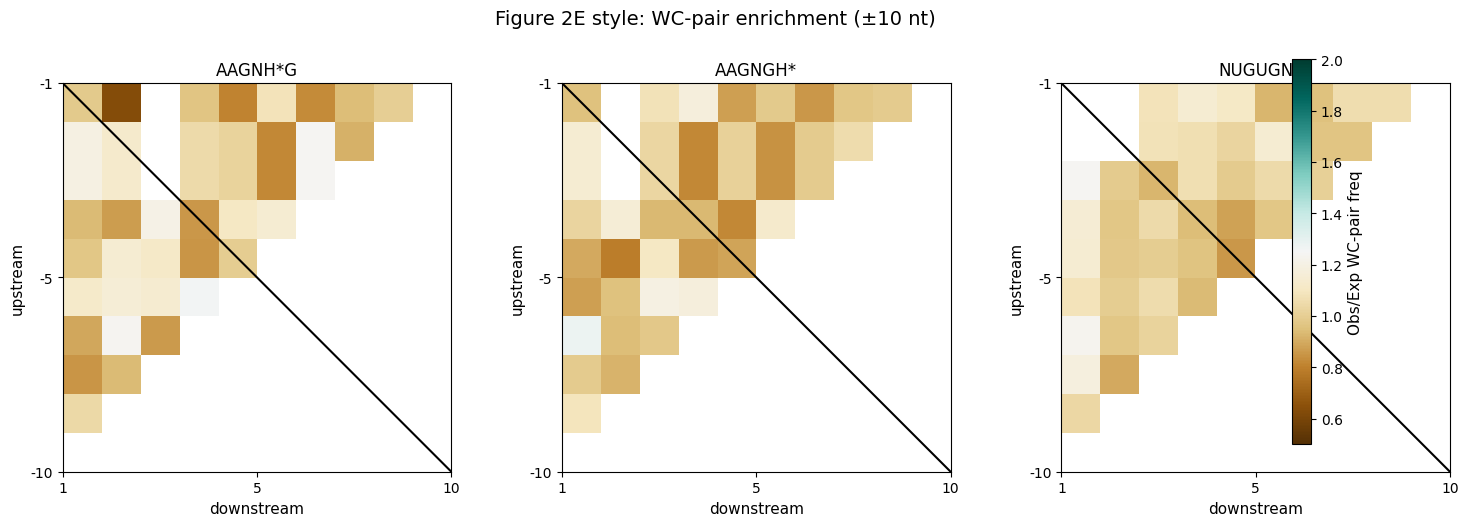

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ——— 파라미터 —————————————————————————————————————————————
window = 10
motifs = ["AAGNH*G","AAGNGH*","NUGUGN"]
mat_dict = {}  # Cell 3a에서 계산 후 저장된 매트릭스 불러오기

for name in motifs:
    mat_dict[name] = np.load(f"/content/drive/MyDrive/binfo1-work/{name}_mat.npy")

# ——— 플롯 ——————————————————————————————————————————————————
fig, axes = plt.subplots(1, 3, figsize=(15,5))

for ax, name in zip(axes, motifs):
    mat = mat_dict[name]

    # 1) 삼각형 마스크
    mask = np.triu(np.ones_like(mat, dtype=bool), k=0)
    tri  = np.ma.masked_where(mask, mat)

    # 2) 히트맵 (BrBG: Brown↔Green), 0.5↓ 녹색, 1.0 중립, 2.0↑ 갈색
    im = ax.imshow(
        tri,
        origin="lower",
        cmap="BrBG",
        vmin=0.5,
        vmax=2.0,
        extent=[0, window, 0, window]
    )

    # 3) 대각선 테두리
    ax.plot([0, window], [window, 0], color="black", linewidth=1.5)

    # 4) 눈금 표시: upstream (–10…–1), downstream (+1…+10)
    major = [0, 5, 10]
    ax.set_xticks(major)
    ax.set_xticklabels([1, 5, 10], fontsize=10)
    ax.set_yticks(major)
    ax.set_yticklabels([-10, -5, -1], fontsize=10)

    # 5) 축 레이블 & 제목
    ax.set_xlabel("downstream", fontsize=11)
    ax.set_ylabel("upstream",   fontsize=11)
    ax.set_title(name, fontsize=12)

# 6) 컬러바 (전체 플롯 공용)
cbar = fig.colorbar(
    im,
    ax=axes.ravel().tolist(),
    orientation="vertical",
    fraction=0.02,
    pad=0.04
)
cbar.set_label("Obs/Exp WC‐pair freq", fontsize=11)

plt.suptitle(
    "Figure 2E style: WC‐pair enrichment (±10 nt)",
    fontsize=14
)
plt.tight_layout(rect=[0,0,1,0.93])
plt.show()


ValueError: cannot reshape array of size 121 into shape (1,1)

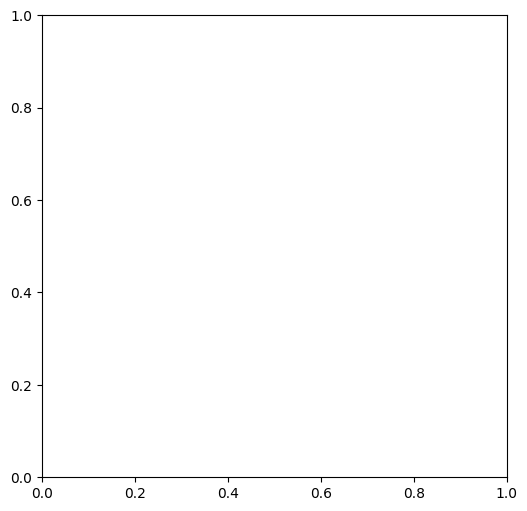

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ——— 준비: mat_dict 에서 원하는 motif 매트릭스 로드 —————————————————
name = "AAGNH*G"              # 테스트할 motif
mat15 = np.load(f"/content/drive/MyDrive/binfo1-work/AAGNH*G_mat.npy")
W = mat15.shape[0]            # 15

# ——— 1) 회전 벡터 정의 —————————————————————————————————————————
theta = np.pi/4               # 45°
v_down  = np.array([ np.cos(theta),  np.sin(theta)])  # +45° 방향 (→↗)
v_up    = np.array([-np.cos(theta),  np.sin(theta)])  # –45° 방향 (←↗)
v_horiz = np.array([1.0, 0.0])                         #  0° 방향 (←→)

# ——— 2) 사각형 격자 좌표 계산 (W+1 × W+1 그리드) —————————————————
# i: upstream steps 0…W, j: downstream steps 0…W
i, j = np.meshgrid(np.arange(W+1), np.arange(W+1), indexing='ij')  # shape=(W+1,W+1)
# 각 격자 꼭짓점의 실제 x,y 좌표
X = j[...,None]*v_down[0] + i[...,None]*v_up[0]
Y = j[...,None]*v_down[1] + i[...,None]*v_up[1]

# ——— 3) pcolormesh 로 heatmap 그리기 ——————————————————————————
fig, ax = plt.subplots(figsize=(6,6))
pcm = ax.pcolormesh(
    X, Y, mat15,            # mat15 shape (W,W)
    cmap="BrBG", vmin=0.5, vmax=2.0
)

# ——— 4) 세 변 위에 눈금 & 레이블 ——————————————————————————
#  0° 수평축 (motif 축): i=0, j from 0…W
xs = np.linspace(0, W, 5)   # 5개 tick
ys = np.zeros_like(xs)
ax.plot(xs*v_horiz[0], xs*v_horiz[1], color='k', lw=1.2)
for x, lab in zip(xs, [ -15, -7, 0, +7, +15 ]):
    px, py = x*v_horiz
    ax.text(px, py-0.5, str(lab), ha='center', va='top', fontsize=9)

# –45° 축 (upstream): j=0, i from 0…W
us = np.linspace(0, W, 5)
coords_up = us[:,None]*v_up
ax.plot(coords_up[:,0], coords_up[:,1], color='k', lw=1.2)
for u, lab in zip(us, [ -15, -7, -1, +7, +15 ]):
    px, py = u*v_up
    ax.text(px-0.5, py, str(abs(int(lab))), ha='right', va='center', fontsize=9)

# +45° 축 (downstream): i=


In [ ]:
# Cell: 계산 부분 (한 번만 실행) — hexamer 3번째 염기를 0 기준, window = ±15 nt
import numpy as np
import pandas as pd
import re
from pysam import Fastafile
from tqdm.auto import tqdm

# ——— 파일 경로 설정 —————————————————————————————————————
FASTA     = "/content/drive/MyDrive/binfo1-work/mm39.fa"
CLIP_BED  = "/content/drive/MyDrive/binfo1-work/CLIP-exons.pileup"
CTRL_BED  = "/content/drive/MyDrive/binfo1-work/control_6mer.bed"
MEM_FILE  = "/content/drive/MyDrive/binfo1-work/cluster_membership.tsv"

# ——— 리소스 로드 ———————————————————————————————————————
fa       = Fastafile(FASTA)
df_mem   = pd.read_csv(MEM_FILE, sep="\t")  # columns: hexamer, cluster_id
hexamers = df_mem["hexamer"].tolist()

# Watson–Crick 페어링 맵
wc_pairs = {"A":"T", "T":"A", "C":"G", "G":"C"}

# ——— 분석할 motif 패턴 & hexamer 리스트 만들기 —————————————————————
motif_patterns = {
    "AAGNH*G": r"^AAG[ACGT][ACT]G$",   # H = A/C/T
    "AAGNGH*": r"^AAG[ACGT]G[ACT]$",
    "NUGUGN":  r"^[ACGT]TGTG[ACGT]$"    # U→T
}
motif_hex = {
    name: [h for h in hexamers if re.match(pat, h)]
    for name, pat in motif_patterns.items()
}

# ——— 윈도우 설정 (±15 nt) —————————————————————————————————————
window = 15

# ——— 파일 총 라인 수 세기 ———————————————————————————————————
def count_lines(path):
    with open(path, "rb") as f:
        return sum(buf.count(b"\n") for buf in iter(lambda: f.read(1024*1024), b""))

# ——— Obs/Exp 매트릭스 계산 함수 —————————————————————————————————
def compute_obsexp(hex_list):
    M_obs = np.zeros((window, window), float)
    M_bg  = np.zeros((window, window), float)
    for bed, M in [(CLIP_BED, M_obs), (CTRL_BED, M_bg)]:
        total = count_lines(bed)
        with open(bed) as fin:
            for line in tqdm(fin, total=total, desc=bed, unit="sites"):
                chrom, start, _ = line.split()[:3]
                start = int(start)
                # 6-mer 3번째 염기를 0 위치로
                center = start + 3
                seq6   = fa.fetch(chrom, start, start+6)
                if seq6 not in hex_list:
                    continue
                # ±window 범위 시퀀스
                seq = fa.fetch(chrom, center-window, center+window)
                if len(seq) != 2*window:
                    continue
                # Watson–Crick pair 카운팅
                for i in range(window):
                    l = seq[i]
                    if wc_pairs.get(l) is None:
                        continue
                    for j in range(window):
                        r = seq[j+window]
                        if wc_pairs[l] == r:
                            M[i, j] += 1
    # 비율로 정규화
    obs_prop = M_obs / M_obs.sum()
    bg_prop  = M_bg  / M_bg.sum()
    return obs_prop / bg_prop

# ——— motif 별로 매트릭스 계산 & 저장 —————————————————————————————
matrices = {}
for name, hex_list in motif_hex.items():
    print(f"▶ Computing ±{window}nt WC‐pair Obs/Exp for {name}")
    mat = compute_obsexp(hex_list)
    matrices[name] = mat
    np.save(f"/content/drive/MyDrive/binfo1-work/{name}_mat15.npy", mat)

print("✔ 모든 매트릭스(±15nt) 계산 및 저장 완료")


▶ Computing ±15nt WC‐pair Obs/Exp for AAGNH*G


/content/drive/MyDrive/binfo1-work/CLIP-exons.pileup:   0%|          | 0/61733500 [00:00<?, ?sites/s]

/content/drive/MyDrive/binfo1-work/control_6mer.bed:   0%|          | 0/17761971 [00:00<?, ?sites/s]

<ipython-input-88-2170668296>:72: RuntimeWarning: invalid value encountered in divide
  return obs_prop / bg_prop


▶ Computing ±15nt WC‐pair Obs/Exp for AAGNGH*


/content/drive/MyDrive/binfo1-work/CLIP-exons.pileup:   0%|          | 0/61733500 [00:00<?, ?sites/s]

/content/drive/MyDrive/binfo1-work/control_6mer.bed:   0%|          | 0/17761971 [00:00<?, ?sites/s]

▶ Computing ±15nt WC‐pair Obs/Exp for NUGUGN


/content/drive/MyDrive/binfo1-work/CLIP-exons.pileup:   0%|          | 0/61733500 [00:00<?, ?sites/s]

/content/drive/MyDrive/binfo1-work/control_6mer.bed:   0%|          | 0/17761971 [00:00<?, ?sites/s]

✔ 모든 매트릭스(±15nt) 계산 및 저장 완료


<ipython-input-100-2170281809>:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.9,1])


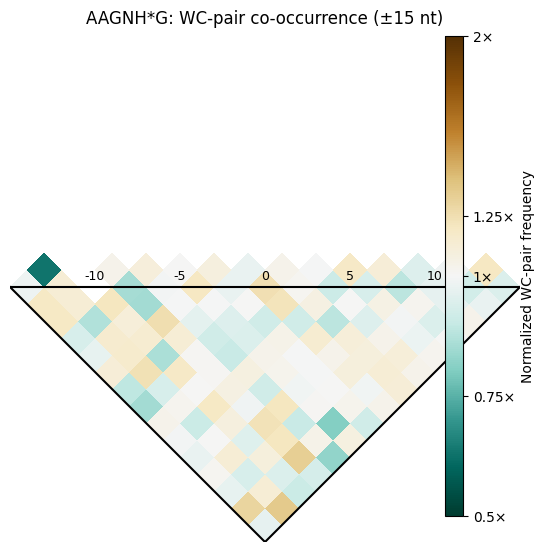

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 1) 매트릭스 로드 (예: AAGNH*G)
mat  = np.load("/content/drive/MyDrive/binfo1-work/AAGNH*G_mat15.npy")
W    = mat.shape[0]   # 15

# 2) 원래 corner 좌표: right-iso triangle in standard orientation
#    legs along axes: corners (j, i) for j,i=0…W
i0, j0 = np.meshgrid(np.arange(W+1), np.arange(W+1), indexing="ij")
# 3) mask: 위-삼각형(i+j>W) 잘라내기
mask = (i0 + j0) > W
data = np.ma.masked_array(mat, mask=mask[:-1,:-1])  # mat shape W×W

# 4) 45° CCW 회전 변환 행렬
θ   = np.pi/4
R   = np.array([[ np.cos(θ), -np.sin(θ)],
                [ np.sin(θ),  np.cos(θ)]])

# 5) corners 회전
#    X0 = j0, Y0 = i0
XY0 = np.stack([j0, i0], axis=-1).reshape(-1,2)  # ( (W+1)^2, 2 )
XY  = XY0.dot(R.T)  # 회전 적용
Xr  = XY[:,0].reshape(W+1, W+1)
Yr  = XY[:,1].reshape(W+1, W+1)

# 6) 컬러맵 & norm
norm = TwoSlopeNorm(vmin=0.5, vcenter=1.0, vmax=2.0)
cmap = "BrBG_r"

# 7) 플롯
fig, ax = plt.subplots(figsize=(6,6))

pcm = ax.pcolormesh(
    Xr, Yr, data,
    cmap=cmap, norm=norm,
    shading="auto"
)

# 테두리: 삼각형 빗변, 두 다리(legs)
#    회전 전 삼각형의 세 꼭짓점: (0,W),(W,0),(0,0)
corners0 = np.array([[0,W],[W,0],[0,0]])
corners  = corners0.dot(R.T)
# hypotenuse between (0,W)->(W,0)
ax.plot(corners[[0,1],0], corners[[0,1],1], 'k-', lw=1.5)
# leg1 (0,0)->(0,W)
ax.plot(corners[[2,0],0], corners[[2,0],1], 'k-', lw=1.5)
# leg2 (0,0)->(W,0)
ax.plot(corners[[2,1],0], corners[[2,1],1], 'k-', lw=1.5)

# 8) 밑변 눈금: hypotenuse 좌표에서 5단위 표시
for L in [-10,-5,0,5,10]:
    # 원래 (j,i) = ((L+W)/2, (W-L)/2) 가 hypotenuse 상 포인트
    j = (L + W)/2
    i = (W - L)/2
    x0, y0 = np.dot(R, np.array([j,i]))
    ax.text(x0, y0 + 0.2, f"{L}", ha='center', va='bottom', fontsize=9)

# 9) 컬러바
cax = fig.add_axes([0.75,0.1,0.03,0.8])
cb  = plt.colorbar(pcm, cax=cax)
cb.set_ticks([0.5,0.75,1.0,1.25,2.0])
cb.set_ticklabels(["0.5×","0.75×","1×","1.25×","2×"])
cb.set_label("Normalized WC‐pair frequency", fontsize=10)

ax.set_aspect("equal")
ax.axis("off")
ax.set_title("AAGNH*G: WC‐pair co‐occurrence (±15 nt)", fontsize=12)
plt.tight_layout(rect=[0,0,0.9,1])
plt.show()


<ipython-input-104-3885284454>:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.9,1])


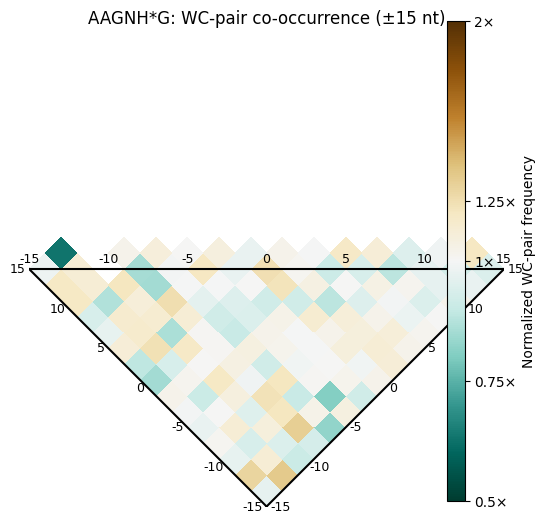

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 1) 매트릭스 로드 (±15 nt)
mat = np.load("/content/drive/MyDrive/binfo1-work/AAGNH*G_mat15.npy")
W   = mat.shape[0]   # 15

# 2) 원격 그리드 생성 & 마스크
i0, j0 = np.meshgrid(np.arange(W+1), np.arange(W+1), indexing="ij")
mask   = (i0 + j0) > W
data   = np.ma.masked_array(mat, mask=mask[:-1,:-1])

# 3) 2배 스케일 & 45° CCW 회전
XY0 = np.stack([j0*2, i0*2], axis=-1).reshape(-1,2)  # 0…30
θ   = np.pi/4
R   = np.array([[ np.cos(θ), -np.sin(θ)],
                [ np.sin(θ),  np.cos(θ)]])
XY  = XY0.dot(R.T)
Xr  = XY[:,0].reshape(W+1, W+1)
Yr  = XY[:,1].reshape(W+1, W+1)

# 4) 컬러맵 & norm
norm = TwoSlopeNorm(vmin=0.5, vcenter=1.0, vmax=2.0)
cmap = "BrBG_r"

# 5) 플롯
fig, ax = plt.subplots(figsize=(6,6))
pcm = ax.pcolormesh(Xr, Yr, data, cmap=cmap, norm=norm, shading="auto")

# 6) 삼각형 테두리
corners0 = np.array([[ 0, 2*W], [2*W, 0], [ 0, 0]])  # (0,30),(30,0),(0,0)
corners  = corners0.dot(R.T)
ax.plot(corners[[0,1],0], corners[[0,1],1], 'k-', lw=1.5)  # hypotenuse
ax.plot(corners[[2,0],0], corners[[2,0],1], 'k-', lw=1.5)  # left leg
ax.plot(corners[[2,1],0], corners[[2,1],1], 'k-', lw=1.5)  # right leg

# 7) 공통 눈금 리스트
ticks = [-15, -10, -5, 0, 5, 10, 15]

# 7-1) hypotenuse (corners[0]→corners[1])
for L in ticks:
    t = (L + 15) / 30
    p0, p1 = corners[0], corners[1]
    x, y   = p0 + t*(p1-p0)
    ax.text(x, y+0.3, str(L), ha='center', va='bottom', fontsize=9)

# 7-2) left leg (corners[2]→corners[0])
for L in ticks:
    t = (L + 15) / 30
    p0, p1 = corners[2], corners[0]
    x, y   = p0 + t*(p1-p0)
    ax.text(x-0.3, y, str(L), ha='right', va='center', fontsize=9)

# 7-3) right leg (corners[2]→corners[1])
for L in ticks:
    t = (L + 15) / 30
    p0, p1 = corners[2], corners[1]
    x, y   = p0 + t*(p1-p0)
    ax.text(x+0.3, y, str(L), ha='left', va='center', fontsize=9)

# 8) 마무리 & 컬러바
ax.set_aspect('equal')
ax.axis('off')
ax.set_title("AAGNH*G: WC-pair co-occurrence (±15 nt)", fontsize=12)

cax = fig.add_axes([0.75,0.1,0.03,0.8])
cb  = plt.colorbar(pcm, cax=cax)
cb.set_ticks([0.5,0.75,1.0,1.25,2.0])
cb.set_ticklabels(["0.5×","0.75×","1×","1.25×","2×"])
cb.set_label("Normalized WC-pair frequency", fontsize=10)

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()


<ipython-input-105-2688688489>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.9,1])


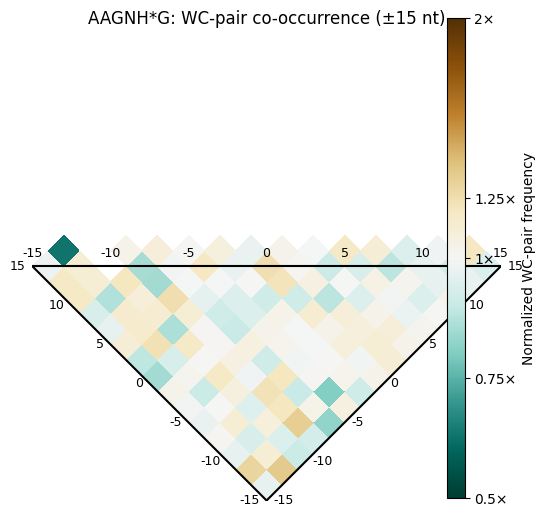

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 1) 매트릭스 로드 (±15 nt)
mat = np.load("/content/drive/MyDrive/binfo1-work/AAGNH*G_mat15.npy")
W   = mat.shape[0]   # 15

# 2) 원격 그리드 생성 & 마스크
i0, j0 = np.meshgrid(np.arange(W+1), np.arange(W+1), indexing="ij")
mask   = (i0 + j0) > W
data   = np.ma.masked_array(mat, mask=mask[:-1,:-1])

# 3) **스케일 2→1** & 45° CCW 회전
XY0 = np.stack([j0*1, i0*1], axis=-1).reshape(-1,2)  # 0…15
θ   = np.pi/4
R   = np.array([[ np.cos(θ), -np.sin(θ)],
                [ np.sin(θ),  np.cos(θ)]])
XY  = XY0.dot(R.T)
Xr  = XY[:,0].reshape(W+1, W+1)
Yr  = XY[:,1].reshape(W+1, W+1)

# 4) 컬러맵 & norm
norm = TwoSlopeNorm(vmin=0.5, vcenter=1.0, vmax=2.0)
cmap = "BrBG_r"

# 5) 플롯
fig, ax = plt.subplots(figsize=(6,6))
pcm = ax.pcolormesh(Xr, Yr, data, cmap=cmap, norm=norm, shading="auto")

# 6) 삼각형 테두리 (corners0도 2→1 스케일)
corners0 = np.array([[ 0,  W],
                     [ W,  0],
                     [ 0,  0]])  # (0,15),(15,0),(0,0)
corners  = corners0.dot(R.T)
ax.plot(corners[[0,1],0], corners[[0,1],1], 'k-', lw=1.5)
ax.plot(corners[[2,0],0], corners[[2,0],1], 'k-', lw=1.5)
ax.plot(corners[[2,1],0], corners[[2,1],1], 'k-', lw=1.5)

# 7) 눈금 레이블 (–15…+15)
ticks = np.arange(-15,16,5)
for L in ticks:
    t   = (L + 15) / 30            # –15→0, +15→1
    # hypotenuse
    p0,p1 = corners[0], corners[1]
    x,y   = p0 + t*(p1-p0)
    ax.text(x, y+0.3, str(L), ha='center', va='bottom', fontsize=9)
    # left leg
    p0,p1 = corners[2], corners[0]
    x,y   = p0 + t*(p1-p0)
    ax.text(x-0.3, y, str(L), ha='right', va='center', fontsize=9)
    # right leg
    p0,p1 = corners[2], corners[1]
    x,y   = p0 + t*(p1-p0)
    ax.text(x+0.3, y, str(L), ha='left', va='center', fontsize=9)

# 8) 마무리 & 컬러바
ax.set_aspect('equal')
ax.axis('off')
ax.set_title("AAGNH*G: WC-pair co-occurrence (±15 nt)", fontsize=12)

cax = fig.add_axes([0.75,0.1,0.03,0.8])
cb  = plt.colorbar(pcm, cax=cax)
cb.set_ticks([0.5,0.75,1.0,1.25,2.0])
cb.set_ticklabels(["0.5×","0.75×","1×","1.25×","2×"])
cb.set_label("Normalized WC-pair frequency", fontsize=10)

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import re
from pysam import Fastafile
from tqdm.auto import tqdm

# ——— 파일 경로 설정 —————————————————————————————————————
FASTA     = "/content/drive/MyDrive/binfo1-work/mm39.fa"
CLIP_BED  = "/content/drive/MyDrive/binfo1-work/CLIP-exons.pileup"
CTRL_BED  = "/content/drive/MyDrive/binfo1-work/control_6mer.bed"
MEM_FILE  = "/content/drive/MyDrive/binfo1-work/cluster_membership.tsv"

# ——— 리소스 로드 ———————————————————————————————————————
fa       = Fastafile(FASTA)
df_mem   = pd.read_csv(MEM_FILE, sep="\t")  # columns: hexamer, cluster_id
hexamers = df_mem["hexamer"].tolist()

# Watson–Crick 페어링 맵
wc_pairs = {"A":"T", "T":"A", "C":"G", "G":"C"}

# ——— motif 패턴 정의 —————————————————————————————————————
motif_patterns = {
    "AAGNH*G": r"^AAG[ACGT][ACT]G$",
    "AAGNGH*": r"^AAG[ACGT]G[ACT]$",
    "NUGUGN":  r"^[ACGT]TGTG[ACGT]$"
}
motif_hex = {
    name: [h for h in hexamers if re.match(pat, h)]
    for name, pat in motif_patterns.items()
}

# ——— window 설정 —————————————————————————————————————
window = 15
size   = 2*window + 1   # 31

# ——— 파일 총 라인 수 카운트 —————————————————————————————————
def count_lines(path):
    with open(path, "rb") as f:
        return sum(buf.count(b"\n") for buf in iter(lambda: f.read(1024*1024), b""))

# ——— 31×31 Obs/Exp 계산 함수 —————————————————————————————————
def compute_obsexp31(hex_list):
    M_obs = np.zeros((size, size), float)
    M_bg  = np.zeros((size, size), float)

    for bed, M in [(CLIP_BED, M_obs), (CTRL_BED, M_bg)]:
        total = count_lines(bed)
        with open(bed) as fin:
            for line in tqdm(fin, total=total, desc=bed, unit="line"):
                chrom, start, _ = line.split()[:3]
                start = int(start)
                center = start + 3

                # 6-mer 필터
                seq6 = fa.fetch(chrom, start, start+6)
                if seq6 not in hex_list:
                    continue

                # ±window 범위, 길이 = 31
                seq = fa.fetch(chrom, center-window, center+window+1)
                if len(seq) != size:
                    continue

                # full 31×31 co-occurrence
                for i, l in enumerate(seq):
                    rc = wc_pairs.get(l)
                    if rc is None:
                        continue
                    for j, r in enumerate(seq):
                        if r == rc:
                            M[i, j] += 1

    # 정규화
    obs_prop = M_obs / M_obs.sum()
    bg_prop  = M_bg  / M_bg.sum()
    return obs_prop / bg_prop

# ——— 사용자 입력으로 모티프 하나만 계산 & 저장 ——————————————————
motif_name = input("계산할 모티프 이름을 입력하세요 (AAGNH*G/AAGNGH*/NUGUGN): ")
hex_list   = motif_hex[motif_name]

print(f"▶ {motif_name} 에 대해 ±{window}nt (31×31) WC‐pair Obs/Exp 계산 중...")
mat31 = compute_obsexp31(hex_list)
print("→ 계산된 매트릭스 shape:", mat31.shape)  # (31, 31)

# 저장
out_path = f"/content/drive/MyDrive/binfo1-work/{motif_name}_mat31.npy"
np.save(out_path, mat31)
print("✔ 저장 완료:", out_path)


계산할 모티프 이름을 입력하세요 (AAGNH*G/AAGNGH*/NUGUGN): NUGUGN
▶ NUGUGN 에 대해 ±15nt (31×31) WC‐pair Obs/Exp 계산 중...


/content/drive/MyDrive/binfo1-work/CLIP-exons.pileup:   0%|          | 0/61733500 [00:00<?, ?line/s]

/content/drive/MyDrive/binfo1-work/control_6mer.bed:   0%|          | 0/17761971 [00:00<?, ?line/s]

→ 계산된 매트릭스 shape: (31, 31)
✔ 저장 완료: /content/drive/MyDrive/binfo1-work/NUGUGN_mat31.npy


<ipython-input-132-928571568>:76: RuntimeWarning: invalid value encountered in divide
  return obs_prop / bg_prop


<ipython-input-108-3186309033>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.9,1])


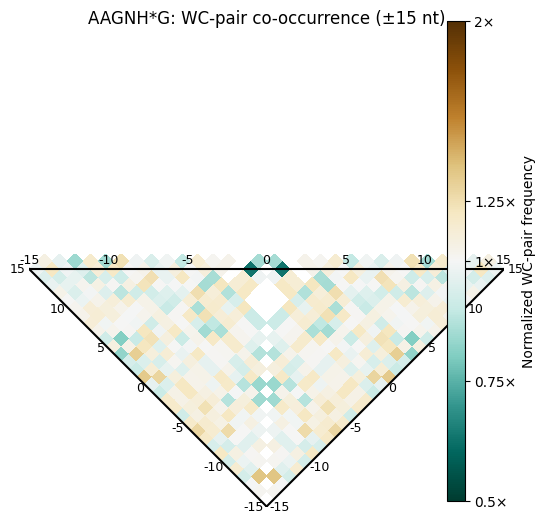

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 1) 31×31 매트릭스 로드 (±15 nt 전체 co-occurrence)
mat = np.load("/content/drive/MyDrive/binfo1-work/AAGNH*G_mat31.npy")
W   = mat.shape[0]  # 31

# 2) 그리드 생성 & 마스킹
i0, j0 = np.meshgrid(np.arange(W+1), np.arange(W+1), indexing="ij")
mask   = (i0 + j0) > W
data   = np.ma.masked_array(mat, mask=mask[:-1, :-1])

# 3) 45° CCW 회전
θ   = np.pi/4
R   = np.array([[ np.cos(θ), -np.sin(θ)],
                [ np.sin(θ),  np.cos(θ)]])
XY0 = np.stack([j0, i0], axis=-1).reshape(-1,2)      # 코너 좌표 (0…31)
XY  = XY0.dot(R.T)
Xr  = XY[:,0].reshape(W+1, W+1)
Yr  = XY[:,1].reshape(W+1, W+1)

# 4) 컬러맵 & 중립(norm)
norm = TwoSlopeNorm(vmin=0.5, vcenter=1.0, vmax=2.0)
cmap = "BrBG_r"

# 5) 플롯
fig, ax = plt.subplots(figsize=(6,6))
pcm = ax.pcolormesh(Xr, Yr, data, cmap=cmap, norm=norm, shading="auto")

# 6) 삼각형 테두리
corners0 = np.array([[ 0,   W],
                     [ W,   0],
                     [ 0,   0]])    # (0,31),(31,0),(0,0)
corners  = corners0.dot(R.T)
ax.plot(corners[[0,1],0], corners[[0,1],1], 'k-', lw=1.5)  # hypotenuse
ax.plot(corners[[2,0],0], corners[[2,0],1], 'k-', lw=1.5)  # left leg
ax.plot(corners[[2,1],0], corners[[2,1],1], 'k-', lw=1.5)  # right leg

# 7) 눈금 레이블 (–15…+15)
ticks = np.arange(-15, 16, 5)
for L in ticks:
    t = (L + 15) / (2*15)   # –15→0, +15→1
    # hypotenuse
    p0, p1 = corners[0], corners[1]
    x, y   = p0 + t*(p1 - p0)
    ax.text(x, y+0.3, str(L), ha='center', va='bottom', fontsize=9)
    # left leg
    p0, p1 = corners[2], corners[0]
    x, y   = p0 + t*(p1 - p0)
    ax.text(x-0.3, y, str(L), ha='right', va='center', fontsize=9)
    # right leg
    p0, p1 = corners[2], corners[1]
    x, y   = p0 + t*(p1 - p0)
    ax.text(x+0.3, y, str(L), ha='left', va='center', fontsize=9)

# 8) 마무리 & 컬러바
ax.set_aspect('equal')
ax.axis('off')
ax.set_title("AAGNH*G: WC-pair co-occurrence (±15 nt)", fontsize=12)

cax = fig.add_axes([0.75, 0.1, 0.03, 0.8])
cb  = plt.colorbar(pcm, cax=cax)
cb.set_ticks([0.5, 0.75, 1.0, 1.25, 2.0])
cb.set_ticklabels(["0.5×","0.75×","1×","1.25×","2×"])
cb.set_label("Normalized WC-pair frequency", fontsize=10)

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()


<ipython-input-109-2258731827>:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.9,1])


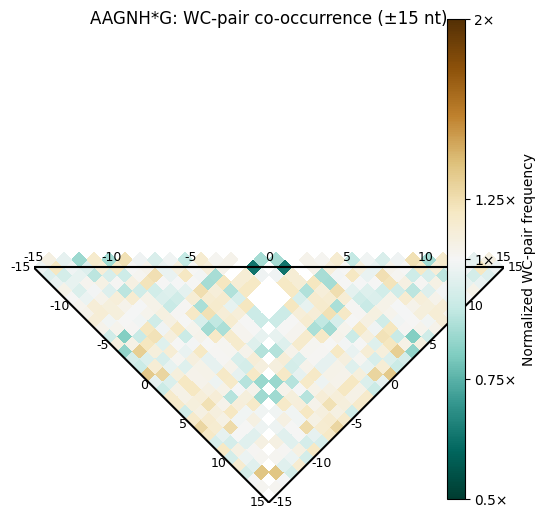

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 1) 31×31 매트릭스 로드
mat = np.load("/content/drive/MyDrive/binfo1-work/AAGNH*G_mat31.npy")
W   = mat.shape[0]  # 31

# 2) 그리드 생성 & 윗삼각 마스크
i0, j0 = np.meshgrid(np.arange(W+1), np.arange(W+1), indexing="ij")
mask   = (i0 + j0) > W
data   = np.ma.masked_array(mat, mask=mask[:-1, :-1])

# 3) 45° 회전 변환 준비
θ   = np.pi/4
R   = np.array([[ np.cos(θ), -np.sin(θ)],
                [ np.sin(θ),  np.cos(θ)]])
XY0 = np.stack([j0, i0], axis=-1).reshape(-1,2)
XY  = XY0.dot(R.T)
Xr  = XY[:,0].reshape(W+1, W+1)
Yr  = XY[:,1].reshape(W+1, W+1)

# 4) 컬러맵 & norm
norm = TwoSlopeNorm(vmin=0.5, vcenter=1.0, vmax=2.0)
cmap = "BrBG_r"

# 5) 플롯
fig, ax = plt.subplots(figsize=(6,6))
pcm = ax.pcolormesh(Xr, Yr, data, cmap=cmap, norm=norm, shading="auto")

# 6) 테두리 삼각형
corners0 = np.array([[ 0,   W],
                     [ W,   0],
                     [ 0,   0]])   # (0,31),(31,0),(0,0)
corners  = corners0.dot(R.T)
ax.plot(corners[[0,1],0], corners[[0,1],1], 'k-', lw=1.5)  # hypotenuse
ax.plot(corners[[2,0],0], corners[[2,0],1], 'k-', lw=1.5)  # left leg
ax.plot(corners[[2,1],0], corners[[2,1],1], 'k-', lw=1.5)  # right leg

# 7) 눈금 레이블
ticks = np.arange(-15, 16, 5)
for L in ticks:
    t = (L + 15) / (2*15)   # –15→0, +15→1

    # hypotenuse (가로)
    p0,p1 = corners[0], corners[1]
    x,y   = p0 + t*(p1-p0)
    ax.text(x, y+0.3, str(L), ha='center', va='bottom', fontsize=9)

    # 왼쪽 leg: 위→아래 = –15→+15
    # (p0=top, p1=bottom 으로 순서를 바꿔줍니다)
    p0,p1 = corners[0], corners[2]
    x,y   = p0 + t*(p1-p0)
    ax.text(x-0.3, y, str(L), ha='right', va='center', fontsize=9)

    # 오른쪽 leg: 아래→위 = –15→+15 (기존대로)
    p0,p1 = corners[2], corners[1]
    x,y   = p0 + t*(p1-p0)
    ax.text(x+0.3, y, str(L), ha='left', va='center', fontsize=9)

# 8) 마무리 & 컬러바
ax.set_aspect('equal')
ax.axis('off')
ax.set_title("AAGNH*G: WC-pair co-occurrence (±15 nt)", fontsize=12)

cax = fig.add_axes([0.75, 0.1, 0.03, 0.8])
cb  = plt.colorbar(pcm, cax=cax)
cb.set_ticks([0.5, 0.75, 1.0, 1.25, 2.0])
cb.set_ticklabels(["0.5×","0.75×","1×","1.25×","2×"])
cb.set_label("Normalized WC-pair frequency", fontsize=10)

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()


<ipython-input-110-3171530334>:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.9,1])


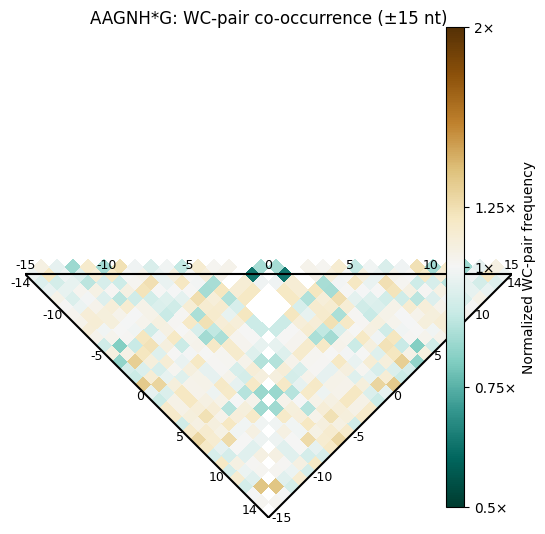

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 1) 31×31 매트릭스 로드
mat = np.load("/content/drive/MyDrive/binfo1-work/AAGNH*G_mat31.npy")
W   = mat.shape[0]  # 31

# 2) 그리드 생성 & 마스킹
i0, j0 = np.meshgrid(np.arange(W+1), np.arange(W+1), indexing="ij")
mask   = (i0 + j0) > W
data   = np.ma.masked_array(mat, mask=mask[:-1, :-1])

# 3) 45° CCW 회전
θ   = np.pi/4
R   = np.array([[ np.cos(θ), -np.sin(θ)],
                [ np.sin(θ),  np.cos(θ)]])
XY0 = np.stack([j0, i0], axis=-1).reshape(-1,2)
XY  = XY0.dot(R.T)
Xr  = XY[:,0].reshape(W+1, W+1)
Yr  = XY[:,1].reshape(W+1, W+1)

# 4) 컬러맵 & norm
norm = TwoSlopeNorm(vmin=0.5, vcenter=1.0, vmax=2.0)
cmap = "BrBG_r"

# 5) 플롯
fig, ax = plt.subplots(figsize=(6,6))
pcm = ax.pcolormesh(Xr, Yr, data, cmap=cmap, norm=norm, shading="auto")

# 6) 테두리 삼각형
corners0 = np.array([[ 0,   W],
                     [ W,   0],
                     [ 0,   0]])   # (0,31),(31,0),(0,0)
corners  = corners0.dot(R.T)
ax.plot(corners[[0,1],0], corners[[0,1],1], 'k-', lw=1.5)  # hypotenuse
ax.plot(corners[[2,0],0], corners[[2,0],1], 'k-', lw=1.5)  # left leg
ax.plot(corners[[2,1],0], corners[[2,1],1], 'k-', lw=1.5)  # right leg

# 7) 눈금 레이블: 각각 별도 리스트
ticks_hypo = np.arange(-15, 16, 5)          # -15, -10, -5, 0, +5, +10, +15
ticks_left = np.array([-14, -10, -5, 0, 5, 10, 14])
ticks_right= np.array([-15, -10, -5, 0, 5, 10, 14])

for L in ticks_hypo:
    t = (L + 15)/ (2*15)
    p0, p1 = corners[0], corners[1]
    x,y = p0 + t*(p1-p0)
    ax.text(x, y+0.3, str(L), ha='center', va='bottom', fontsize=9)

for L in ticks_left:
    t = (L + 15)/ (2*15)
    p0, p1 = corners[0], corners[2]  # top→bottom
    x,y = p0 + t*(p1-p0)
    ax.text(x-0.3, y, str(L), ha='right', va='center', fontsize=9)

for L in ticks_right:
    t = (L + 15)/ (2*15)
    p0, p1 = corners[2], corners[1]  # bottom→top
    x,y = p0 + t*(p1-p0)
    ax.text(x+0.3, y, str(L), ha='left', va='center', fontsize=9)

# 8) 마무리 & 컬러바
ax.set_aspect('equal')
ax.axis('off')
ax.set_title("AAGNH*G: WC-pair co-occurrence (±15 nt)", fontsize=12)

cax = fig.add_axes([0.75,0.1,0.03,0.8])
cb  = plt.colorbar(pcm, cax=cax)
cb.set_ticks([0.5, 0.75, 1.0, 1.25, 2.0])
cb.set_ticklabels(["0.5×","0.75×","1×","1.25×","2×"])
cb.set_label("Normalized WC-pair frequency", fontsize=10)

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()


<ipython-input-130-1923172507>:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.9,1])


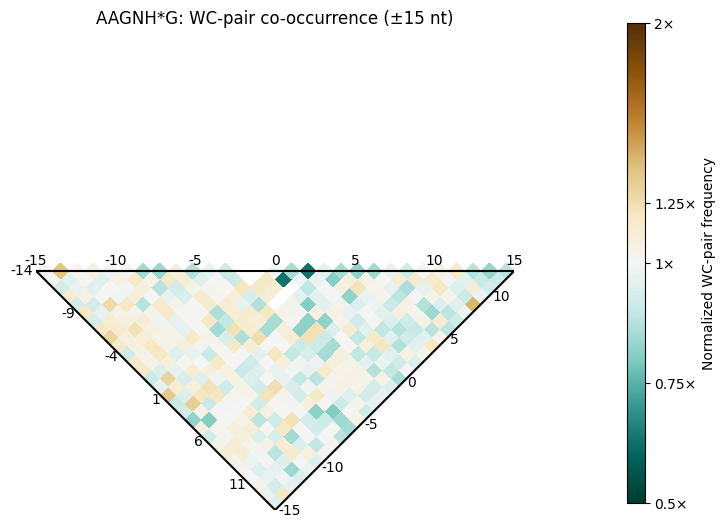

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 1) 31×31 매트릭스 로드
mat31 = np.load("/content/drive/MyDrive/binfo1-work/AAGNH*G_mat31.npy")

# 2) 29×29 영역 잘라내기 & 왼쪽 leg 방향 반전
M29 = mat31[1:30, 0:29]   # 원본 slice
M29 = M29[::-1, :]        # ← 행을 뒤집어 left leg 윗쪽이 -14가 되도록
W29 = M29.shape[0]        # 29

# 3) 그리드 생성 & 윗삼각 마스크
i0, j0 = np.meshgrid(np.arange(W29+1), np.arange(W29+1), indexing="ij")
mask   = (i0 + j0) > W29
data29 = np.ma.masked_array(M29, mask=mask[:-1, :-1])

# 4) 45° CCW 회전행렬
θ = np.pi/4
R = np.array([[ np.cos(θ), -np.sin(θ)],
              [ np.sin(θ),  np.cos(θ)]])
XY0 = np.stack([j0, i0], axis=-1).reshape(-1,2)
XY  = XY0.dot(R.T)
Xr  = XY[:,0].reshape(W29+1, W29+1)
Yr  = XY[:,1].reshape(W29+1, W29+1)

# 5) 컬러맵 & norm
norm = TwoSlopeNorm(vmin=0.5, vcenter=1.0, vmax=2.0)
cmap = "BrBG_r"

# 6) 플롯
fig, ax = plt.subplots(figsize=(6,6))
pcm = ax.pcolormesh(Xr, Yr, data29, cmap=cmap, norm=norm, shading="auto")

# 7) 삼각형 테두리
corners0 = np.array([[ 0, W29],
                     [W29,  0],
                     [ 0,  0]])
corners  = corners0.dot(R.T)
ax.plot(corners[[0,1],0], corners[[0,1],1], 'k-', lw=1.5)  # hypotenuse
ax.plot(corners[[2,0],0], corners[[2,0],1], 'k-', lw=1.5)  # left leg
ax.plot(corners[[2,1],0], corners[[2,1],1], 'k-', lw=1.5)  # right leg

# 8) 눈금 레이블
ticks_h = np.arange(-15,16,5)
ticks_l = np.arange(-14,15,5)
ticks_r = np.arange(-15,14,5)

for L in ticks_h:
    t     = (L + 15)/(2*15)
    p0,p1 = corners[0], corners[1]
    x,y   = p0 + t*(p1-p0)
    ax.text(x, y+0.3, str(L), ha='center', va='bottom')

for L in ticks_l:
    t     = (L + 14)/(2*14)
    p0,p1 = corners[0], corners[2]
    x,y   = p0 + t*(p1-p0)
    ax.text(x-0.3, y, str(L), ha='right', va='center')

for L in ticks_r:
    t     = (L + 15)/(2*14)
    p0,p1 = corners[2], corners[1]
    x,y   = p0 + t*(p1-p0)
    ax.text(x+0.3, y, str(L), ha='left', va='center')

# 9) 마무리 & 컬러바
ax.set_aspect('equal')
ax.axis('off')
ax.set_title("AAGNH*G: WC-pair co-occurrence (±15 nt)", fontsize=12)

# ← 여기만 바꿨어요: 왼쪽 위치를 0.75 -> 0.85 로
cax = fig.add_axes([1.05, 0.1, 0.03, 0.8])
cb  = plt.colorbar(pcm, cax=cax)
cb.set_ticks([0.5,0.75,1.0,1.25,2.0])
cb.set_ticklabels(["0.5×","0.75×","1×","1.25×","2×"])
cb.set_label("Normalized WC-pair frequency", fontsize=10)

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()

<ipython-input-135-1667231238>:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.9,1])


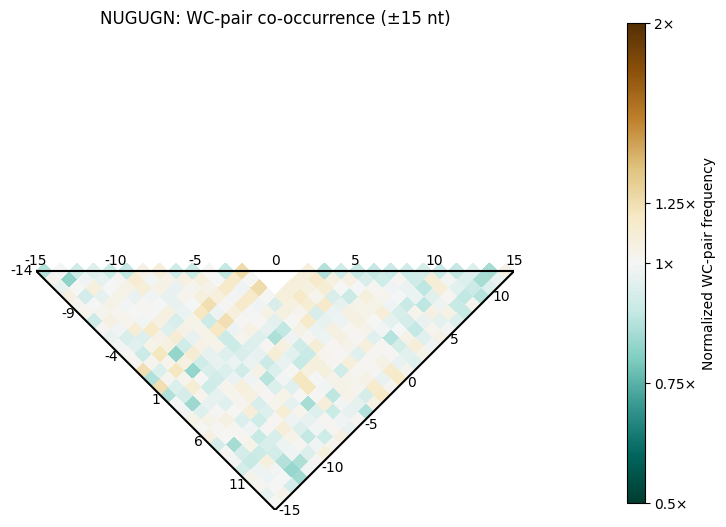

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 1) 31×31 매트릭스 로드
mat31 = np.load("/content/drive/MyDrive/binfo1-work/NUGUGN_mat31.npy")

# 2) 29×29 영역 잘라내기 & 왼쪽 leg 방향 반전
M29 = mat31[1:30, 0:29]   # 원본 slice
M29 = M29[::-1, :]        # ← 행을 뒤집어 left leg 윗쪽이 -14가 되도록
W29 = M29.shape[0]        # 29

# 3) 그리드 생성 & 윗삼각 마스크
i0, j0 = np.meshgrid(np.arange(W29+1), np.arange(W29+1), indexing="ij")
mask   = (i0 + j0) > W29
data29 = np.ma.masked_array(M29, mask=mask[:-1, :-1])

# 4) 45° CCW 회전행렬
θ = np.pi/4
R = np.array([[ np.cos(θ), -np.sin(θ)],
              [ np.sin(θ),  np.cos(θ)]])
XY0 = np.stack([j0, i0], axis=-1).reshape(-1,2)
XY  = XY0.dot(R.T)
Xr  = XY[:,0].reshape(W29+1, W29+1)
Yr  = XY[:,1].reshape(W29+1, W29+1)

# 5) 컬러맵 & norm
norm = TwoSlopeNorm(vmin=0.5, vcenter=1.0, vmax=2.0)
cmap = "BrBG_r"

# 6) 플롯
fig, ax = plt.subplots(figsize=(6,6))
pcm = ax.pcolormesh(Xr, Yr, data29, cmap=cmap, norm=norm, shading="auto")

# 7) 삼각형 테두리
corners0 = np.array([[ 0, W29],
                     [W29,  0],
                     [ 0,  0]])
corners  = corners0.dot(R.T)
ax.plot(corners[[0,1],0], corners[[0,1],1], 'k-', lw=1.5)  # hypotenuse
ax.plot(corners[[2,0],0], corners[[2,0],1], 'k-', lw=1.5)  # left leg
ax.plot(corners[[2,1],0], corners[[2,1],1], 'k-', lw=1.5)  # right leg

# 8) 눈금 레이블
ticks_h = np.arange(-15,16,5)
ticks_l = np.arange(-14,15,5)
ticks_r = np.arange(-15,14,5)

for L in ticks_h:
    t     = (L + 15)/(2*15)
    p0,p1 = corners[0], corners[1]
    x,y   = p0 + t*(p1-p0)
    ax.text(x, y+0.3, str(L), ha='center', va='bottom')

for L in ticks_l:
    t     = (L + 14)/(2*14)
    p0,p1 = corners[0], corners[2]
    x,y   = p0 + t*(p1-p0)
    ax.text(x-0.3, y, str(L), ha='right', va='center')

for L in ticks_r:
    t     = (L + 15)/(2*14)
    p0,p1 = corners[2], corners[1]
    x,y   = p0 + t*(p1-p0)
    ax.text(x+0.3, y, str(L), ha='left', va='center')

# 9) 마무리 & 컬러바
ax.set_aspect('equal')
ax.axis('off')
ax.set_title("NUGUGN: WC-pair co-occurrence (±15 nt)", fontsize=12)

# ← 여기만 바꿨어요: 왼쪽 위치를 0.75 -> 0.85 로
cax = fig.add_axes([1.05, 0.1, 0.03, 0.8])
cb  = plt.colorbar(pcm, cax=cax)
cb.set_ticks([0.5,0.75,1.0,1.25,2.0])
cb.set_ticklabels(["0.5×","0.75×","1×","1.25×","2×"])
cb.set_label("Normalized WC-pair frequency", fontsize=10)

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()

<ipython-input-119-2156689254>:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.9,1])


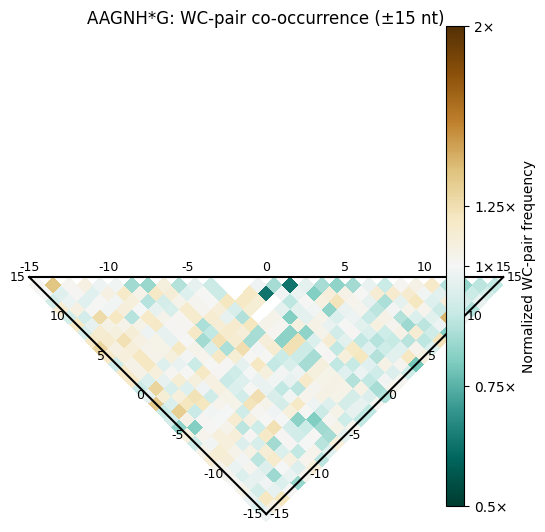

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 1) 31×31 매트릭스 로드 (window = 15)
M31 = np.load("/content/drive/MyDrive/binfo1-work/AAGNH*G_mat31.npy")
window = 15
W = 2*window  # 30

# 2) 행 반전: i=0(row 0)이 맨 위(-15nt)가 되도록 뒤집기
M   = M31[::-1, :]      # shape (31,31), rows flipped

# 3) 삼각 윗부분 마스크 (i+j > W)
i0, j0 = np.meshgrid(np.arange(W+1), np.arange(W+1), indexing="ij")
mask   = (i0 + j0) > W
data   = np.ma.masked_array(M, mask=mask)

# 4) 45° CCW 회전 준비
θ   = np.pi/4
R   = np.array([[ np.cos(θ), -np.sin(θ)],
                [ np.sin(θ),  np.cos(θ)]])
XY0 = np.stack([j0, i0], axis=-1).reshape(-1,2)
XY  = XY0.dot(R.T)
Xr  = XY[:,0].reshape(W+1, W+1)
Yr  = XY[:,1].reshape(W+1, W+1)

# 5) 컬러맵 & norm
norm = TwoSlopeNorm(vmin=0.5, vcenter=1.0, vmax=2.0)
cmap = "BrBG_r"

# 6) 그리기
fig, ax = plt.subplots(figsize=(6,6))
pcm = ax.pcolormesh(Xr, Yr, data, cmap=cmap, norm=norm, shading="auto")

# 7) 삼각형 테두리
corners0 = np.array([[0, W],[W,0],[0,0]])
corners  = corners0.dot(R.T)
ax.plot(corners[[0,1],0], corners[[0,1],1], 'k-', lw=1.5)  # hypotenuse
ax.plot(corners[[2,0],0], corners[[2,0],1], 'k-', lw=1.5)  # left leg
ax.plot(corners[[2,1],0], corners[[2,1],1], 'k-', lw=1.5)  # right leg

# 8) 눈금 붙이기 (–15…+15, 5nt 단위)
for L in range(-15,16,5):
    t = (L + window)/(2*window)  # –15→0, +15→1
    # hypotenuse
    p0,p1 = corners[0], corners[1]
    x,y   = p0 + t*(p1-p0)
    ax.text(x, y+0.3, str(L), ha='center', va='bottom', fontsize=9)
    # left leg
    p0,p1 = corners[2], corners[0]
    x,y   = p0 + t*(p1-p0)
    ax.text(x-0.3, y, str(L), ha='right', va='center', fontsize=9)
    # right leg
    p0,p1 = corners[2], corners[1]
    x,y   = p0 + t*(p1-p0)
    ax.text(x+0.3, y, str(L), ha='left', va='center', fontsize=9)

# 9) 컬러바 & 마무리
ax.set_aspect('equal')
ax.axis('off')
ax.set_title("AAGNH*G: WC-pair co-occurrence (±15 nt)", fontsize=12)

cax = fig.add_axes([0.75,0.1,0.03,0.8])
cb  = plt.colorbar(pcm, cax=cax)
cb.set_ticks([0.5,0.75,1.0,1.25,2.0])
cb.set_ticklabels(["0.5×","0.75×","1×","1.25×","2×"])
cb.set_label("Normalized WC-pair frequency", fontsize=10)

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()


In [ ]:
import numpy as np

# 1) 31×31 매트릭스 로드 (window = 15)
mat31 = np.load("/content/drive/MyDrive/binfo1-work/AAGNH*G_mat31.npy")
window = 15  # ±15nt 범위

# 2) 관심 좌표 설정
#   i = –7 → row index = –7 + window = 8
#   j = +4 → col index =  4 + window = 19
i1, j1 = -7 + window,  4 + window

#   대칭 위치 (i=+4, j=–7)
i2, j2 =  4 + window, -7 + window

# 3) 값 추출
val1 = mat31[i1, j1]
val2 = mat31[i2, j2]

print(f"좌표 (i=–7, j=+4) 의 Obs/Exp enrichment: {val1:.3f}×")
print(f"좌표 (i=+4, j=–7) 의 Obs/Exp enrichment: {val2:.3f}×")


좌표 (i=–7, j=+4) 의 Obs/Exp enrichment: 0.965×
좌표 (i=+4, j=–7) 의 Obs/Exp enrichment: 0.965×


In [ ]:
# ——— Obs/Exp 매트릭스 계산 함수 (수정) —————————————————————————————
def compute_obsexp(hex_list, window=15):
    # 1) 31×31 매트릭스
    size = 2*window + 1
    M_obs = np.zeros((size, size), float)
    M_bg  = np.zeros((size, size), float)

    for bed, M in [(CLIP_BED, M_obs), (CTRL_BED, M_bg)]:
        total = count_lines(bed)
        with open(bed) as fin:
            for line in tqdm(fin, total=total, unit="sites"):
                chrom, start, _ = line.split()[:3]
                start = int(start)
                center = start + 3
                seq6   = fa.fetch(chrom, start, start+6)
                if seq6 not in hex_list:
                    continue

                # → 31nt 가져오기: -window … +window
                seq = fa.fetch(chrom,
                               center - window,
                               center + window + 1)
                if len(seq) != size:
                    continue

                # WC-pair 카운팅
                for i in range(size):
                    l = seq[i]
                    if wc_pairs.get(l) is None:
                        continue
                    for j in range(size):
                        r = seq[j]
                        if wc_pairs[l] == r:
                            M[i, j] += 1

    # 정규화
    obs_prop = M_obs / M_obs.sum()
    bg_prop  = M_bg  / M_bg.sum()
    return obs_prop / bg_prop

# 사용 예:
window = 15
mat31 = compute_obsexp(motif_hex["AAGNH*G"], window=window)
np.save("/content/drive/MyDrive/binfo1-work/AAGNH*G_mat31.npy", mat31)


  0%|          | 0/61733500 [00:00<?, ?sites/s]

  0%|          | 0/17761971 [00:00<?, ?sites/s]

<ipython-input-121-2224632445>:39: RuntimeWarning: invalid value encountered in divide
  return obs_prop / bg_prop


In [ ]:
# 검증: (i=-7, j=+4) → row=8, col=19
mat31 = np.load("/content/drive/MyDrive/binfo1-work/AAGNH*G_mat31.npy")
val = mat31[-7+window, 4+window]

print(f"(−7,+4) enrichment = {val:.3f}×")


(−7,+4) enrichment = 0.965×


In [2]:
import json

with open("/content/drive/MyDrive/Colab Notebooks/Your_Own_Analysis_3.ipynb", "r", encoding="utf-8") as f:
    data = json.load(f)

# 고장난 widgets 정리
if "widgets" in data.get("metadata", {}):
    widget_meta = data["metadata"]["widgets"]
    if "application/vnd.jupyter.widget-state+json" in widget_meta:
        if "state" not in widget_meta["application/vnd.jupyter.widget-state+json"]:
            widget_meta["application/vnd.jupyter.widget-state+json"]["state"] = {}

# 저장
with open("/content/drive/MyDrive/Colab Notebooks/Your_Own_Analysis_3_fixed.ipynb", "w", encoding="utf-8") as f:
    json.dump(data, f, indent=1)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Your_Own_Analysis_3.ipynb'